In [6]:
#imports
import pandas as pd
import numpy as np
import toms_tools as tt

In [15]:
#read in files
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
df = pd.concat([train, test], ignore_index=True)

In [58]:
#explore data
print(train.shape, test.shape, df.shape)
df.head()

(1460, 81) (1459, 80) (2919, 42)


1stFlrSF  2ndFlrSF BedroomAbvGr BldgType BsmtCond BsmtExposure  \
0       856       854            3     1Fam       TA           No   
1      1262         0            3     1Fam       TA           Gd   
2       920       866            3     1Fam       TA           Mn   
3       961       756            3     1Fam       Gd           No   
4      1145      1053            4     1Fam       TA           Av   

  BsmtFinType1 BsmtFullBath BsmtQual CentralAir     ...      Neighborhood  \
0          GLQ            1       Gd          Y     ...           CollgCr   
1          ALQ            0       Gd          Y     ...           Veenker   
2          GLQ            1       Gd          Y     ...           CollgCr   
3          ALQ            1       TA          Y     ...           Crawfor   
4          GLQ            1       Gd          Y     ...           NoRidge   

  OverallCond OverallQual RoofStyle SaleCondition  TotRmsAbvGrd  TotalBsmtSF  \
0           5           7     Gable        Normal             8        856.0   
1           8           6     Gable        Normal             6       1262.0   
2           5           7     Gable        Normal             6        920.0   
3           5           7     Gable       Abnorml             7        756.0   
4           5           8     Gable        Normal             9       1145.0   

   YearBuilt YrSold second_floor  
0       2003   2008            1  
1       1976   2007            0  
2       2001   2008            1  
3       1915   2006            1  
4       2000   2008            1  

[5 rows x 42 columns]

In [19]:
cols = df.columns.tolist()
cols = ["SalePrice"] + [x for x in cols if x != "SalePrice"]


['SalePrice', '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'ScreenPorch', 'Street'

In [20]:
df = df[cols]

In [21]:
df.head()

SalePrice  1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  \
0   208500.0       856       854          0   NaN             3     1Fam   
1   181500.0      1262         0          0   NaN             3     1Fam   
2   223500.0       920       866          0   NaN             3     1Fam   
3   140000.0       961       756          0   NaN             3     1Fam   
4   250000.0      1145      1053          0   NaN             4     1Fam   

  BsmtCond BsmtExposure  BsmtFinSF1  ...    SaleType ScreenPorch Street  \
0       TA           No       706.0  ...          WD           0   Pave   
1       TA           Gd       978.0  ...          WD           0   Pave   
2       TA           Mn       486.0  ...          WD           0   Pave   
3       Gd           No       216.0  ...          WD           0   Pave   
4       TA           Av       655.0  ...          WD           0   Pave   

   TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF YearBuilt YearRemodAdd  \
0             8        856.0    AllPub           0      2003         2003   
1             6       1262.0    AllPub         298      1976         1976   
2             6        920.0    AllPub           0      2001         2002   
3             7        756.0    AllPub           0      1915         1970   
4             9       1145.0    AllPub         192      2000         2000   

  YrSold  
0   2008  
1   2007  
2   2008  
3   2006  
4   2008  

[5 rows x 81 columns]

Features are :
Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 

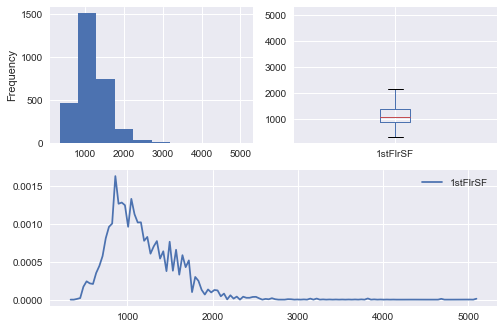

-------------------------------------------------
                     2ndFlrSF                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean      336.483727
std       428.701456
min         0.000000
25%         0.000000
50%         0.000000
75%       704.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
nulls : 0


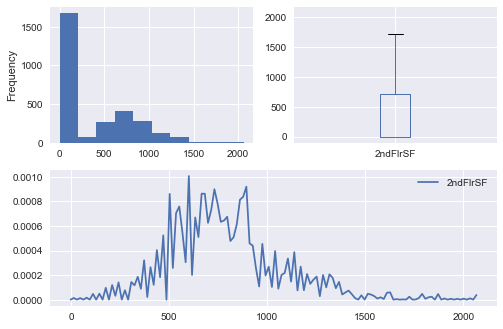

-------------------------------------------------
                     3SsnPorch                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        2.602261
std        25.188169
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64
nulls : 0


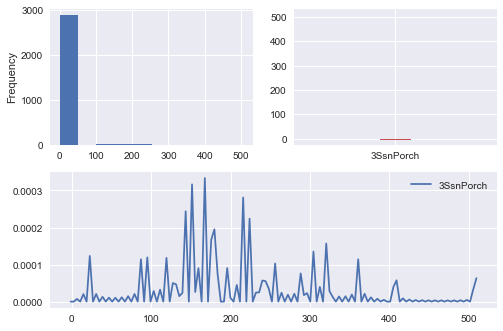

-------------------------------------------------
                     Alley                          
-------------------------------------------------
Feature breakdown: 
count      198
unique       2
top       Grvl
freq       120
Name: Alley, dtype: object
nulls : 2721
Grvl    60.606061
Pave    39.393939
Name: Alley, dtype: float64


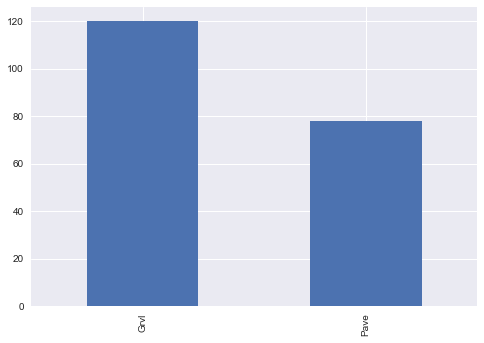

-------------------------------------------------
                     BedroomAbvGr                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        2.860226
std         0.822693
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64
nulls : 0


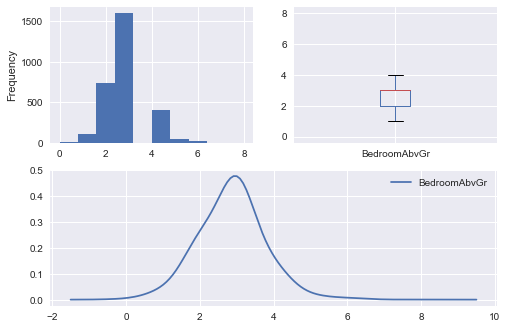

-------------------------------------------------
                     BldgType                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       5
top       1Fam
freq      2425
Name: BldgType, dtype: object
nulls : 0
1Fam      83.076396
TwnhsE     7.776636
Duplex     3.734156
Twnhs      3.288798
2fmCon     2.124015
Name: BldgType, dtype: float64


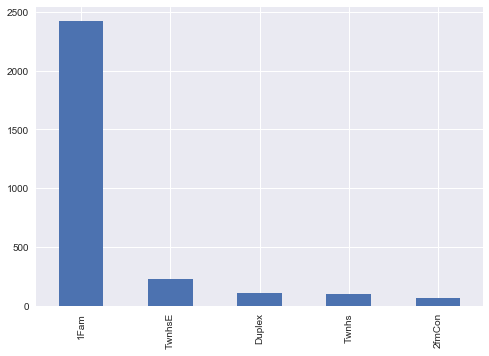

-------------------------------------------------
                     BsmtCond                          
-------------------------------------------------
Feature breakdown: 
count     2837
unique       4
top         TA
freq      2606
Name: BsmtCond, dtype: object
nulls : 82
TA    91.857596
Gd     4.300317
Fa     3.665844
Po     0.176243
Name: BsmtCond, dtype: float64


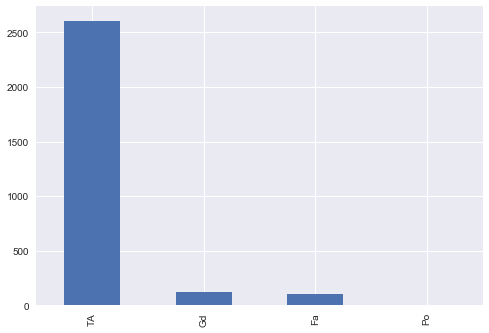

-------------------------------------------------
                     BsmtExposure                          
-------------------------------------------------
Feature breakdown: 
count     2837
unique       4
top         No
freq      1904
Name: BsmtExposure, dtype: object
nulls : 82
No    67.113148
Av    14.733874
Gd     9.728587
Mn     8.424392
Name: BsmtExposure, dtype: float64


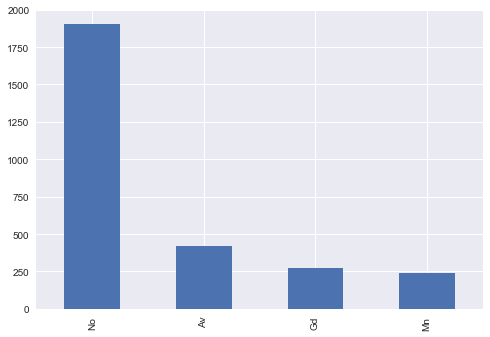

-------------------------------------------------
                     BsmtFinSF1                          
-------------------------------------------------
Feature breakdown: 
count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
nulls : 1


c:\python\python35\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
c:\python\python35\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


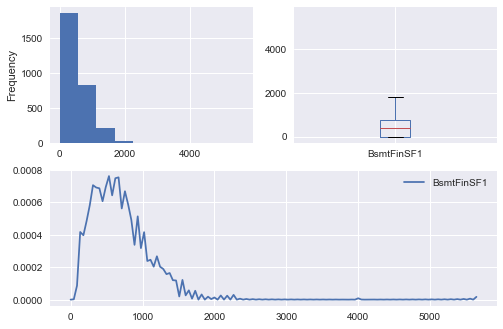

-------------------------------------------------
                     BsmtFinSF2                          
-------------------------------------------------
Feature breakdown: 
count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64
nulls : 1


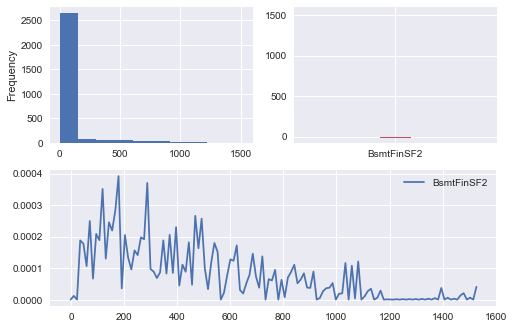

-------------------------------------------------
                     BsmtFinType1                          
-------------------------------------------------
Feature breakdown: 
count     2840
unique       6
top        Unf
freq       851
Name: BsmtFinType1, dtype: object
nulls : 79
Unf    29.964789
GLQ    29.894366
ALQ    15.105634
Rec    10.140845
BLQ     9.471831
LwQ     5.422535
Name: BsmtFinType1, dtype: float64


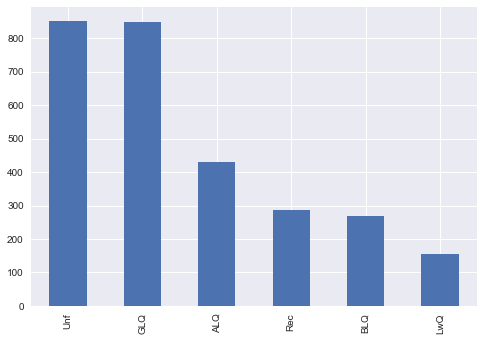

-------------------------------------------------
                     BsmtFinType2                          
-------------------------------------------------
Feature breakdown: 
count     2839
unique       6
top        Unf
freq      2493
Name: BsmtFinType2, dtype: object
nulls : 80
Unf    87.812610
Rec     3.698485
LwQ     3.064459
BLQ     2.395210
ALQ     1.831631
GLQ     1.197605
Name: BsmtFinType2, dtype: float64


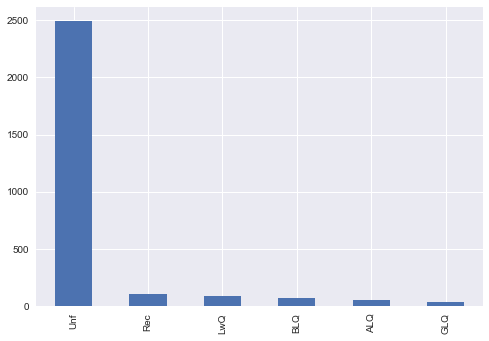

-------------------------------------------------
                     BsmtFullBath                          
-------------------------------------------------
Feature breakdown: 
count    2917.000000
mean        0.429894
std         0.524736
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
nulls : 2


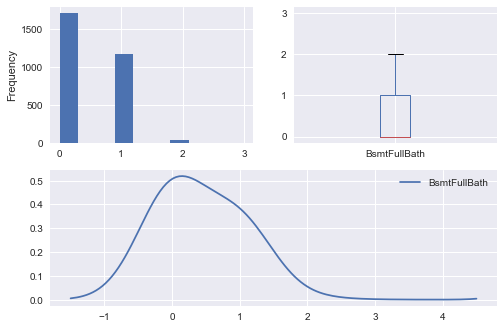

-------------------------------------------------
                     BsmtHalfBath                          
-------------------------------------------------
Feature breakdown: 
count    2917.000000
mean        0.061364
std         0.245687
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
nulls : 2


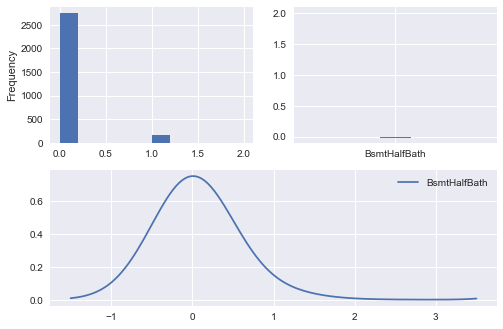

-------------------------------------------------
                     BsmtQual                          
-------------------------------------------------
Feature breakdown: 
count     2838
unique       4
top         TA
freq      1283
Name: BsmtQual, dtype: object
nulls : 81
TA    45.207893
Gd    42.600423
Ex     9.090909
Fa     3.100775
Name: BsmtQual, dtype: float64


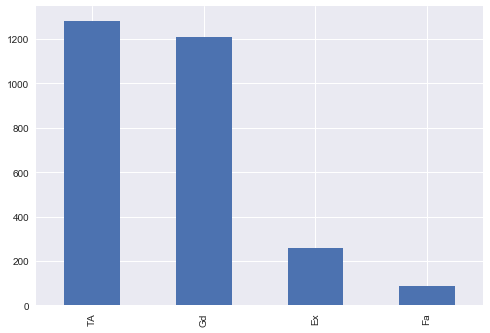

-------------------------------------------------
                     BsmtUnfSF                          
-------------------------------------------------
Feature breakdown: 
count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
25%       220.000000
50%       467.000000
75%       805.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
nulls : 1


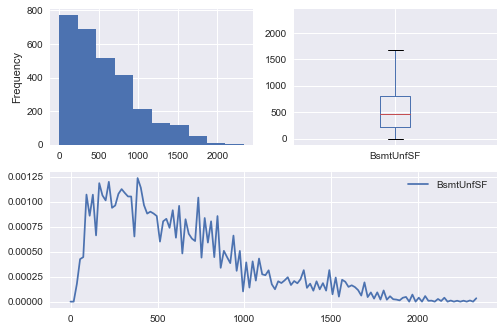

-------------------------------------------------
                     CentralAir                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       2
top          Y
freq      2723
Name: CentralAir, dtype: object
nulls : 0
Y    93.285372
N     6.714628
Name: CentralAir, dtype: float64


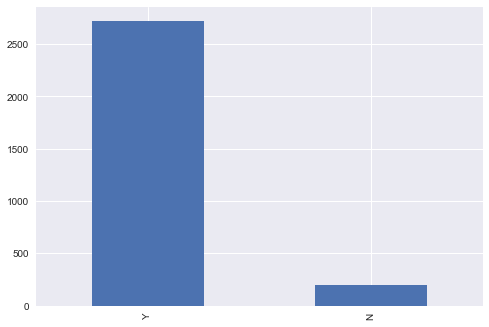

-------------------------------------------------
                     Condition1                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       9
top       Norm
freq      2511
Name: Condition1, dtype: object
nulls : 0
Norm      86.022610
Feedr      5.618362
Artery     3.151764
RRAn       1.712915
PosN       1.336074
RRAe       0.959233
PosA       0.685166
RRNn       0.308325
RRNe       0.205550
Name: Condition1, dtype: float64


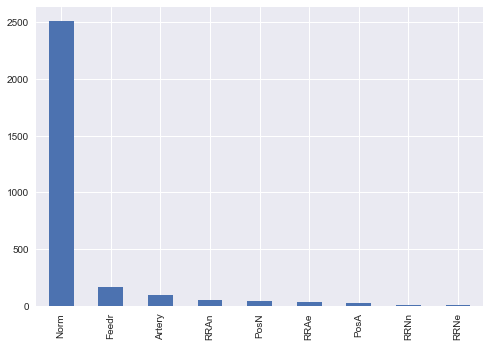

-------------------------------------------------
                     Condition2                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       8
top       Norm
freq      2889
Name: Condition2, dtype: object
nulls : 0
Norm      98.972251
Feedr      0.445358
Artery     0.171292
PosN       0.137033
PosA       0.137033
RRNn       0.068517
RRAe       0.034258
RRAn       0.034258
Name: Condition2, dtype: float64


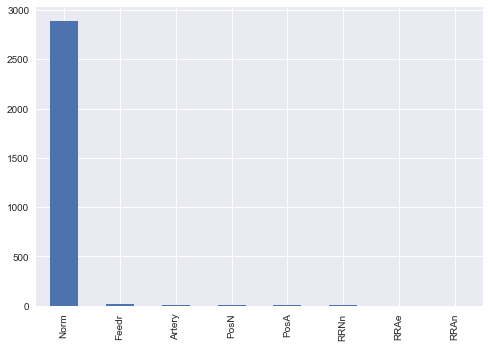

-------------------------------------------------
                     Electrical                          
-------------------------------------------------
Feature breakdown: 
count      2918
unique        5
top       SBrkr
freq       2671
Name: Electrical, dtype: object
nulls : 1
SBrkr    91.535298
FuseA     6.442769
FuseF     1.713502
FuseP     0.274160
Mix       0.034270
Name: Electrical, dtype: float64


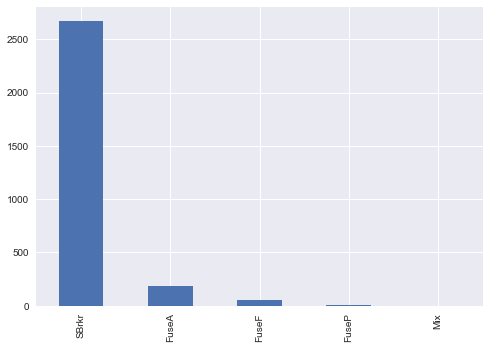

-------------------------------------------------
                     EnclosedPorch                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean       23.098321
std        64.244246
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64
nulls : 0


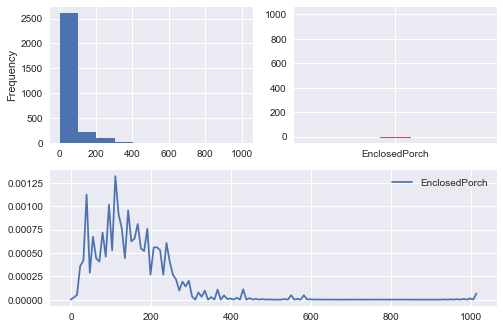

-------------------------------------------------
                     ExterCond                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       5
top         TA
freq      2538
Name: ExterCond, dtype: object
nulls : 0
TA    86.947585
Gd    10.243234
Fa     2.295307
Ex     0.411100
Po     0.102775
Name: ExterCond, dtype: float64


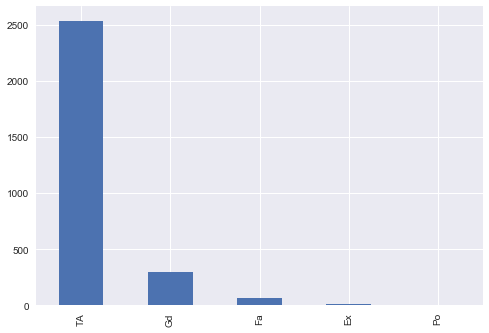

-------------------------------------------------
                     ExterQual                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       4
top         TA
freq      1798
Name: ExterQual, dtype: object
nulls : 0
TA    61.596437
Gd    33.538883
Ex     3.665639
Fa     1.199041
Name: ExterQual, dtype: float64


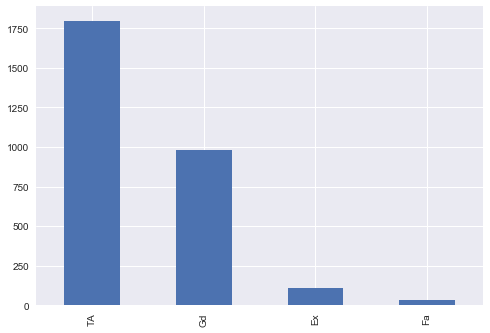

-------------------------------------------------
                     Exterior1st                          
-------------------------------------------------
Feature breakdown: 
count        2918
unique         15
top       VinylSd
freq         1025
Name: Exterior1st, dtype: object
nulls : 1
VinylSd    35.126799
MetalSd    15.421522
HdBoard    15.147361
Wd Sdng    14.084990
Plywood     7.573681
CemntBd     4.318026
BrkFace     2.981494
WdShing     1.919123
AsbShng     1.507882
Stucco      1.473612
BrkComm     0.205620
Stone       0.068540
CBlock      0.068540
AsphShn     0.068540
ImStucc     0.034270
Name: Exterior1st, dtype: float64


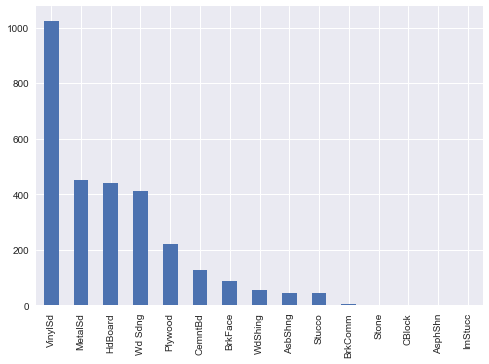

-------------------------------------------------
                     Exterior2nd                          
-------------------------------------------------
Feature breakdown: 
count        2918
unique         16
top       VinylSd
freq         1014
Name: Exterior2nd, dtype: object
nulls : 1
VinylSd    34.749829
MetalSd    15.318711
HdBoard    13.913639
Wd Sdng    13.399589
Plywood     9.252913
CmentBd     4.318026
Wd Shng     2.775874
BrkFace     1.610692
Stucco      1.610692
AsbShng     1.302262
Brk Cmn     0.753941
ImStucc     0.514051
Stone       0.205620
AsphShn     0.137080
CBlock      0.102810
Other       0.034270
Name: Exterior2nd, dtype: float64


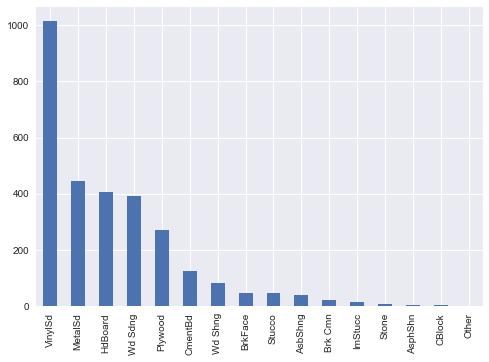

-------------------------------------------------
                     Fence                          
-------------------------------------------------
Feature breakdown: 
count       571
unique        4
top       MnPrv
freq        329
Name: Fence, dtype: object
nulls : 2348
MnPrv    57.618214
GdPrv    20.665499
GdWo     19.614711
MnWw      2.101576
Name: Fence, dtype: float64


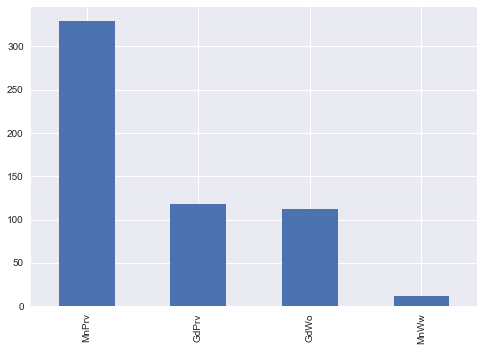

-------------------------------------------------
                     FireplaceQu                          
-------------------------------------------------
Feature breakdown: 
count     1499
unique       5
top         Gd
freq       744
Name: FireplaceQu, dtype: object
nulls : 1420
Gd    49.633089
TA    39.492995
Fa     4.936624
Po     3.068712
Ex     2.868579
Name: FireplaceQu, dtype: float64


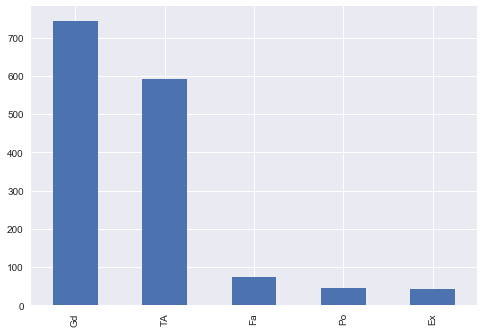

-------------------------------------------------
                     Fireplaces                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        0.597122
std         0.646129
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Fireplaces, dtype: float64
nulls : 0


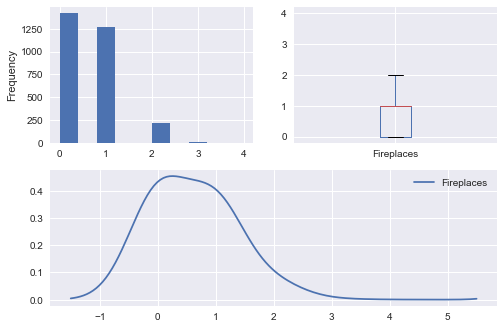

-------------------------------------------------
                     Foundation                          
-------------------------------------------------
Feature breakdown: 
count      2919
unique        6
top       PConc
freq       1308
Name: Foundation, dtype: object
nulls : 0
PConc     44.809866
CBlock    42.309010
BrkTil    10.654334
Slab       1.678657
Stone      0.376841
Wood       0.171292
Name: Foundation, dtype: float64


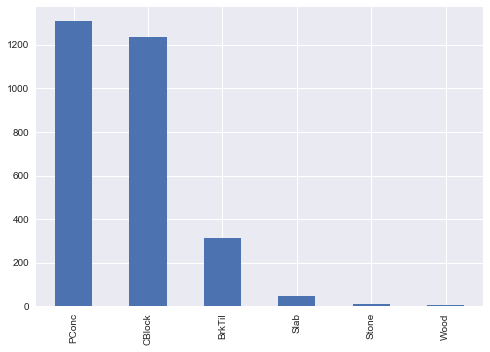

-------------------------------------------------
                     FullBath                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        1.568003
std         0.552969
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FullBath, dtype: float64
nulls : 0


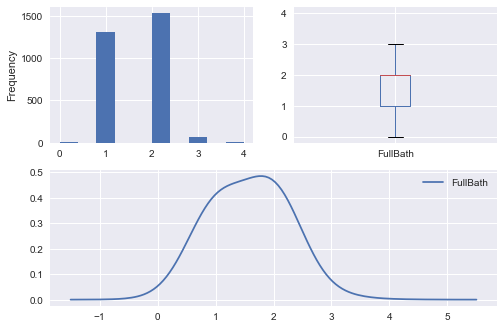

-------------------------------------------------
                     Functional                          
-------------------------------------------------
Feature breakdown: 
count     2917
unique       7
top        Typ
freq      2717
Name: Functional, dtype: object
nulls : 2
Typ     93.143641
Min2     2.399726
Min1     2.228317
Mod      1.199863
Maj1     0.651354
Maj2     0.308536
Sev      0.068564
Name: Functional, dtype: float64


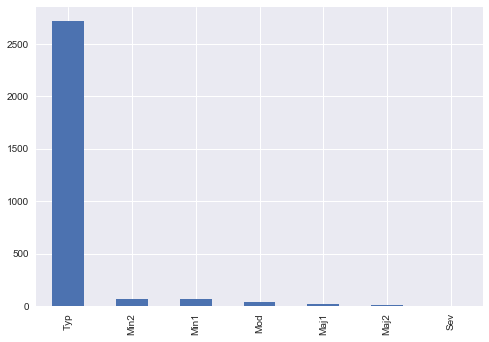

-------------------------------------------------
                     GarageArea                          
-------------------------------------------------
Feature breakdown: 
count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64
nulls : 1


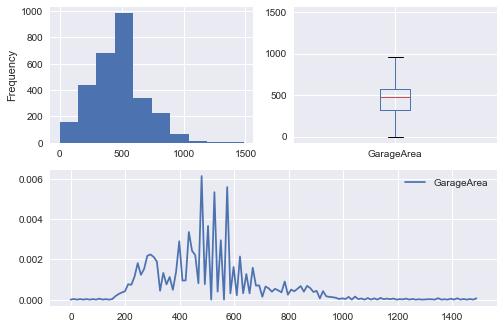

-------------------------------------------------
                     GarageCars                          
-------------------------------------------------
Feature breakdown: 
count    2918.000000
mean        1.766621
std         0.761624
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64
nulls : 1


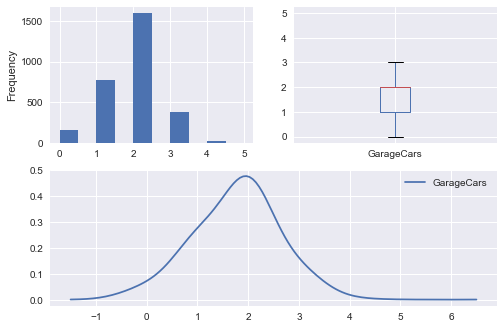

-------------------------------------------------
                     GarageCond                          
-------------------------------------------------
Feature breakdown: 
count     2760
unique       5
top         TA
freq      2654
Name: GarageCond, dtype: object
nulls : 159
TA    96.159420
Fa     2.681159
Gd     0.543478
Po     0.507246
Ex     0.108696
Name: GarageCond, dtype: float64


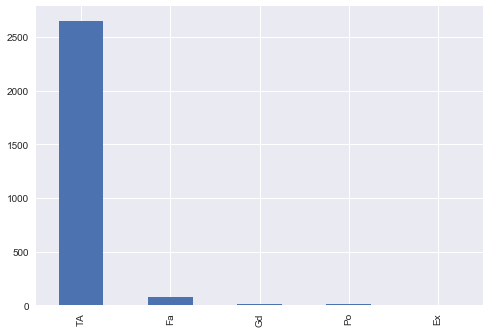

-------------------------------------------------
                     GarageFinish                          
-------------------------------------------------
Feature breakdown: 
count     2760
unique       3
top        Unf
freq      1230
Name: GarageFinish, dtype: object
nulls : 159
Unf    44.565217
RFn    29.384058
Fin    26.050725
Name: GarageFinish, dtype: float64


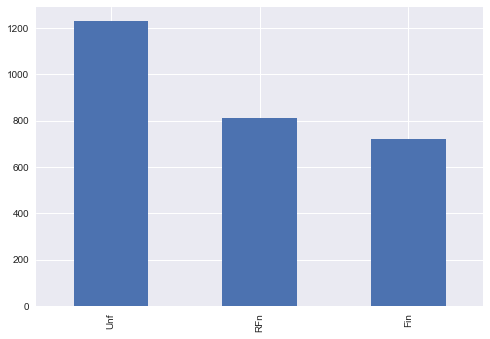

-------------------------------------------------
                     GarageQual                          
-------------------------------------------------
Feature breakdown: 
count     2760
unique       5
top         TA
freq      2604
Name: GarageQual, dtype: object
nulls : 159
TA    94.347826
Fa     4.492754
Gd     0.869565
Po     0.181159
Ex     0.108696
Name: GarageQual, dtype: float64


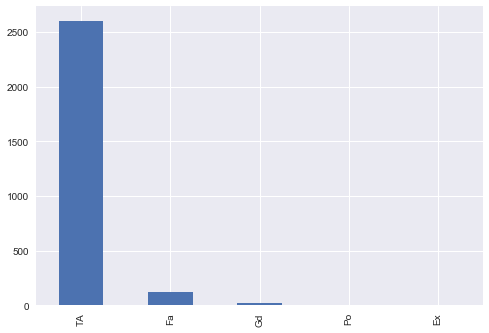

-------------------------------------------------
                     GarageType                          
-------------------------------------------------
Feature breakdown: 
count       2762
unique         6
top       Attchd
freq        1723
Name: GarageType, dtype: object
nulls : 157
Attchd     62.382332
Detchd     28.204200
BuiltIn     6.734251
Basment     1.303403
2Types      0.832730
CarPort     0.543085
Name: GarageType, dtype: float64


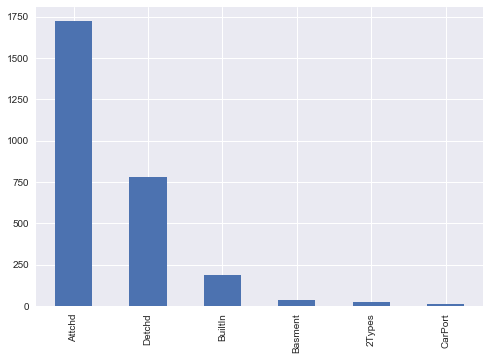

-------------------------------------------------
                     GarageYrBlt                          
-------------------------------------------------
Feature breakdown: 
count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64
nulls : 159


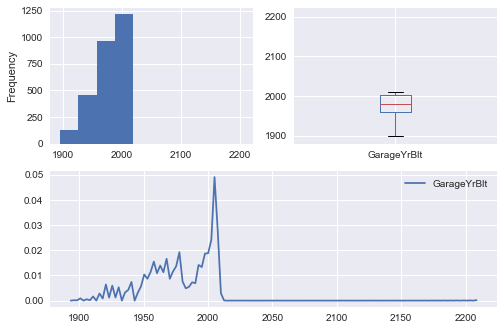

-------------------------------------------------
                     GrLivArea                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
25%      1126.000000
50%      1444.000000
75%      1743.500000
max      5642.000000
Name: GrLivArea, dtype: float64
nulls : 0


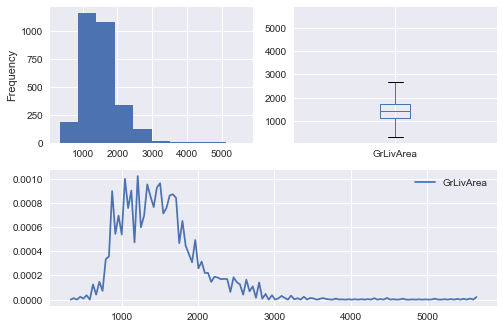

-------------------------------------------------
                     HalfBath                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        0.380267
std         0.502872
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
nulls : 0


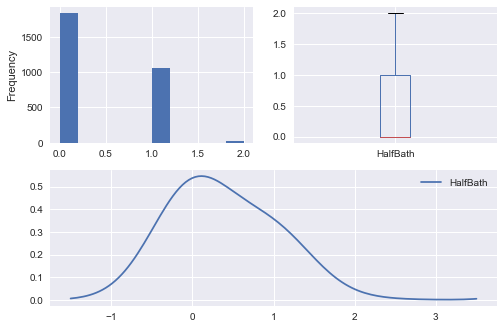

-------------------------------------------------
                     Heating                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       6
top       GasA
freq      2874
Name: Heating, dtype: object
nulls : 0
GasA     98.458376
GasW      0.924974
Grav      0.308325
Wall      0.205550
OthW      0.068517
Floor     0.034258
Name: Heating, dtype: float64


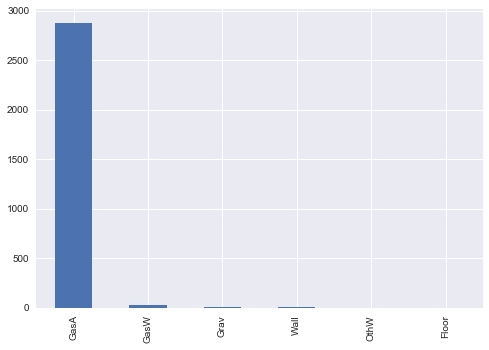

-------------------------------------------------
                     HeatingQC                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       5
top         Ex
freq      1493
Name: HeatingQC, dtype: object
nulls : 0
Ex    51.147653
TA    29.359370
Gd    16.238438
Fa     3.151764
Po     0.102775
Name: HeatingQC, dtype: float64


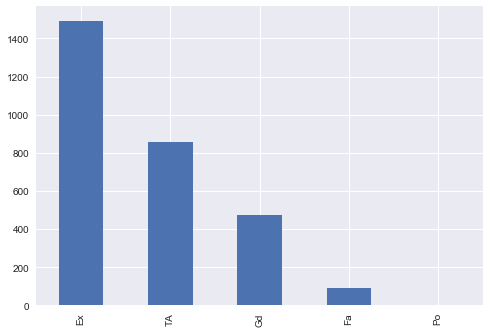

-------------------------------------------------
                     HouseStyle                          
-------------------------------------------------
Feature breakdown: 
count       2919
unique         8
top       1Story
freq        1471
Name: HouseStyle, dtype: object
nulls : 0
1Story    50.393971
2Story    29.873244
1.5Fin    10.757109
SLvl       4.385063
SFoyer     2.843440
2.5Unf     0.822199
1.5Unf     0.650908
2.5Fin     0.274066
Name: HouseStyle, dtype: float64


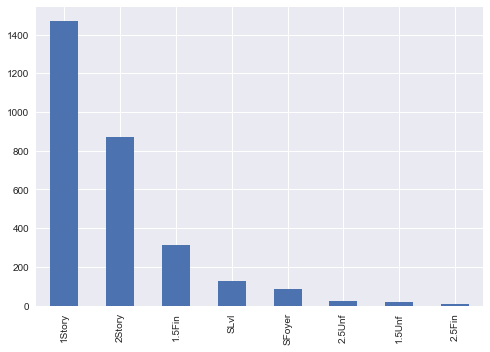

-------------------------------------------------
                     Id                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean     1460.000000
std       842.787043
min         1.000000
25%       730.500000
50%      1460.000000
75%      2189.500000
max      2919.000000
Name: Id, dtype: float64
nulls : 0


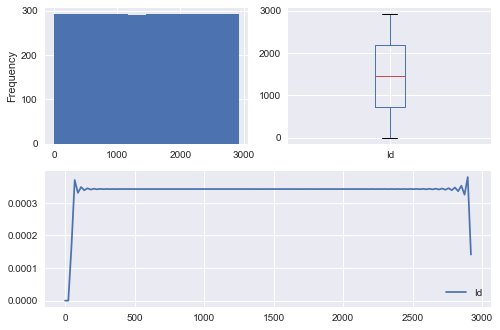

-------------------------------------------------
                     KitchenAbvGr                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        1.044536
std         0.214462
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64
nulls : 0


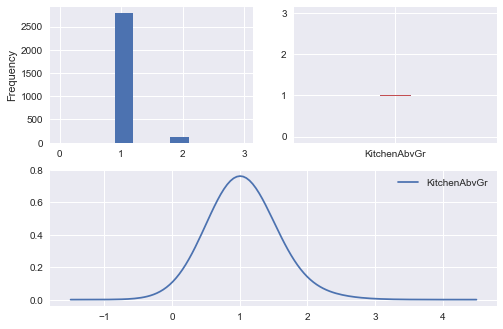

-------------------------------------------------
                     KitchenQual                          
-------------------------------------------------
Feature breakdown: 
count     2918
unique       4
top         TA
freq      1492
Name: KitchenQual, dtype: object
nulls : 1
TA    51.130912
Gd    39.444825
Ex     7.025360
Fa     2.398903
Name: KitchenQual, dtype: float64


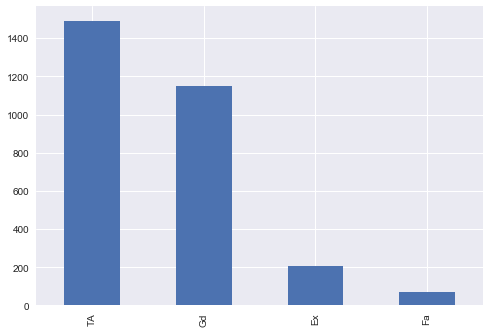

-------------------------------------------------
                     LandContour                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       4
top        Lvl
freq      2622
Name: LandContour, dtype: object
nulls : 0
Lvl    89.825283
HLS     4.110997
Bnk     4.008222
Low     2.055498
Name: LandContour, dtype: float64


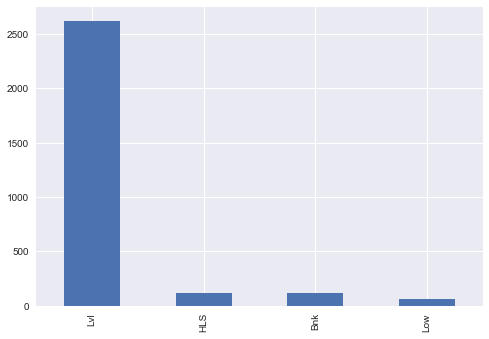

-------------------------------------------------
                     LandSlope                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       3
top        Gtl
freq      2778
Name: LandSlope, dtype: object
nulls : 0
Gtl    95.169579
Mod     4.282288
Sev     0.548133
Name: LandSlope, dtype: float64


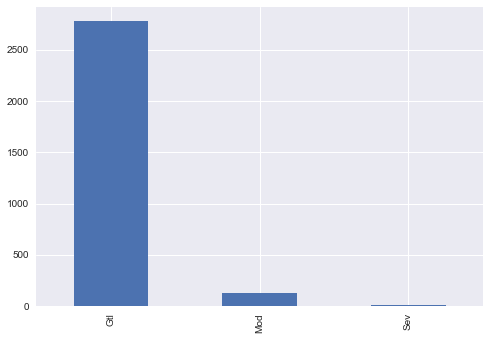

-------------------------------------------------
                     LotArea                          
-------------------------------------------------
Feature breakdown: 
count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64
nulls : 0


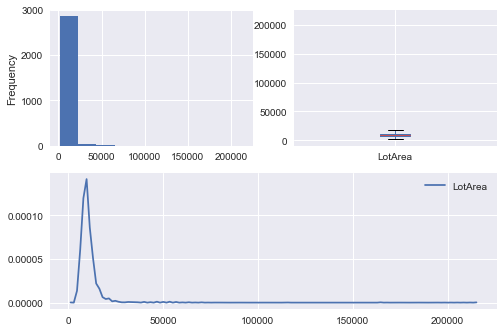

-------------------------------------------------
                     LotConfig                          
-------------------------------------------------
Feature breakdown: 
count       2919
unique         5
top       Inside
freq        2133
Name: LotConfig, dtype: object
nulls : 0
Inside     73.072970
Corner     17.505995
CulDSac     6.029462
FR2         2.911956
FR3         0.479616
Name: LotConfig, dtype: float64


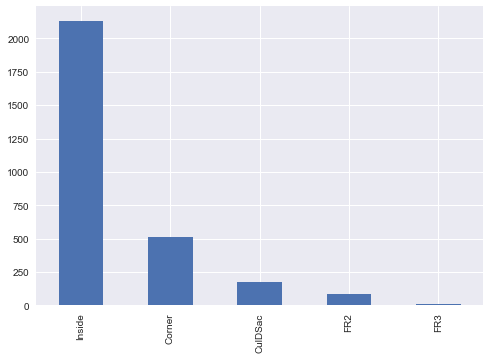

-------------------------------------------------
                     LotFrontage                          
-------------------------------------------------
Feature breakdown: 
count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
nulls : 486


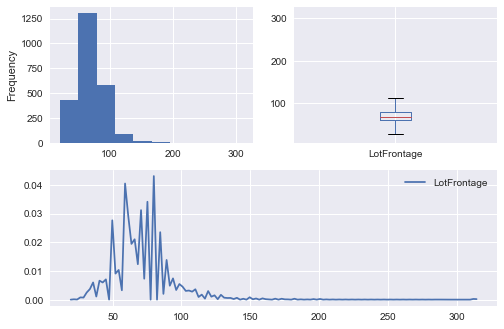

-------------------------------------------------
                     LotShape                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       4
top        Reg
freq      1859
Name: LotShape, dtype: object
nulls : 0
Reg    63.686194
IR1    33.162042
IR2     2.603631
IR3     0.548133
Name: LotShape, dtype: float64


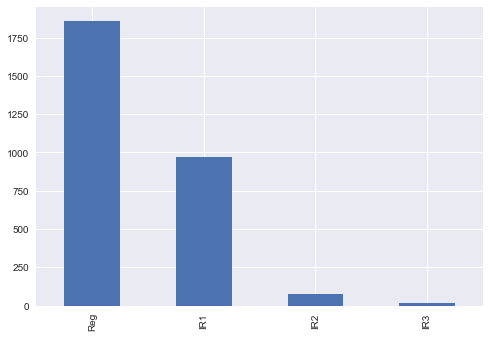

-------------------------------------------------
                     LowQualFinSF                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        4.694416
std        46.396825
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: LowQualFinSF, dtype: float64
nulls : 0


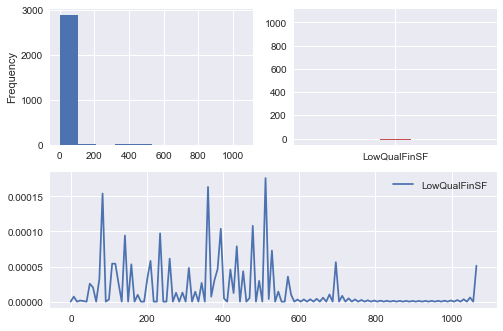

-------------------------------------------------
                     MSSubClass                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
nulls : 0


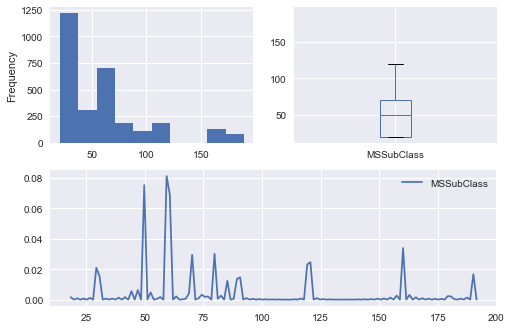

-------------------------------------------------
                     MSZoning                          
-------------------------------------------------
Feature breakdown: 
count     2915
unique       5
top         RL
freq      2265
Name: MSZoning, dtype: object
nulls : 4
RL         77.701544
RM         15.780446
FV          4.768439
RH          0.891938
C (all)     0.857633
Name: MSZoning, dtype: float64


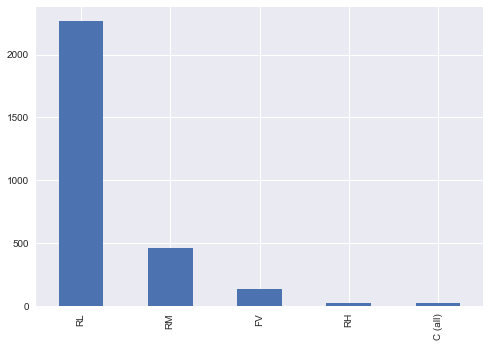

-------------------------------------------------
                     MasVnrArea                          
-------------------------------------------------
Feature breakdown: 
count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
nulls : 23


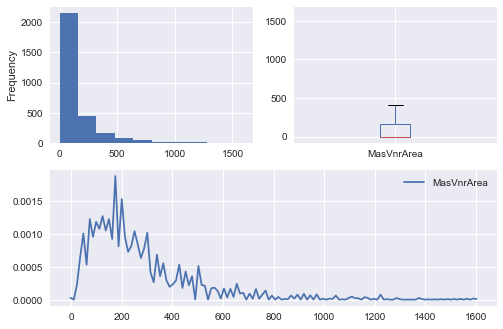

-------------------------------------------------
                     MasVnrType                          
-------------------------------------------------
Feature breakdown: 
count     2895
unique       4
top       None
freq      1742
Name: MasVnrType, dtype: object
nulls : 24
None       60.172712
BrkFace    30.362694
Stone       8.601036
BrkCmn      0.863558
Name: MasVnrType, dtype: float64


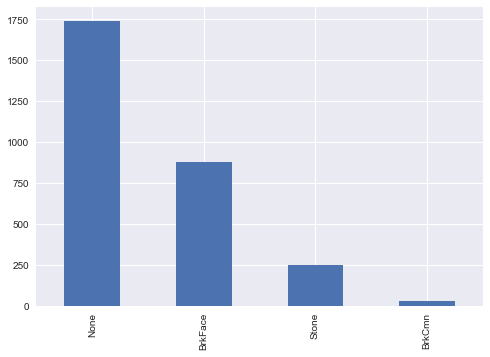

-------------------------------------------------
                     MiscFeature                          
-------------------------------------------------
Feature breakdown: 
count      105
unique       4
top       Shed
freq        95
Name: MiscFeature, dtype: object
nulls : 2814
Shed    90.476190
Gar2     4.761905
Othr     3.809524
TenC     0.952381
Name: MiscFeature, dtype: float64


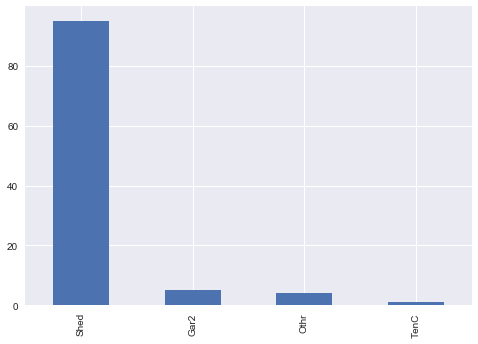

-------------------------------------------------
                     MiscVal                          
-------------------------------------------------
Feature breakdown: 
count     2919.000000
mean        50.825968
std        567.402211
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64
nulls : 0


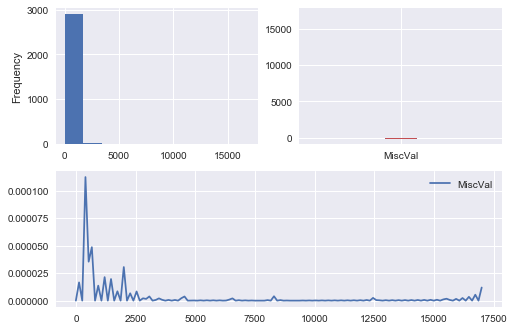

-------------------------------------------------
                     MoSold                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        6.213087
std         2.714762
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64
nulls : 0


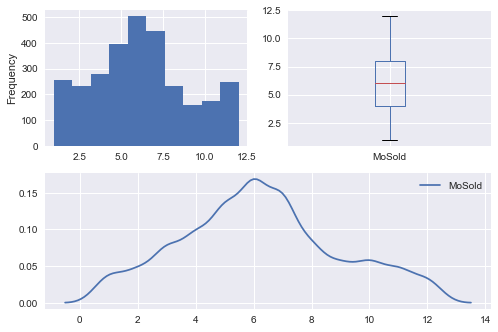

-------------------------------------------------
                     Neighborhood                          
-------------------------------------------------
Feature breakdown: 
count      2919
unique       25
top       NAmes
freq        443
Name: Neighborhood, dtype: object
nulls : 0
NAmes      15.176430
CollgCr     9.146968
OldTown     8.187736
Edwards     6.646112
Somerst     6.235012
NridgHt     5.686879
Gilbert     5.652621
Sawyer      5.173004
NWAmes      4.487838
SawyerW     4.282288
Mitchel     3.905447
BrkSide     3.699897
Crawfor     3.528606
IDOTRR      3.186023
Timber      2.466598
NoRidge     2.432340
StoneBr     1.747174
SWISU       1.644399
ClearCr     1.507366
MeadowV     1.267557
BrDale      1.027749
Blmngtn     0.959233
Veenker     0.822199
NPkVill     0.787941
Blueste     0.342583
Name: Neighborhood, dtype: float64


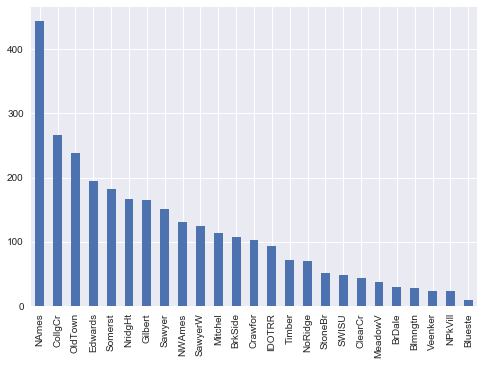

-------------------------------------------------
                     OpenPorchSF                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean       47.486811
std        67.575493
min         0.000000
25%         0.000000
50%        26.000000
75%        70.000000
max       742.000000
Name: OpenPorchSF, dtype: float64
nulls : 0


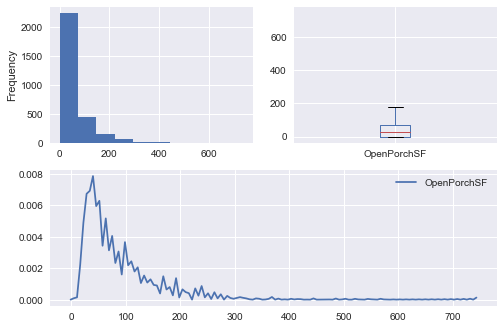

-------------------------------------------------
                     OverallCond                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        5.564577
std         1.113131
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
nulls : 0


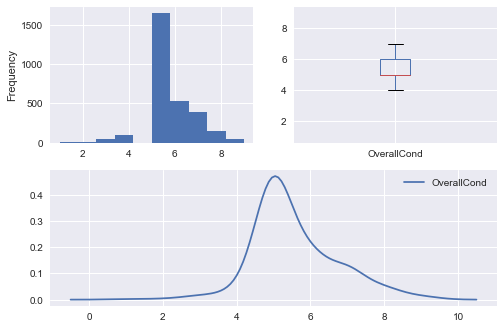

-------------------------------------------------
                     OverallQual                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        6.089072
std         1.409947
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
nulls : 0


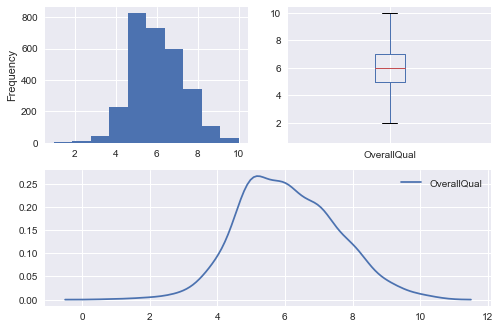

-------------------------------------------------
                     PavedDrive                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       3
top          Y
freq      2641
Name: PavedDrive, dtype: object
nulls : 0
Y    90.476190
N     7.399794
P     2.124015
Name: PavedDrive, dtype: float64


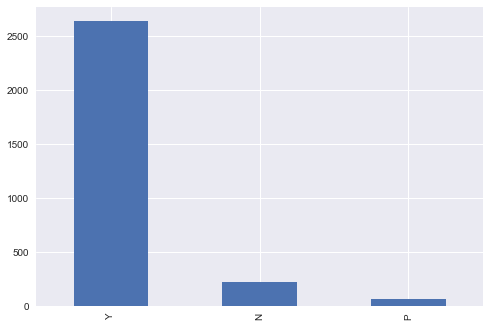

-------------------------------------------------
                     PoolArea                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        2.251799
std        35.663946
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64
nulls : 0


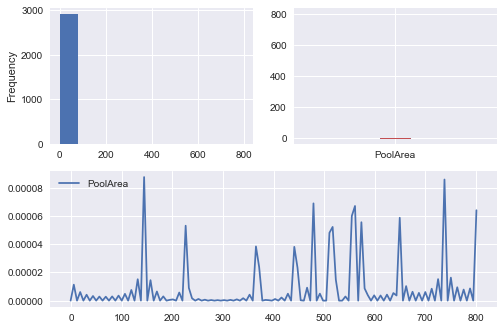

-------------------------------------------------
                     PoolQC                          
-------------------------------------------------
Feature breakdown: 
count     10
unique     3
top       Gd
freq       4
Name: PoolQC, dtype: object
nulls : 2909
Gd    40.0
Ex    40.0
Fa    20.0
Name: PoolQC, dtype: float64


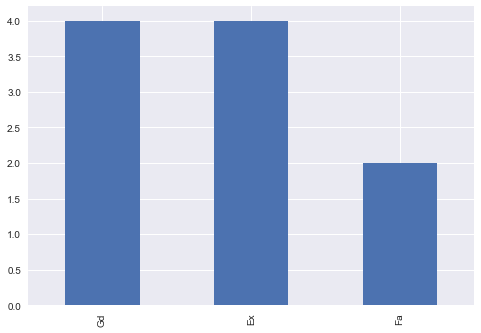

-------------------------------------------------
                     RoofMatl                          
-------------------------------------------------
Feature breakdown: 
count        2919
unique          8
top       CompShg
freq         2876
Name: RoofMatl, dtype: object
nulls : 0
CompShg    98.526893
Tar&Grv     0.787941
WdShake     0.308325
WdShngl     0.239808
Membran     0.034258
ClyTile     0.034258
Roll        0.034258
Metal       0.034258
Name: RoofMatl, dtype: float64


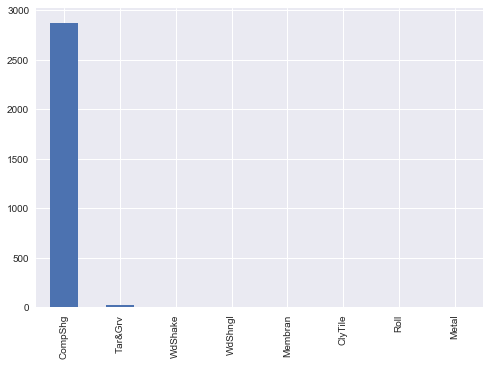

-------------------------------------------------
                     RoofStyle                          
-------------------------------------------------
Feature breakdown: 
count      2919
unique        6
top       Gable
freq       2310
Name: RoofStyle, dtype: object
nulls : 0
Gable      79.136691
Hip        18.876328
Gambrel     0.753683
Flat        0.685166
Mansard     0.376841
Shed        0.171292
Name: RoofStyle, dtype: float64


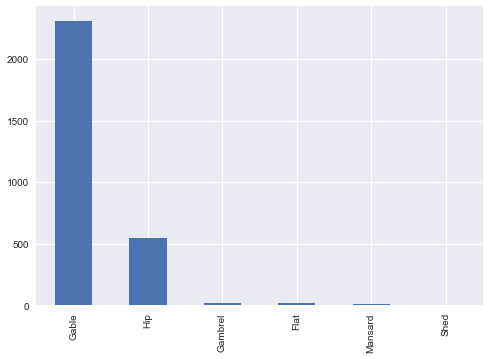

-------------------------------------------------
                     SaleCondition                          
-------------------------------------------------
Feature breakdown: 
count       2919
unique         6
top       Normal
freq        2402
Name: SaleCondition, dtype: object
nulls : 0
Normal     82.288455
Partial     8.393285
Abnorml     6.509078
Family      1.575882
Alloca      0.822199
AdjLand     0.411100
Name: SaleCondition, dtype: float64


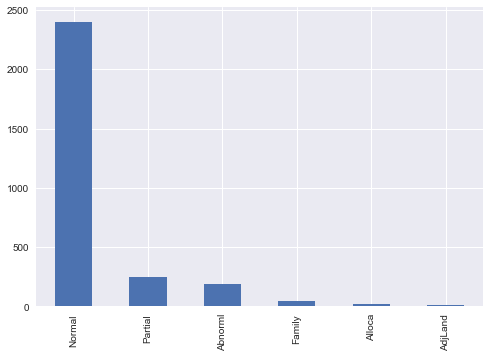

-------------------------------------------------
                     SalePrice                          
-------------------------------------------------
Feature breakdown: 
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
nulls : 1459


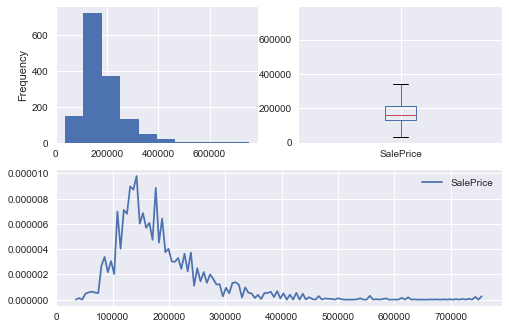

-------------------------------------------------
                     SaleType                          
-------------------------------------------------
Feature breakdown: 
count     2918
unique       9
top         WD
freq      2525
Name: SaleType, dtype: object
nulls : 1
WD       86.531871
New       8.190541
COD       2.981494
ConLD     0.891021
CWD       0.411241
ConLI     0.308430
ConLw     0.274160
Oth       0.239890
Con       0.171350
Name: SaleType, dtype: float64


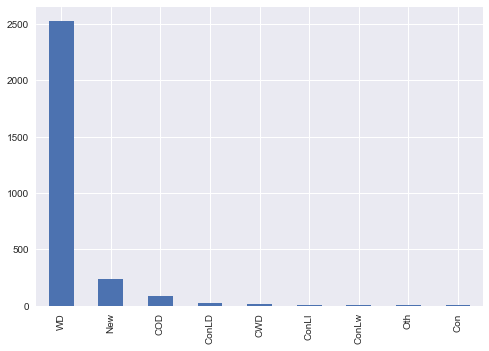

-------------------------------------------------
                     ScreenPorch                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean       16.062350
std        56.184365
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: ScreenPorch, dtype: float64
nulls : 0


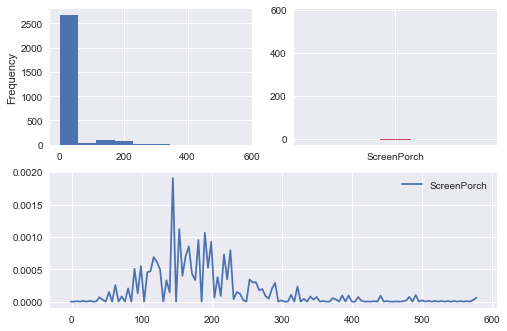

-------------------------------------------------
                     Street                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       2
top       Pave
freq      2907
Name: Street, dtype: object
nulls : 0
Pave    99.5889
Grvl     0.4111
Name: Street, dtype: float64


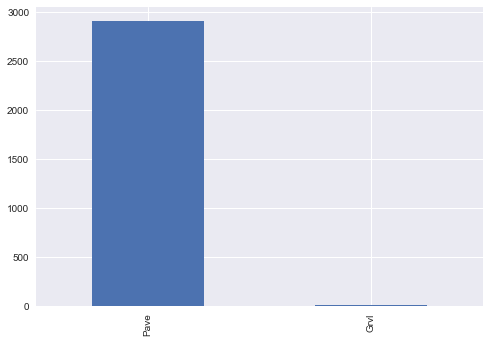

-------------------------------------------------
                     TotRmsAbvGrd                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        6.451524
std         1.569379
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: TotRmsAbvGrd, dtype: float64
nulls : 0


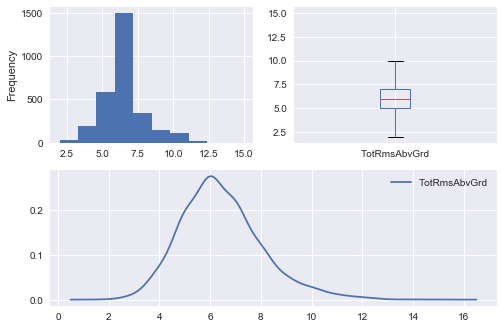

-------------------------------------------------
                     TotalBsmtSF                          
-------------------------------------------------
Feature breakdown: 
count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
nulls : 1


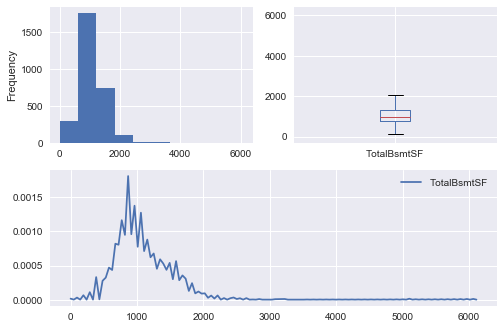

-------------------------------------------------
                     Utilities                          
-------------------------------------------------
Feature breakdown: 
count       2917
unique         2
top       AllPub
freq        2916
Name: Utilities, dtype: object
nulls : 2
AllPub    99.965718
NoSeWa     0.034282
Name: Utilities, dtype: float64


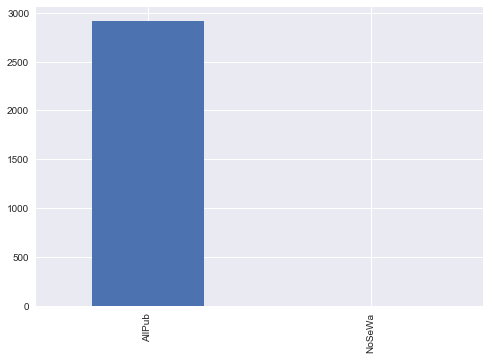

-------------------------------------------------
                     WoodDeckSF                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean       93.709832
std       126.526589
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: WoodDeckSF, dtype: float64
nulls : 0


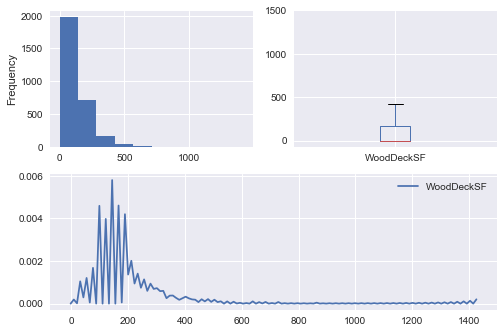

-------------------------------------------------
                     YearBuilt                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean     1971.312778
std        30.291442
min      1872.000000
25%      1953.500000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64
nulls : 0


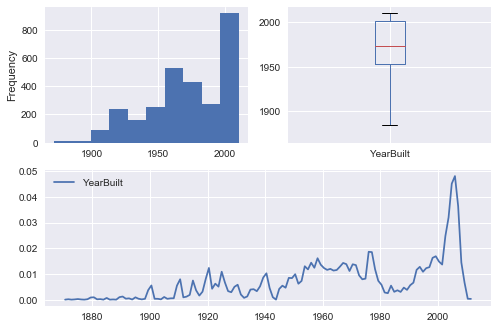

-------------------------------------------------
                     YearRemodAdd                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean     1984.264474
std        20.894344
min      1950.000000
25%      1965.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64
nulls : 0


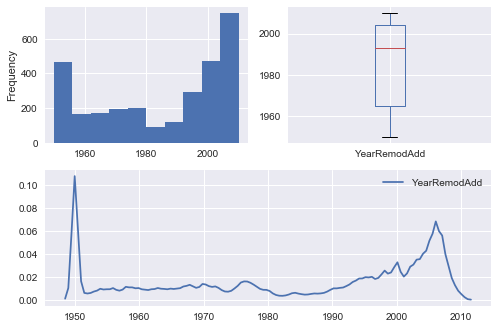

-------------------------------------------------
                     YrSold                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean     2007.792737
std         1.314964
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64
nulls : 0


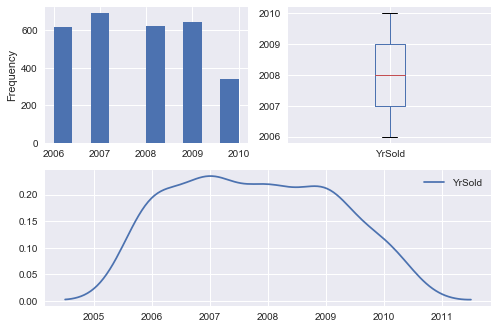

In [9]:
cat_dict = tt.uni_analysis(df)

------------------------------------
SalePrice compared to 1stFlrSF
------------------------------------
Continous vs Continous
Correlation: 0.6058521846919147


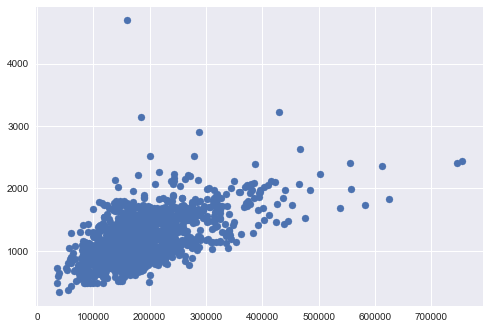

------------------------------------
SalePrice compared to 2ndFlrSF
------------------------------------
Continous vs Continous
Correlation: 0.3193338028320677


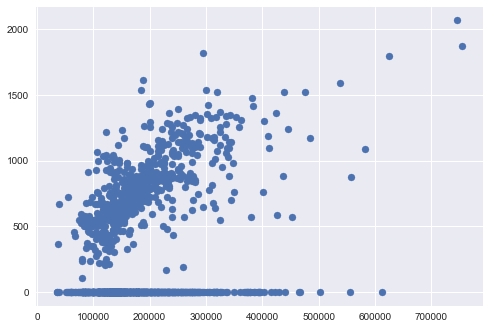

------------------------------------
SalePrice compared to 3SsnPorch
------------------------------------
Continous vs Continous
Correlation: 0.04458366533574845


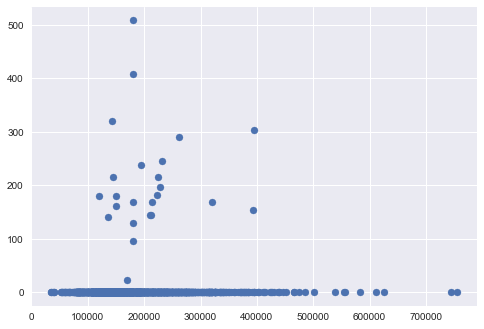

------------------------------------
SalePrice compared to Alley
------------------------------------
Catagorical vs Continuous
F = 35.56206043131905
p = 4.8998261667710785e-08


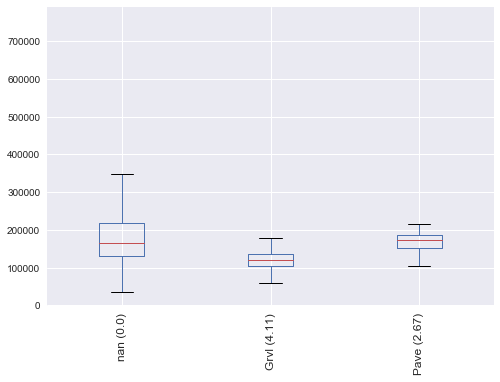

------------------------------------
SalePrice compared to BedroomAbvGr
------------------------------------
Continous vs Continous
Correlation: 0.16821315430073996


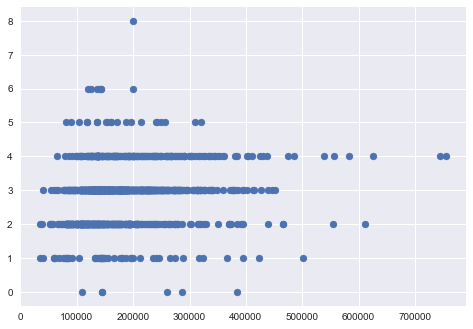

------------------------------------
SalePrice compared to BldgType
------------------------------------
Catagorical vs Continuous
F = 13.011077169620851
p = 2.0567364604967015e-10


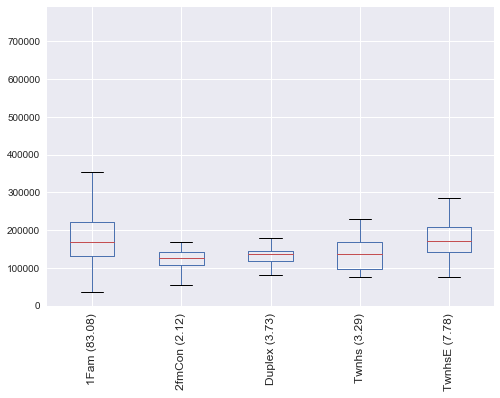

------------------------------------
SalePrice compared to BsmtCond
------------------------------------
Catagorical vs Continuous
F = 14.030600121067247
p = 5.136900937703027e-09


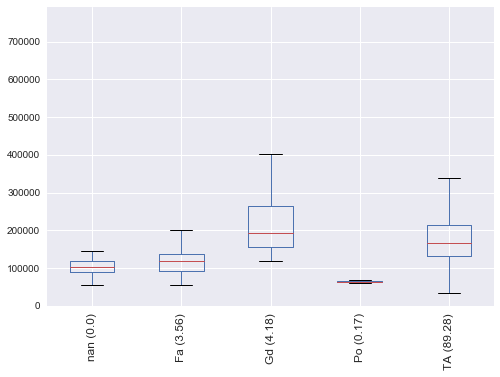

------------------------------------
SalePrice compared to BsmtExposure
------------------------------------
Catagorical vs Continuous
F = 70.88798364989222
p = 1.022670629183227e-42


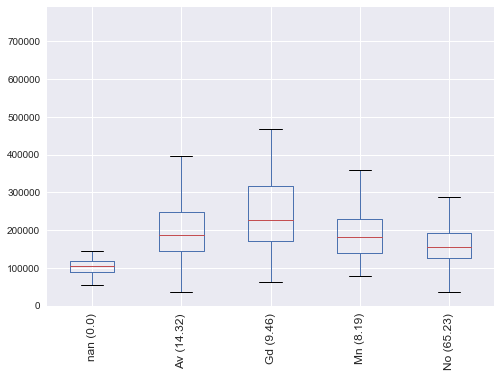

------------------------------------
SalePrice compared to BsmtFinSF1
------------------------------------
Continous vs Continous
Correlation: 0.38641980624215316


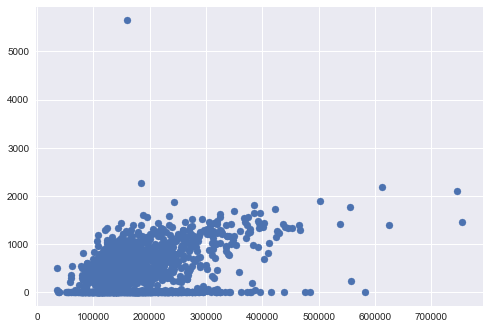

------------------------------------
SalePrice compared to BsmtFinSF2
------------------------------------
Continous vs Continous
Correlation: -0.011378121450215136


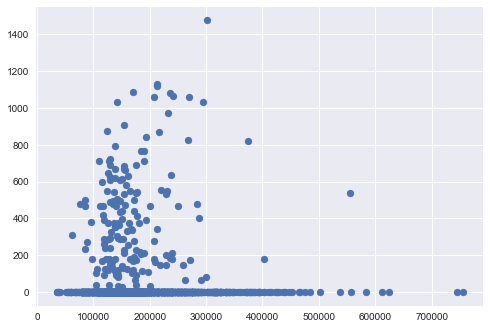

------------------------------------
SalePrice compared to BsmtFinType1
------------------------------------
Catagorical vs Continuous
F = 67.60217483627738
p = 1.8077310066862167e-63


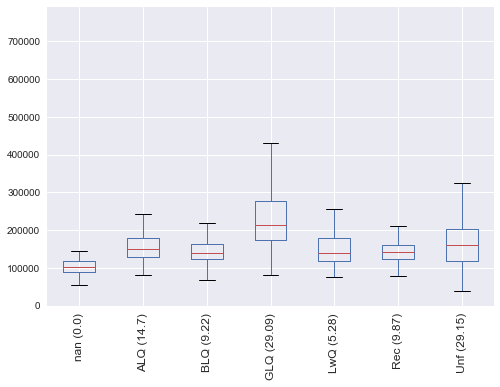

------------------------------------
SalePrice compared to BsmtFinType2
------------------------------------
Catagorical vs Continuous
F = 2.702450185378047
p = 0.019410089690234594


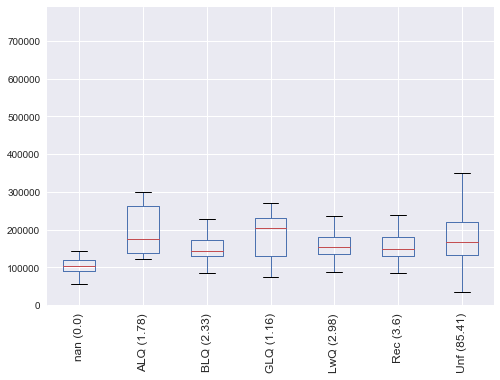

------------------------------------
SalePrice compared to BsmtFullBath
------------------------------------
Continous vs Continous
Correlation: 0.22712223313149404


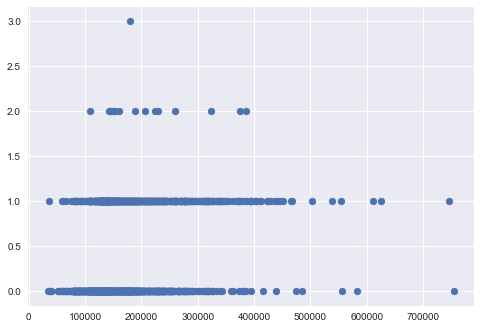

------------------------------------
SalePrice compared to BsmtHalfBath
------------------------------------
Continous vs Continous
Correlation: -0.01684415429735902


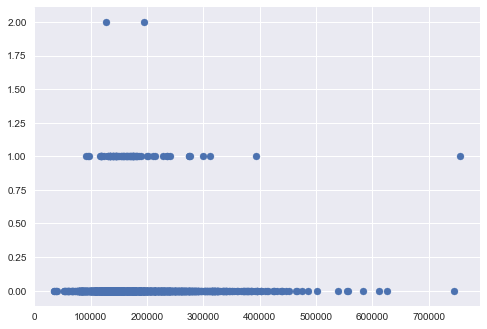

------------------------------------
SalePrice compared to BsmtQual
------------------------------------
Catagorical vs Continuous
F = 392.9135064723092
p = 9.610615106781709e-186


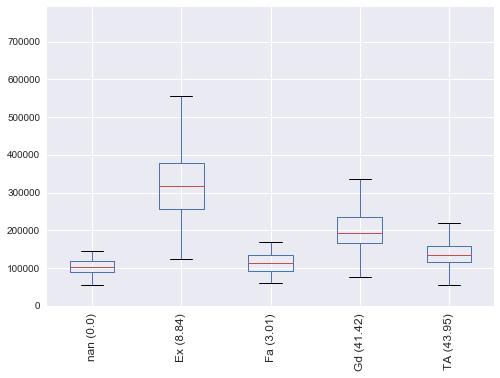

------------------------------------
SalePrice compared to BsmtUnfSF
------------------------------------
Continous vs Continous
Correlation: 0.21447910554696895


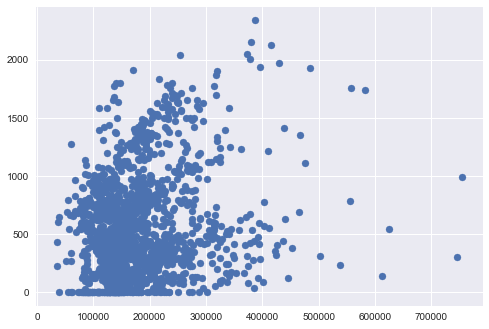

------------------------------------
SalePrice compared to CentralAir
------------------------------------
Catagorical vs Continuous
F = 98.30534356615253
p = 1.8095061559267854e-22


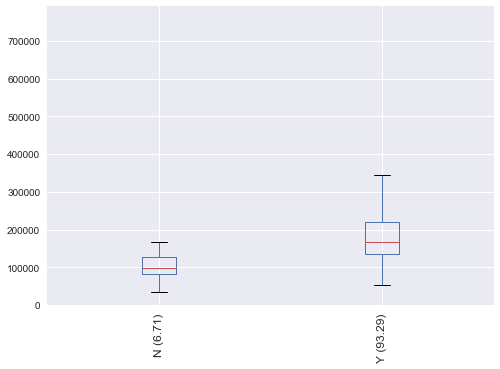

------------------------------------
SalePrice compared to Condition1
------------------------------------
Catagorical vs Continuous
F = 6.118017137125925
p = 8.904549416138853e-08


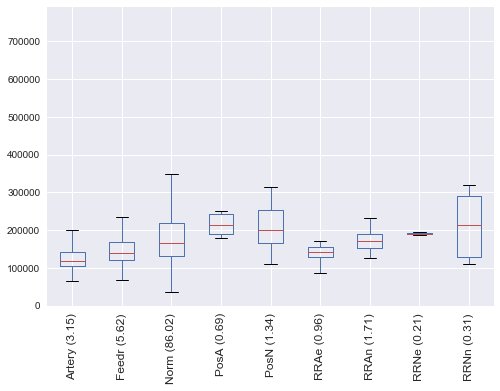

------------------------------------
SalePrice compared to Condition2
------------------------------------
Catagorical vs Continuous
F = 2.0738986215227877
p = 0.043425658360948464


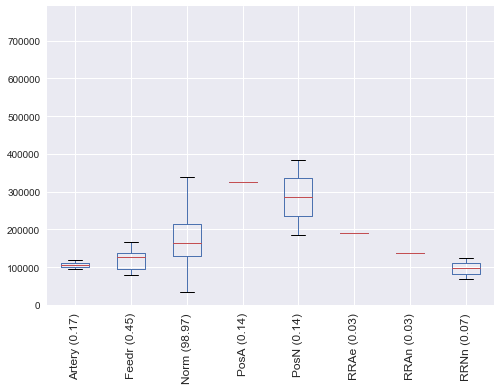

------------------------------------
SalePrice compared to Electrical
------------------------------------
Catagorical vs Continuous
F = 23.067673024057125
p = 1.6632487814737638e-18


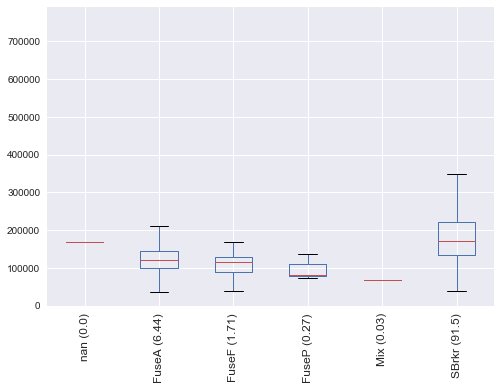

------------------------------------
SalePrice compared to EnclosedPorch
------------------------------------
Continous vs Continous
Correlation: -0.1285779579259565


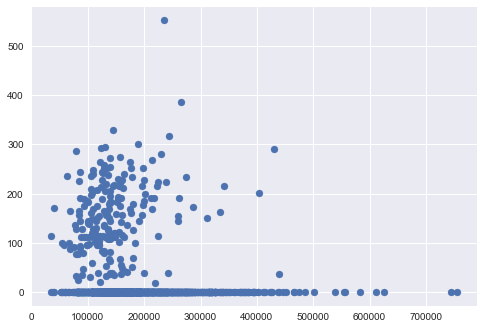

------------------------------------
SalePrice compared to ExterCond
------------------------------------
Catagorical vs Continuous
F = 8.798714214177485
p = 5.106680608671862e-07


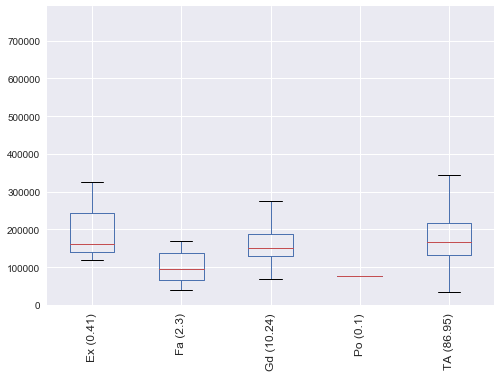

------------------------------------
SalePrice compared to ExterQual
------------------------------------
Catagorical vs Continuous
F = 443.3348314150462
p = 1.4395510967787893e-204


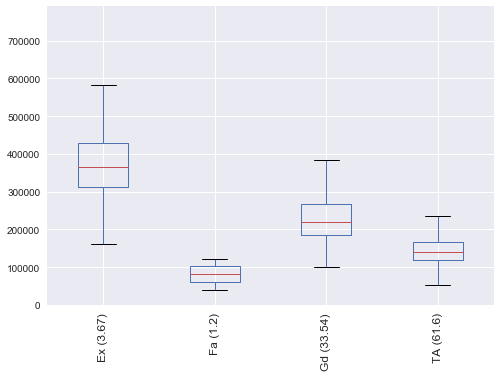

------------------------------------
SalePrice compared to Exterior1st
------------------------------------
Catagorical vs Continuous
F = 18.611742866245784
p = 2.5860887286376316e-43


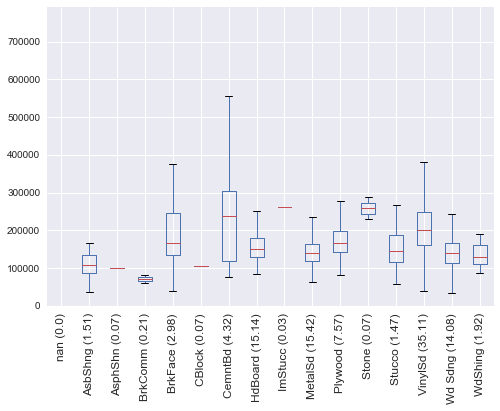

------------------------------------
SalePrice compared to Exterior2nd
------------------------------------
Catagorical vs Continuous
F = 17.50083957136983
p = 4.842185670698891e-43


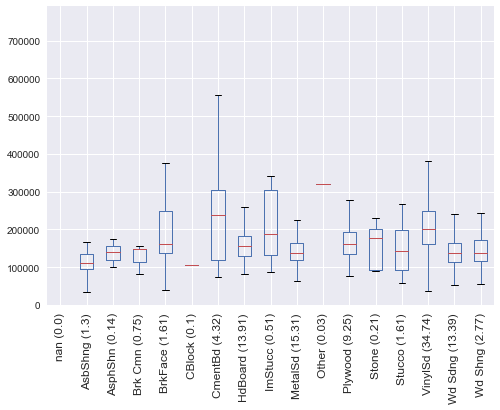

------------------------------------
SalePrice compared to Fence
------------------------------------
Catagorical vs Continuous
F = 4.948158647146985
p = 0.002312645635631918


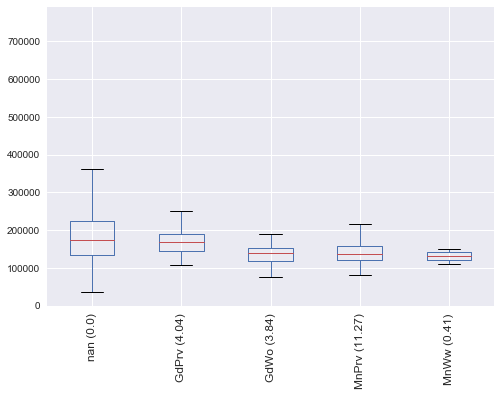

------------------------------------
SalePrice compared to FireplaceQu
------------------------------------
Catagorical vs Continuous
F = 24.398929420064125
p = 5.016300447019087e-19


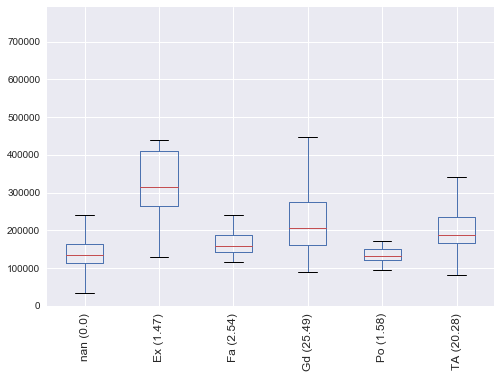

------------------------------------
SalePrice compared to Fireplaces
------------------------------------
Continous vs Continous
Correlation: 0.46692883675152763


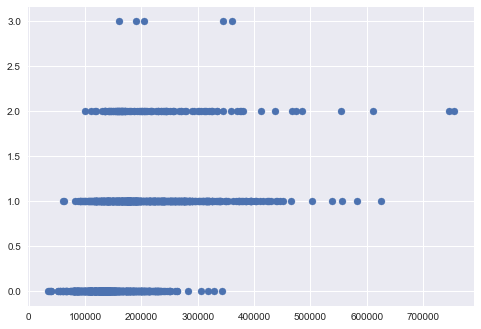

------------------------------------
SalePrice compared to Foundation
------------------------------------
Catagorical vs Continuous
F = 100.25385058740888
p = 5.791895002232233e-91


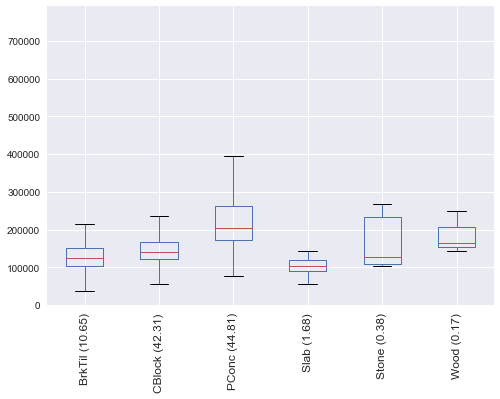

------------------------------------
SalePrice compared to FullBath
------------------------------------
Continous vs Continous
Correlation: 0.5606637627484456


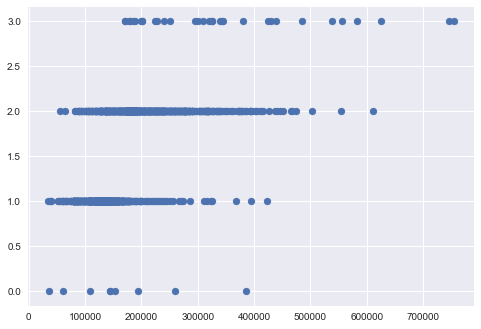

------------------------------------
SalePrice compared to Functional
------------------------------------
Catagorical vs Continuous
F = 4.057875427792022
p = 0.0004841696801078294


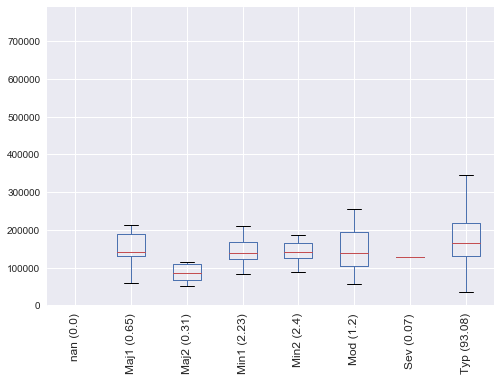

------------------------------------
SalePrice compared to GarageArea
------------------------------------
Continous vs Continous
Correlation: 0.6234314389183617


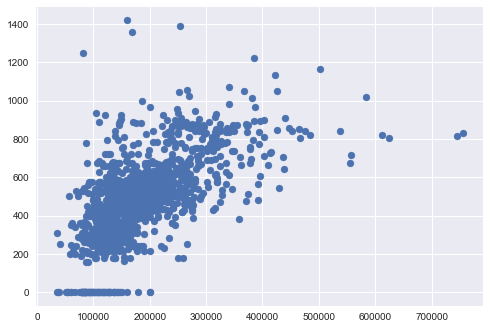

------------------------------------
SalePrice compared to GarageCars
------------------------------------
Continous vs Continous
Correlation: 0.6404091972583531


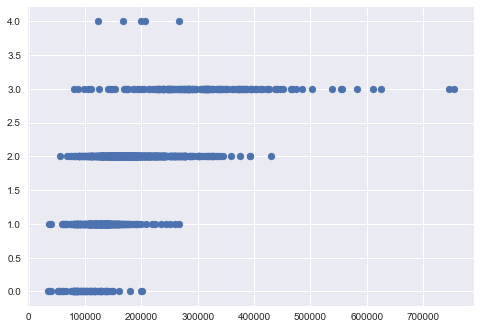

------------------------------------
SalePrice compared to GarageCond
------------------------------------
Catagorical vs Continuous
F = 9.541160950615971
p = 1.3097143055289643e-07


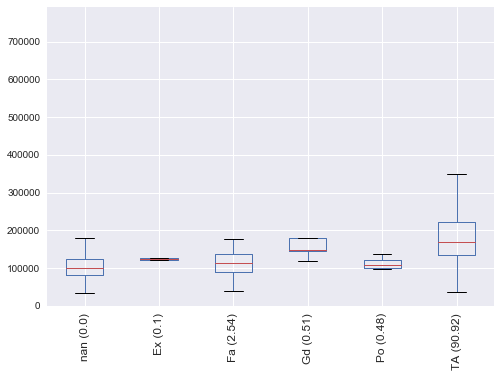

------------------------------------
SalePrice compared to GarageFinish
------------------------------------
Catagorical vs Continuous
F = 250.96246721359347
p = 1.1991165312294262e-93


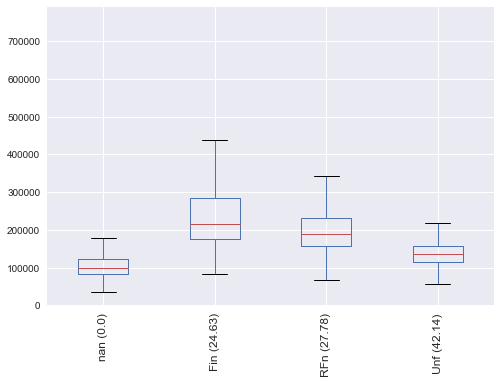

------------------------------------
SalePrice compared to GarageQual
------------------------------------
Catagorical vs Continuous
F = 9.57038935007985
p = 1.2408026478015653e-07


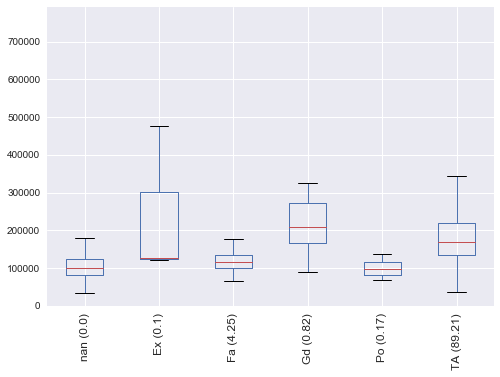

------------------------------------
SalePrice compared to GarageType
------------------------------------
Catagorical vs Continuous
F = 71.52212307893011
p = 1.247153670658973e-66


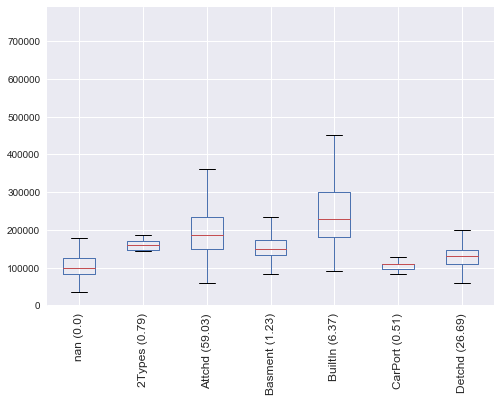

------------------------------------
SalePrice compared to GarageYrBlt
------------------------------------
Continous vs Continous
Correlation: 0.4863616774878608


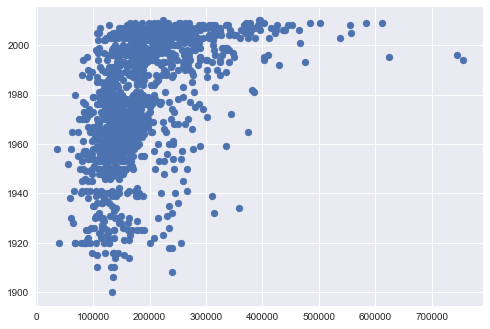

------------------------------------
SalePrice compared to GrLivArea
------------------------------------
Continous vs Continous
Correlation: 0.7086244776126522


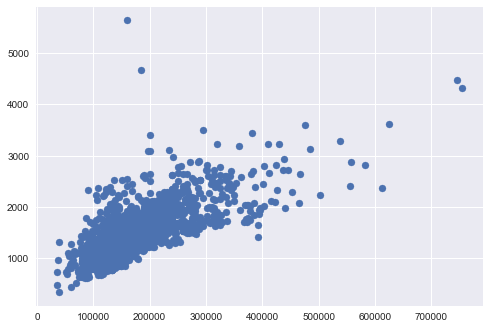

------------------------------------
SalePrice compared to HalfBath
------------------------------------
Continous vs Continous
Correlation: 0.2841076755947829


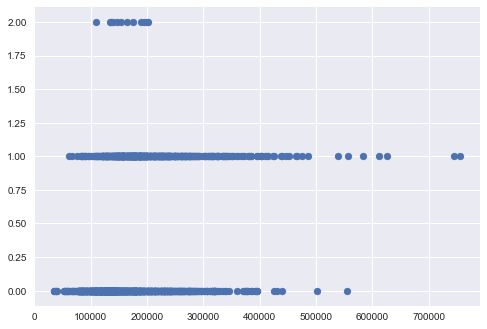

------------------------------------
SalePrice compared to Heating
------------------------------------
Catagorical vs Continuous
F = 4.259818559406288
p = 0.000753472106445497


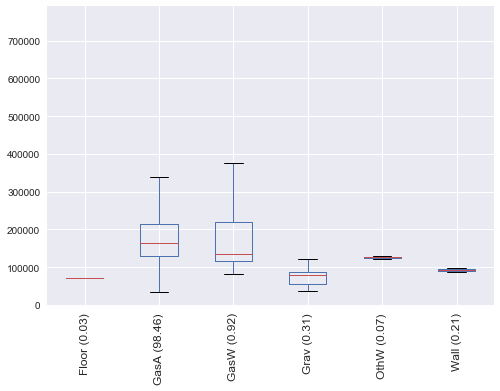

------------------------------------
SalePrice compared to HeatingQC
------------------------------------
Catagorical vs Continuous
F = 88.39446198869796
p = 2.667062092104357e-67


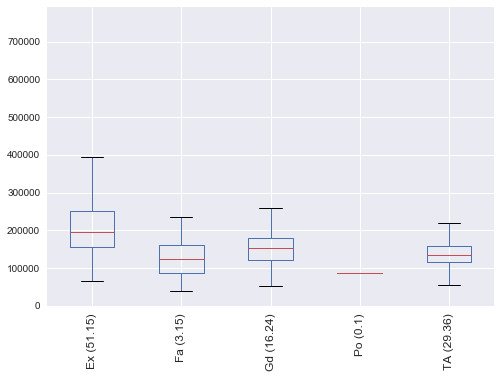

------------------------------------
SalePrice compared to HouseStyle
------------------------------------
Catagorical vs Continuous
F = 19.595000995981213
p = 3.376776535121222e-25


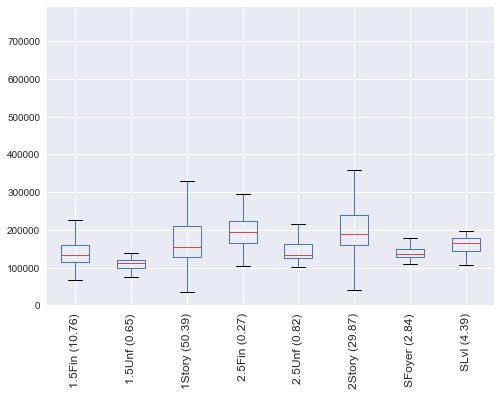

------------------------------------
SalePrice compared to Id
------------------------------------
Continous vs Continous
Correlation: -0.02191671944343111


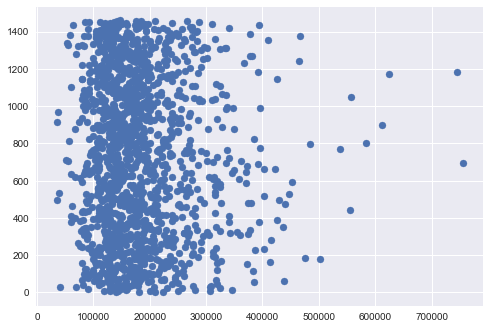

------------------------------------
SalePrice compared to KitchenAbvGr
------------------------------------
Continous vs Continous
Correlation: -0.1359073708421411


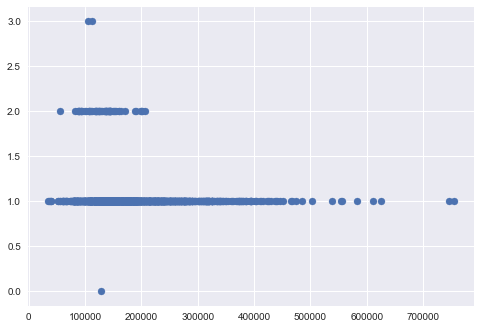

------------------------------------
SalePrice compared to KitchenQual
------------------------------------
Catagorical vs Continuous
F = 407.8063515583885
p = 3.0322127528407505e-192


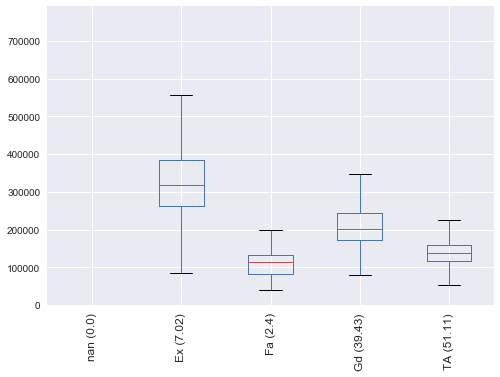

------------------------------------
SalePrice compared to LandContour
------------------------------------
Catagorical vs Continuous
F = 12.850188333283924
p = 2.7422167521379096e-08


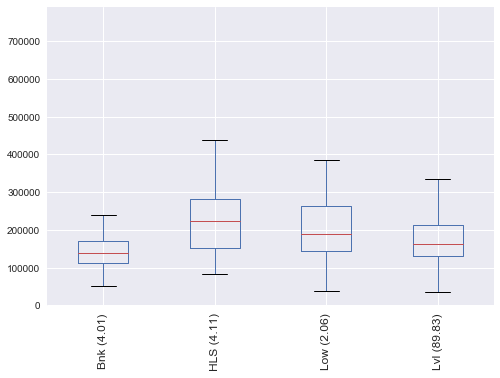

------------------------------------
SalePrice compared to LandSlope
------------------------------------
Catagorical vs Continuous
F = 1.9588170374149438
p = 0.1413963584114019


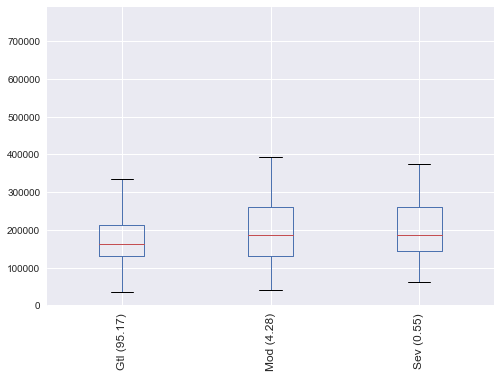

------------------------------------
SalePrice compared to LotArea
------------------------------------
Continous vs Continous
Correlation: 0.26384335387140573


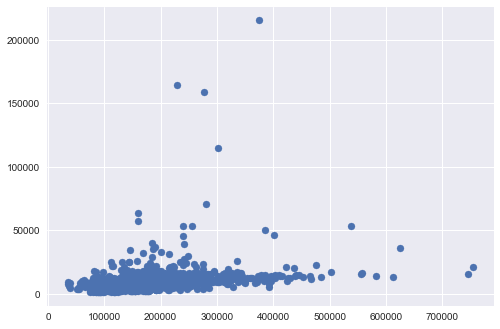

------------------------------------
SalePrice compared to LotConfig
------------------------------------
Catagorical vs Continuous
F = 7.809954123467792
p = 3.163167473604189e-06


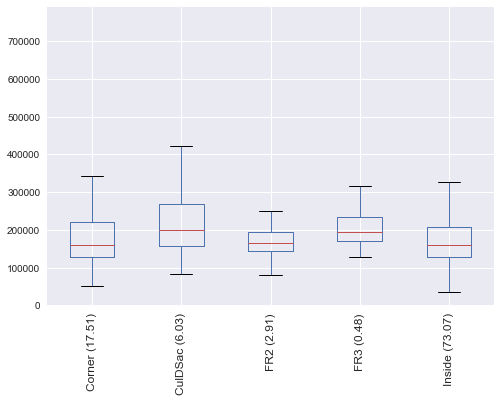

------------------------------------
SalePrice compared to LotFrontage
------------------------------------
Continous vs Continous
Correlation: 0.3517990965706781


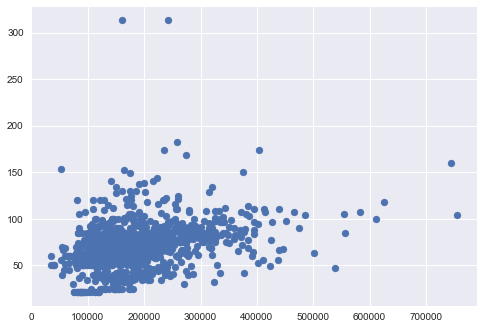

------------------------------------
SalePrice compared to LotShape
------------------------------------
Catagorical vs Continuous
F = 40.13285166226295
p = 6.447523852011766e-25


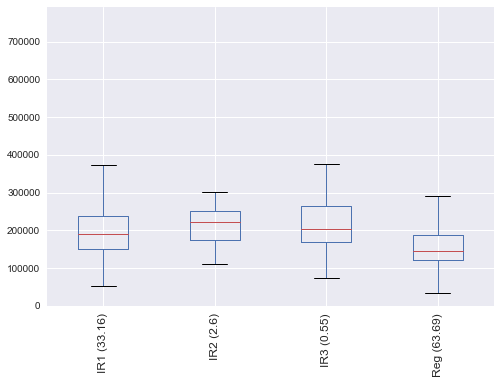

------------------------------------
SalePrice compared to LowQualFinSF
------------------------------------
Continous vs Continous
Correlation: -0.02560613000067959


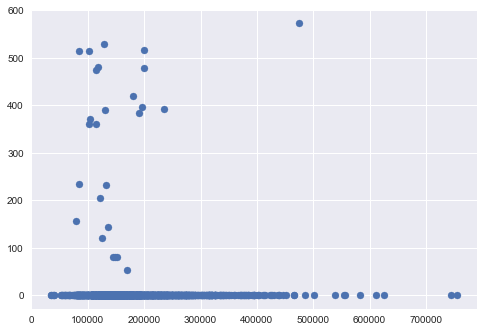

------------------------------------
SalePrice compared to MSSubClass
------------------------------------
Continous vs Continous
Correlation: -0.08428413512659526


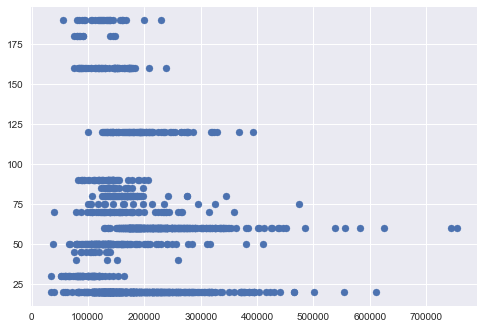

------------------------------------
SalePrice compared to MSZoning
------------------------------------
Catagorical vs Continuous
F = 43.840281672457195
p = 8.817633866272648e-35


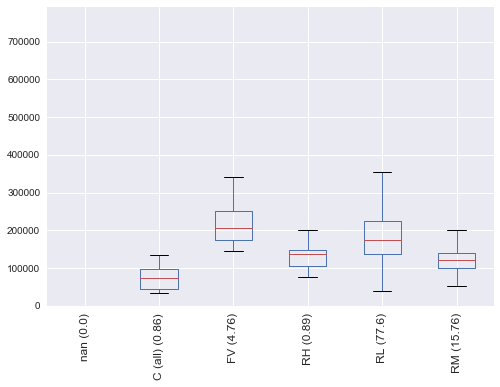

------------------------------------
SalePrice compared to MasVnrArea
------------------------------------
Continous vs Continous
Correlation: 0.477493047095716


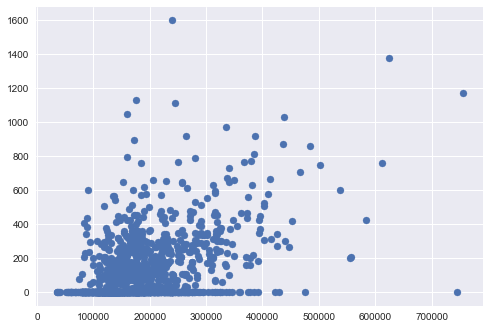

------------------------------------
SalePrice compared to MasVnrType
------------------------------------
Catagorical vs Continuous
F = 111.67238008941877
p = 4.793331178118786e-65


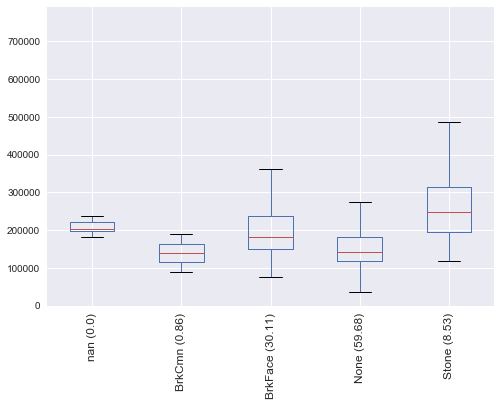

------------------------------------
SalePrice compared to MiscFeature
------------------------------------
Catagorical vs Continuous
F = 2.1573240206469393
p = 0.10472761568792907


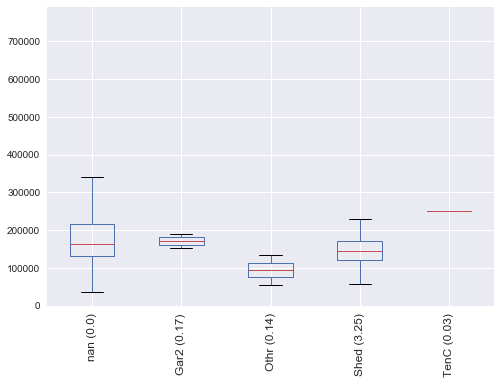

------------------------------------
SalePrice compared to MiscVal
------------------------------------
Continous vs Continous
Correlation: -0.021189579640303245


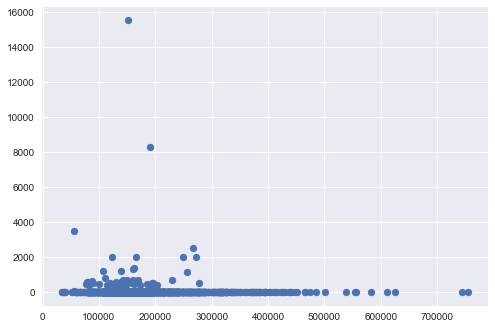

------------------------------------
SalePrice compared to MoSold
------------------------------------
Continous vs Continous
Correlation: 0.04643224522381939


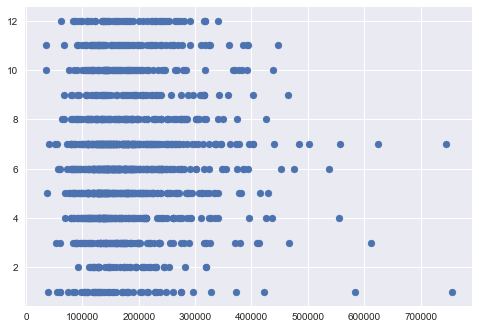

------------------------------------
SalePrice compared to Neighborhood
------------------------------------
Catagorical vs Continuous
F = 71.78486512058281
p = 1.5586002827707996e-225


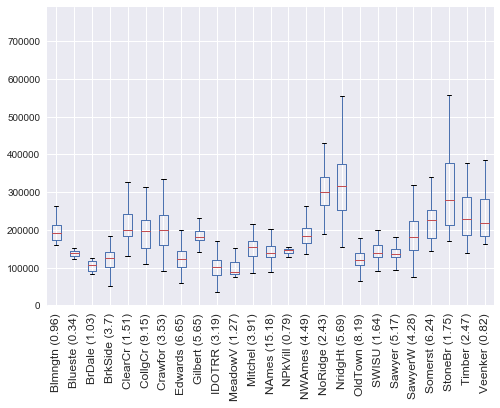

------------------------------------
SalePrice compared to OpenPorchSF
------------------------------------
Continous vs Continous
Correlation: 0.31585622711605543


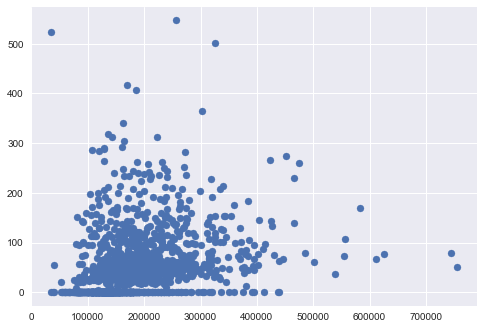

------------------------------------
SalePrice compared to OverallCond
------------------------------------
Continous vs Continous
Correlation: -0.077855894048678


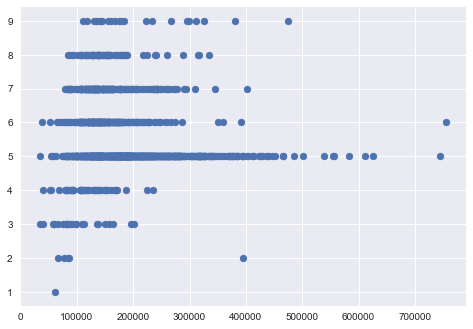

------------------------------------
SalePrice compared to OverallQual
------------------------------------
Continous vs Continous
Correlation: 0.7909816005838048


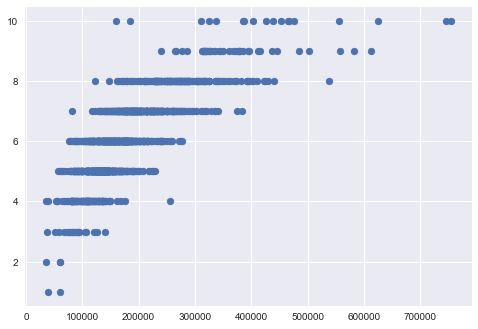

------------------------------------
SalePrice compared to PavedDrive
------------------------------------
Catagorical vs Continuous
F = 42.02417941762533
p = 1.803568890651533e-18


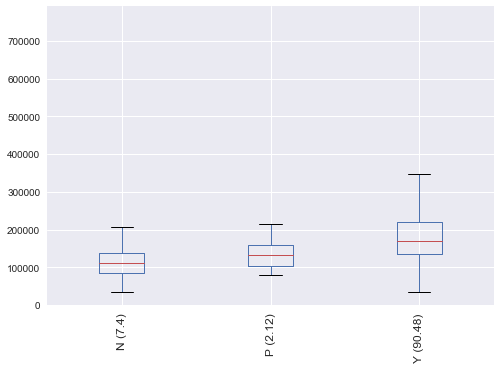

------------------------------------
SalePrice compared to PoolArea
------------------------------------
Continous vs Continous
Correlation: 0.09240354949187317


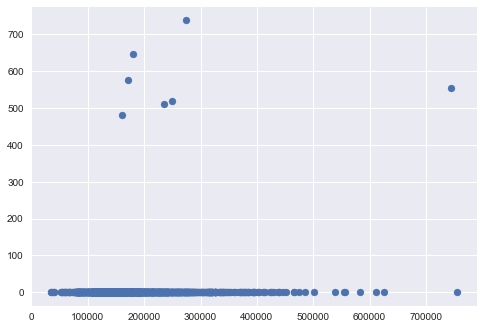

------------------------------------
SalePrice compared to PoolQC
------------------------------------
Catagorical vs Continuous
F = 1.6274690738799704
p = 0.30398528011207915


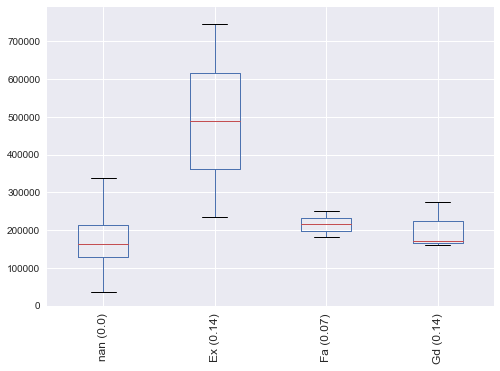

------------------------------------
SalePrice compared to RoofMatl
------------------------------------
Catagorical vs Continuous
F = 6.727304893420314
p = 7.231444779987188e-08


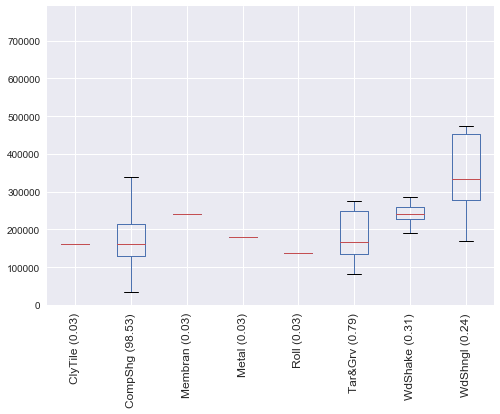

------------------------------------
SalePrice compared to RoofStyle
------------------------------------
Catagorical vs Continuous
F = 17.805497229144205
p = 3.653523047099125e-17


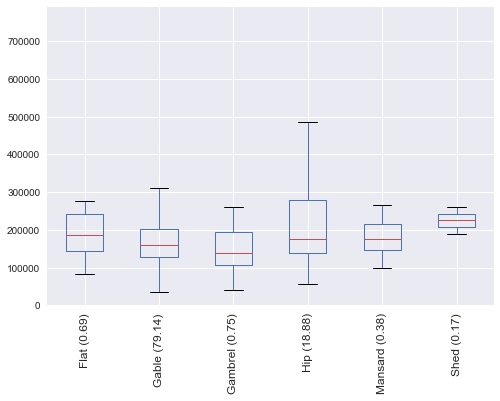

------------------------------------
SalePrice compared to SaleCondition
------------------------------------
Catagorical vs Continuous
F = 45.57842830969572
p = 7.988268404991176e-44


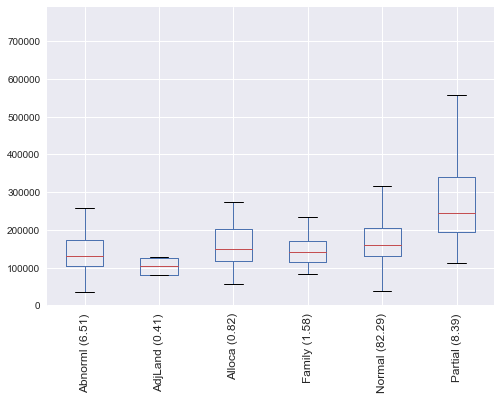

------------------------------------
SalePrice compared to SaleType
------------------------------------
Catagorical vs Continuous
F = 28.863054116984088
p = 5.039766889462451e-42


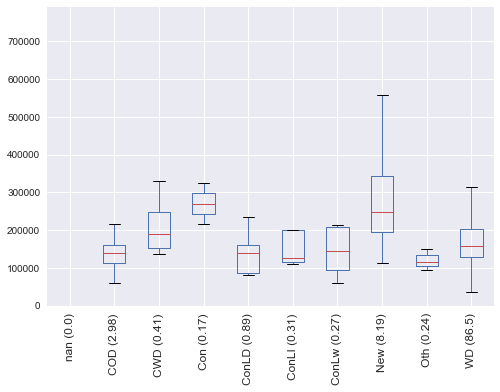

------------------------------------
SalePrice compared to ScreenPorch
------------------------------------
Continous vs Continous
Correlation: 0.1114465711429111


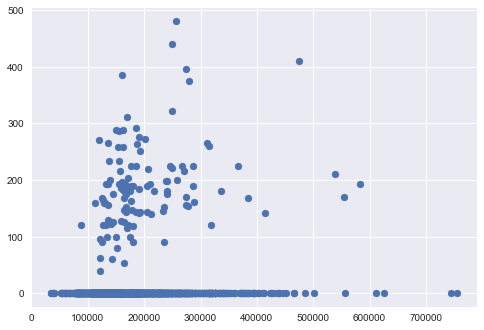

------------------------------------
SalePrice compared to Street
------------------------------------
Catagorical vs Continuous
F = 2.4592895583691994
p = 0.11704860406782483


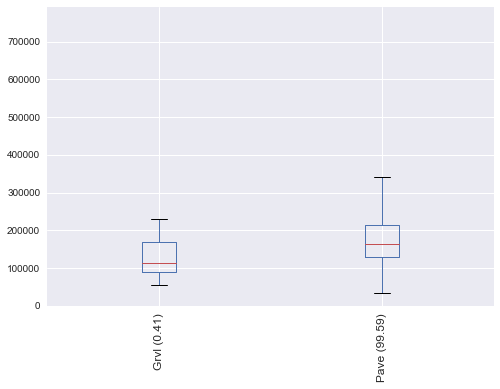

------------------------------------
SalePrice compared to TotRmsAbvGrd
------------------------------------
Continous vs Continous
Correlation: 0.5337231555820284


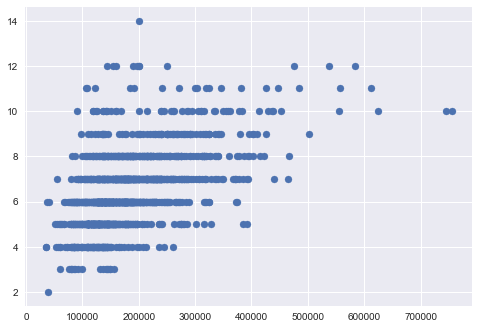

------------------------------------
SalePrice compared to TotalBsmtSF
------------------------------------
Continous vs Continous
Correlation: 0.6135805515591956


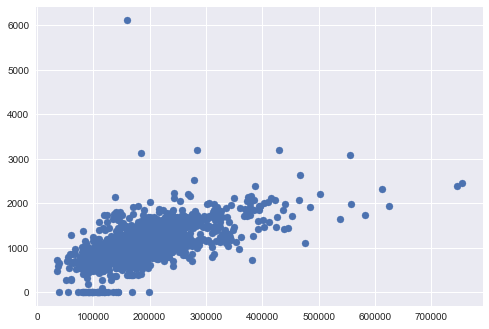

------------------------------------
SalePrice compared to Utilities
------------------------------------
Catagorical vs Continuous
F = 0.29880407484898486
p = 0.5847167739689381


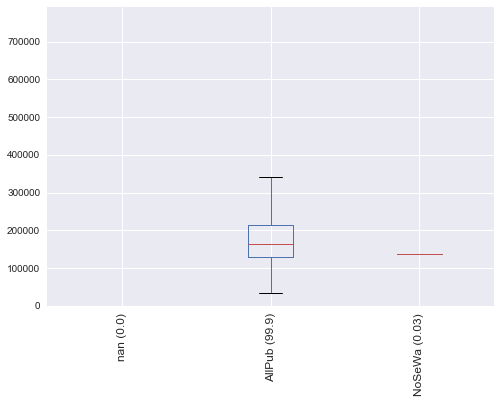

------------------------------------
SalePrice compared to WoodDeckSF
------------------------------------
Continous vs Continous
Correlation: 0.3244134445681295


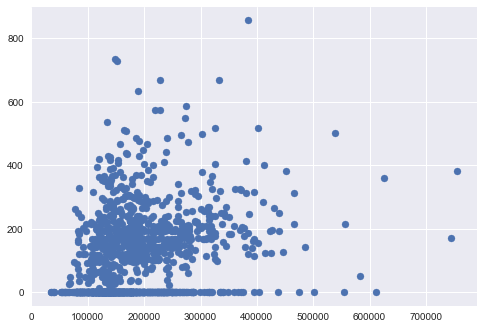

------------------------------------
SalePrice compared to YearBuilt
------------------------------------
Continous vs Continous
Correlation: 0.5228973328794969


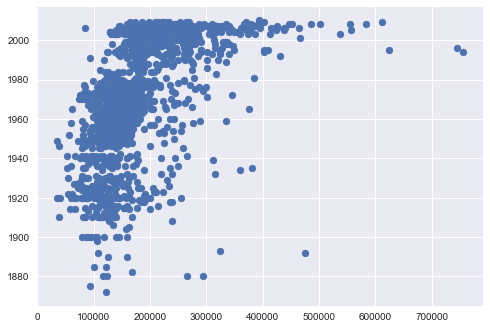

------------------------------------
SalePrice compared to YearRemodAdd
------------------------------------
Continous vs Continous
Correlation: 0.5071009671113864


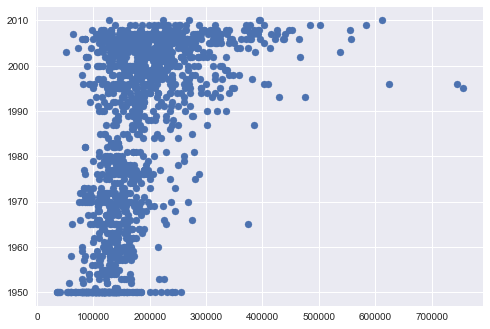

------------------------------------
SalePrice compared to YrSold
------------------------------------
Continous vs Continous
Correlation: -0.02892258516873034


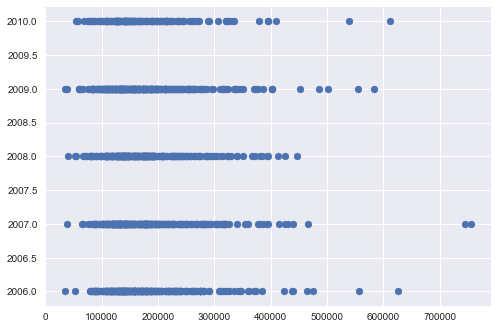

------------------------------------
1stFlrSF compared to 2ndFlrSF
------------------------------------
Continous vs Continous
Correlation: -0.24982325229716248


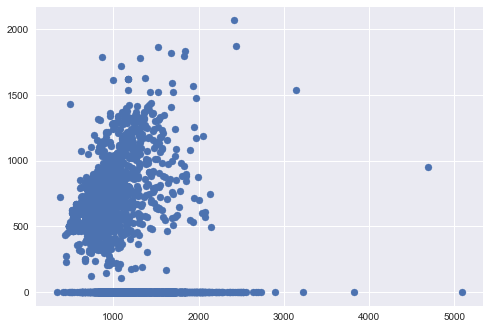

------------------------------------
1stFlrSF compared to 3SsnPorch
------------------------------------
Continous vs Continous
Correlation: 0.044085938422584875


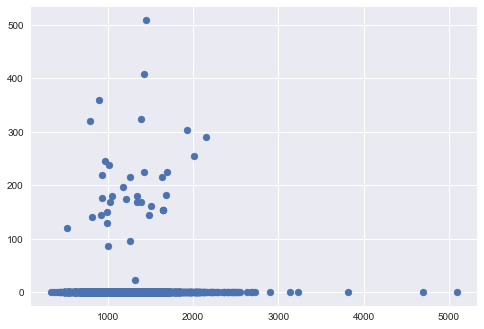

------------------------------------
1stFlrSF compared to Alley
------------------------------------
Catagorical vs Continuous
F = 3.5361124888455855
p = 0.06152923458979791


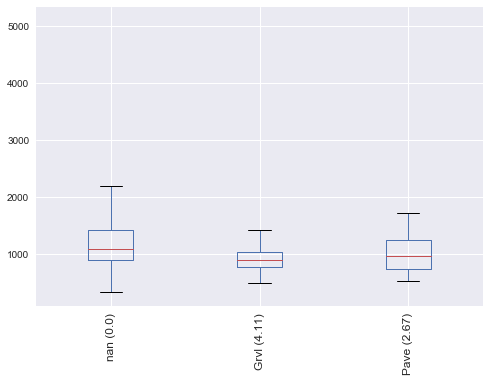

------------------------------------
1stFlrSF compared to BedroomAbvGr
------------------------------------
Continous vs Continous
Correlation: 0.1084181683566546


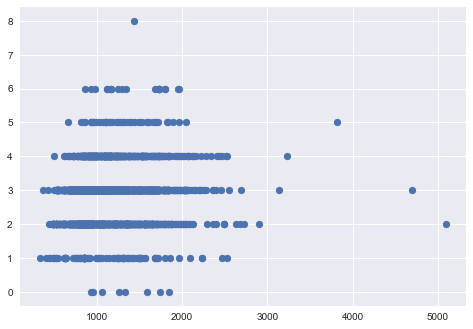

------------------------------------
1stFlrSF compared to BldgType
------------------------------------
Catagorical vs Continuous
F = 35.98439656154286
p = 2.159074205311633e-29


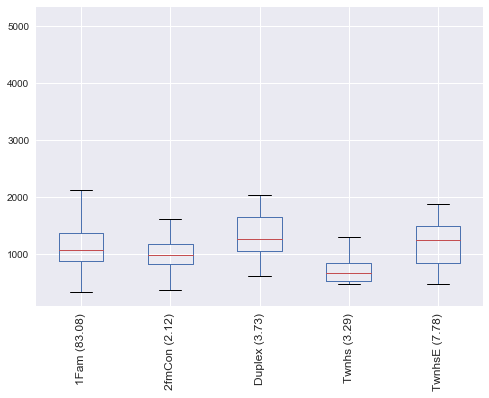

------------------------------------
1stFlrSF compared to BsmtCond
------------------------------------
Catagorical vs Continuous
F = 7.709326112938435
p = 3.965041155772475e-05


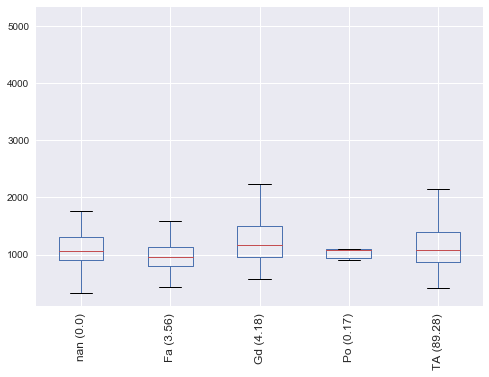

------------------------------------
1stFlrSF compared to BsmtExposure
------------------------------------
Catagorical vs Continuous
F = 135.64233938435405
p = 4.100667928248159e-82


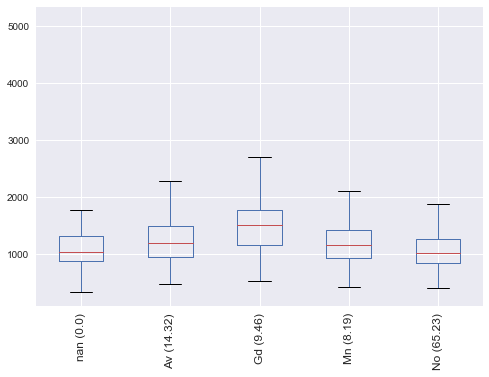

------------------------------------
1stFlrSF compared to BsmtFinSF1
------------------------------------
Continous vs Continous
Correlation: 0.45809172665320375


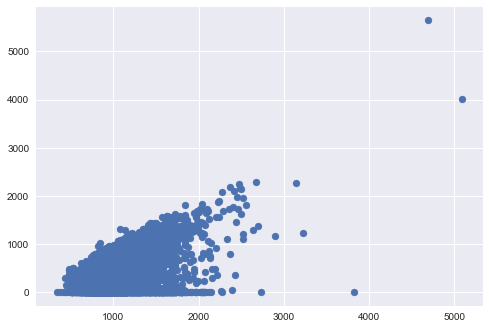

------------------------------------
1stFlrSF compared to BsmtFinSF2
------------------------------------
Continous vs Continous
Correlation: 0.08432971208759803


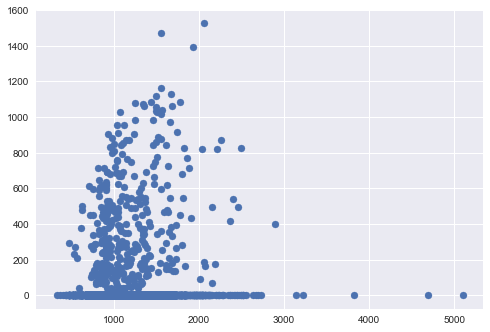

------------------------------------
1stFlrSF compared to BsmtFinType1
------------------------------------
Catagorical vs Continuous
F = 44.665272828648185
p = 1.6844421022580556e-44


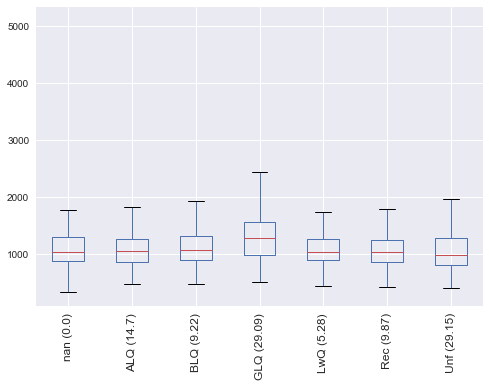

------------------------------------
1stFlrSF compared to BsmtFinType2
------------------------------------
Catagorical vs Continuous
F = 1.2378130183169842
p = 0.2885771620748251


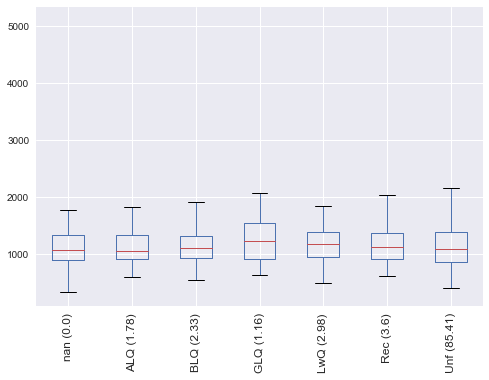

------------------------------------
1stFlrSF compared to BsmtFullBath
------------------------------------
Continous vs Continous
Correlation: 0.26181633165169726


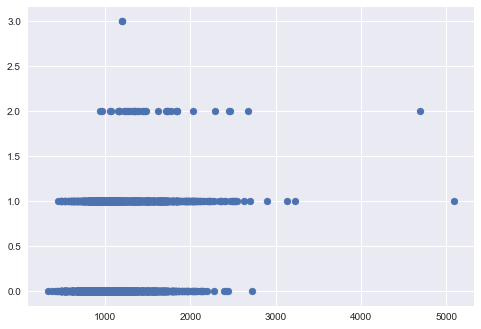

------------------------------------
1stFlrSF compared to BsmtHalfBath
------------------------------------
Continous vs Continous
Correlation: 0.011073624526728516


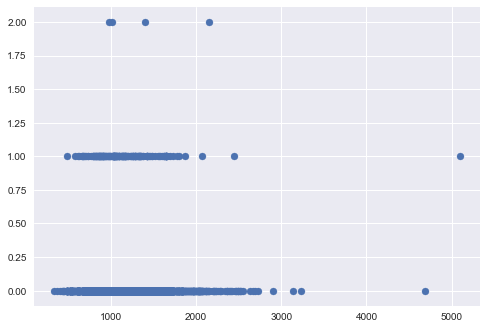

------------------------------------
1stFlrSF compared to BsmtQual
------------------------------------
Catagorical vs Continuous
F = 227.62062748591836
p = 2.639255830305426e-132


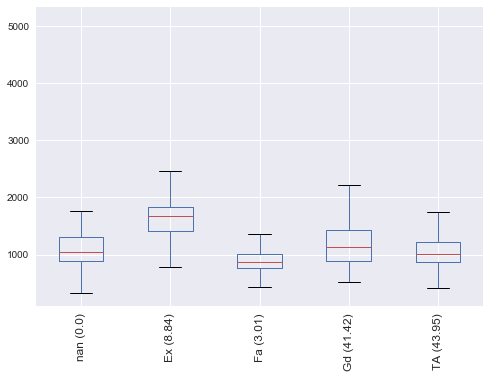

------------------------------------
1stFlrSF compared to BsmtUnfSF
------------------------------------
Continous vs Continous
Correlation: 0.2965995752405229


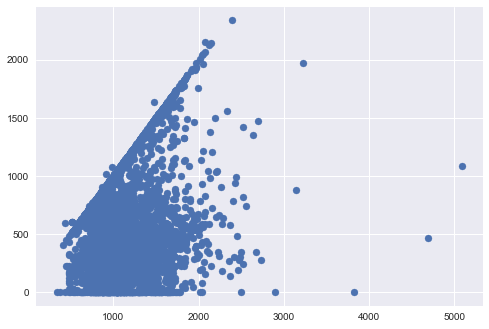

------------------------------------
1stFlrSF compared to CentralAir
------------------------------------
Catagorical vs Continuous
F = 71.68426023168506
p = 3.942347326767253e-17


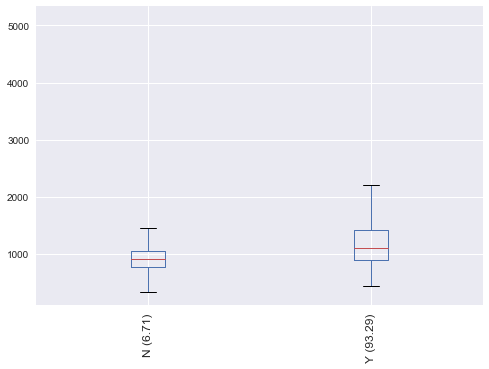

------------------------------------
1stFlrSF compared to Condition1
------------------------------------
Catagorical vs Continuous
F = 9.813497636157768
p = 1.521565842752709e-13


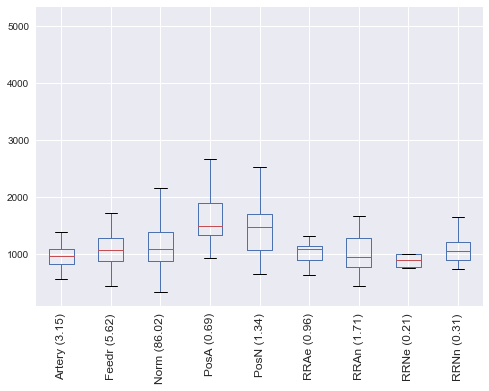

------------------------------------
1stFlrSF compared to Condition2
------------------------------------
Catagorical vs Continuous
F = 9.22538552888577
p = 2.4704698409192914e-11


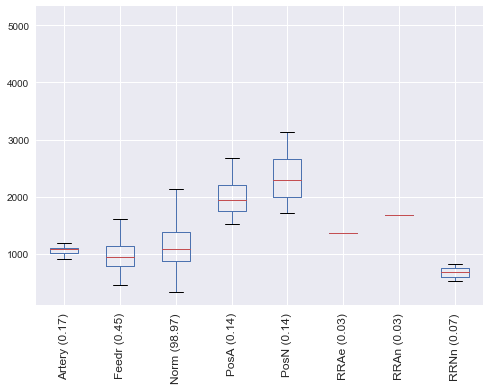

------------------------------------
1stFlrSF compared to Electrical
------------------------------------
Catagorical vs Continuous
F = 13.129888432387673
p = 1.334017320638701e-10


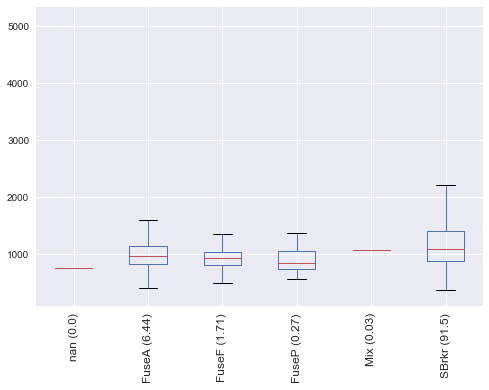

------------------------------------
1stFlrSF compared to EnclosedPorch
------------------------------------
Continous vs Continous
Correlation: -0.06579615162065804


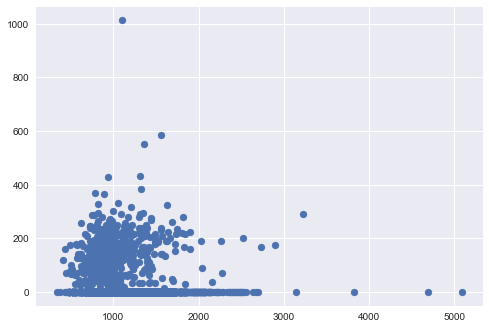

------------------------------------
1stFlrSF compared to ExterCond
------------------------------------
Catagorical vs Continuous
F = 3.9472152497968875
p = 0.0033711892643678294


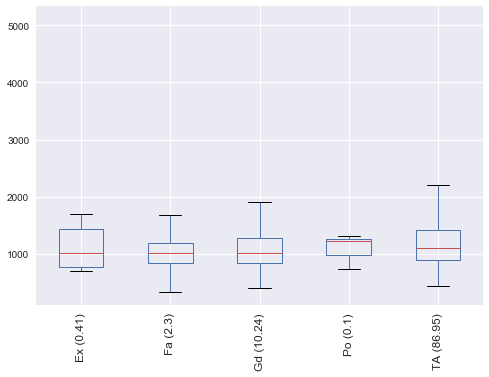

------------------------------------
1stFlrSF compared to ExterQual
------------------------------------
Catagorical vs Continuous
F = 224.6943224860633
p = 3.9276260165896787e-131


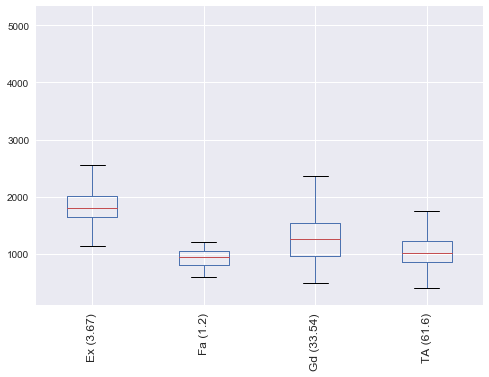

------------------------------------
1stFlrSF compared to Exterior1st
------------------------------------
Catagorical vs Continuous
F = 13.889520667956624
p = 1.156376445574737e-32


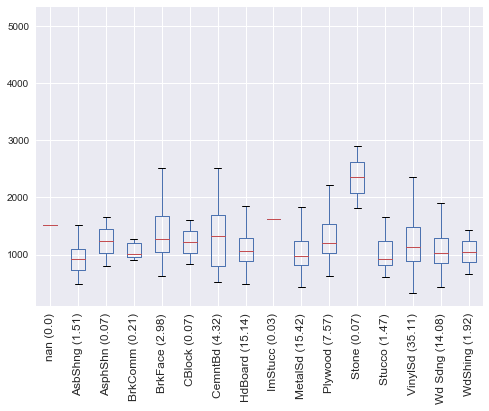

------------------------------------
1stFlrSF compared to Exterior2nd
------------------------------------
Catagorical vs Continuous
F = 12.167526199214821
p = 7.953633785458048e-30


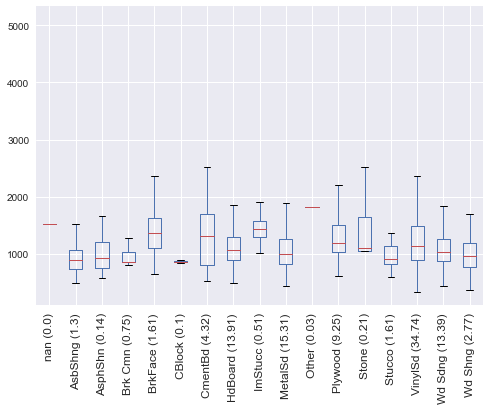

------------------------------------
1stFlrSF compared to Fence
------------------------------------
Catagorical vs Continuous
F = 2.070299581632568
p = 0.10305803803420206


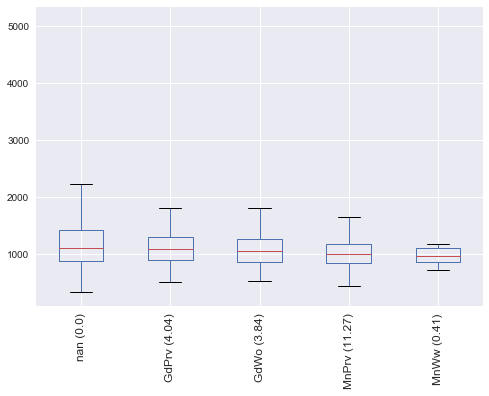

------------------------------------
1stFlrSF compared to FireplaceQu
------------------------------------
Catagorical vs Continuous
F = 24.117145391682868
p = 2.3244124959374337e-19


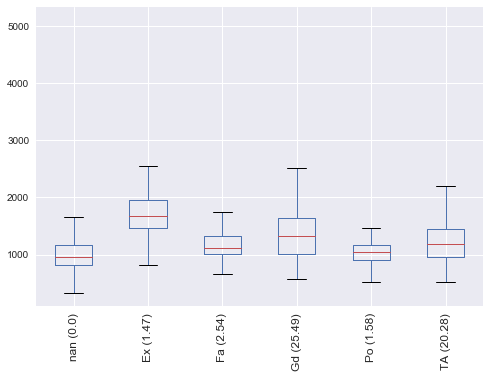

------------------------------------
1stFlrSF compared to Fireplaces
------------------------------------
Continous vs Continous
Correlation: 0.40754492070893744


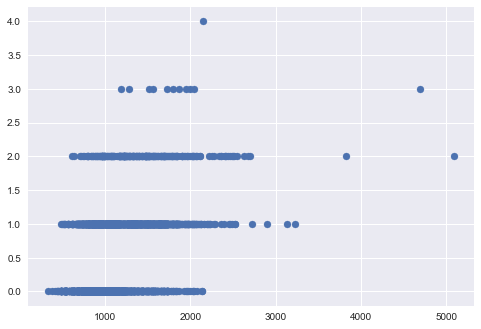

------------------------------------
1stFlrSF compared to Foundation
------------------------------------
Catagorical vs Continuous
F = 38.275317832501024
p = 3.670692899330525e-38


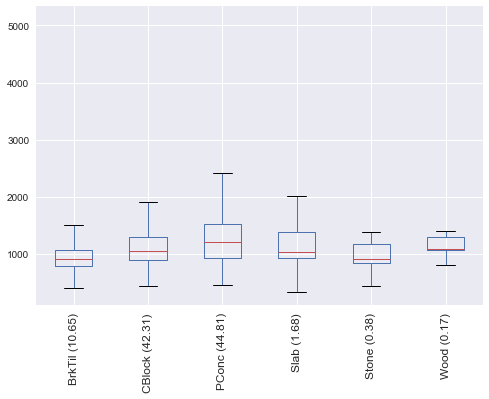

------------------------------------
1stFlrSF compared to FullBath
------------------------------------
Continous vs Continous
Correlation: 0.373076912247442


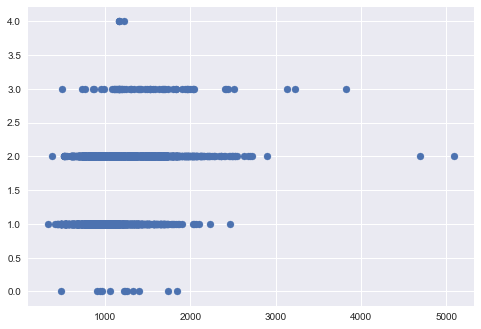

------------------------------------
1stFlrSF compared to Functional
------------------------------------
Catagorical vs Continuous
F = 3.684777671604373
p = 0.001190715181035887


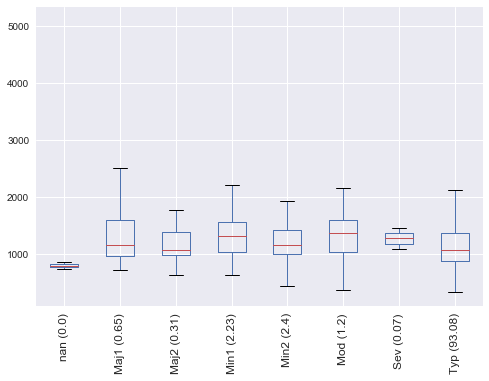

------------------------------------
1stFlrSF compared to GarageArea
------------------------------------
Continous vs Continous
Correlation: 0.4920112209727282


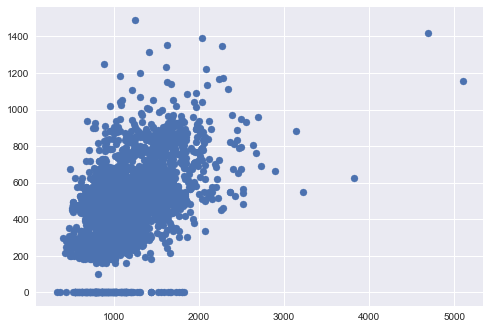

------------------------------------
1stFlrSF compared to GarageCars
------------------------------------
Continous vs Continous
Correlation: 0.44054010728431503


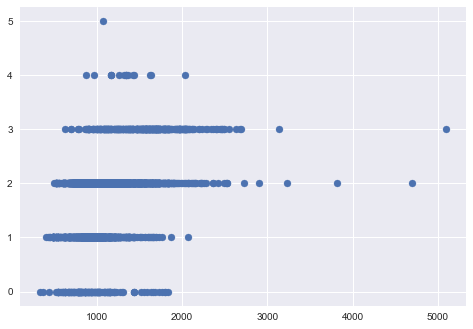

------------------------------------
1stFlrSF compared to GarageCond
------------------------------------
Catagorical vs Continuous
F = 11.08273542649704
p = 6.434230140338016e-09


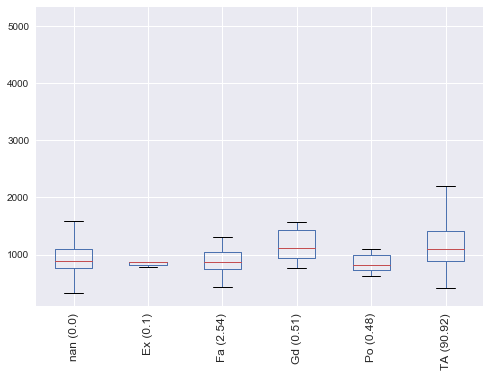

------------------------------------
1stFlrSF compared to GarageFinish
------------------------------------
Catagorical vs Continuous
F = 155.29134060003915
p = 1.2399779841535215e-64


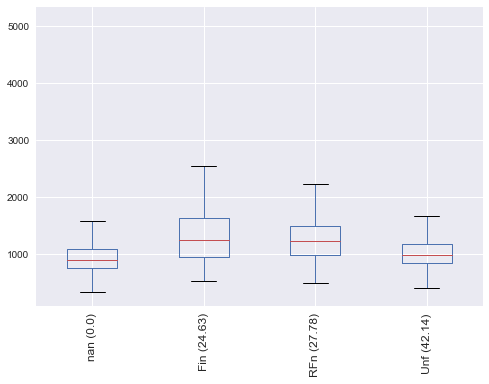

------------------------------------
1stFlrSF compared to GarageQual
------------------------------------
Catagorical vs Continuous
F = 18.497002634798243
p = 5.178107921678971e-15


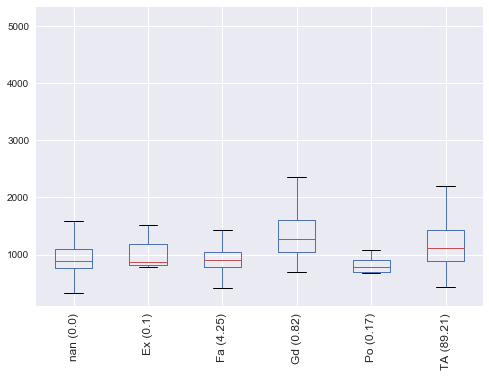

------------------------------------
1stFlrSF compared to GarageType
------------------------------------
Catagorical vs Continuous
F = 94.29475679526944
p = 6.720508744264329e-92


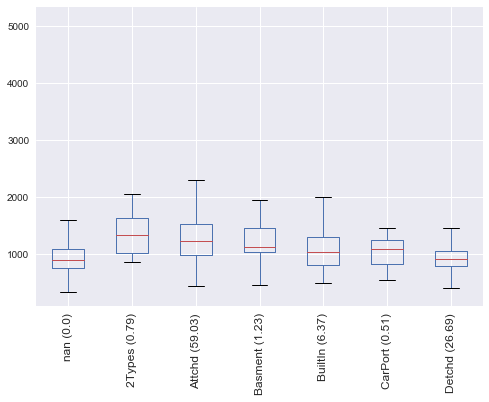

------------------------------------
1stFlrSF compared to GarageYrBlt
------------------------------------
Continous vs Continous
Correlation: 0.2604495371877036


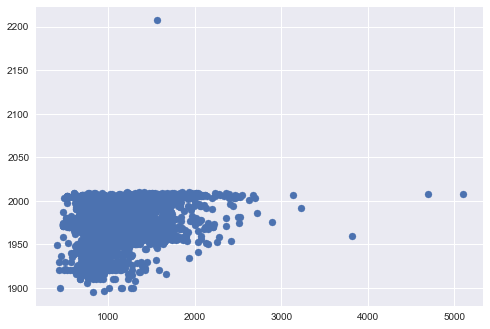

------------------------------------
1stFlrSF compared to GrLivArea
------------------------------------
Continous vs Continous
Correlation: 0.5625382522753419


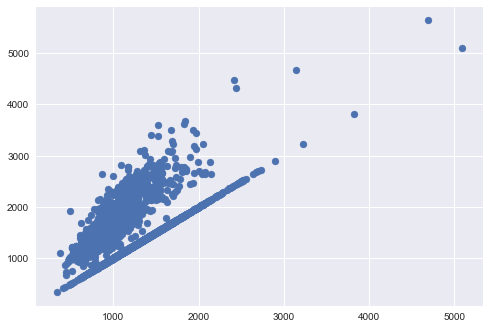

------------------------------------
1stFlrSF compared to HalfBath
------------------------------------
Continous vs Continous
Correlation: -0.10414123868161826


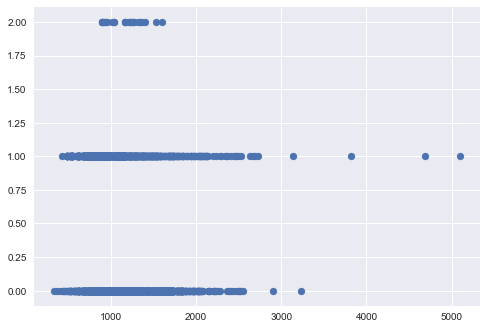

------------------------------------
1stFlrSF compared to Heating
------------------------------------
Catagorical vs Continuous
F = 1.7604942285278344
p = 0.11758020229645423


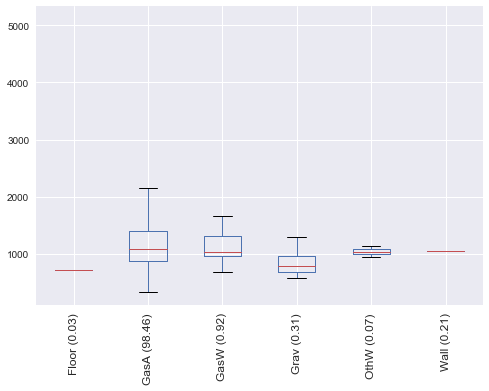

------------------------------------
1stFlrSF compared to HeatingQC
------------------------------------
Catagorical vs Continuous
F = 30.660368729693808
p = 4.908340224580825e-25


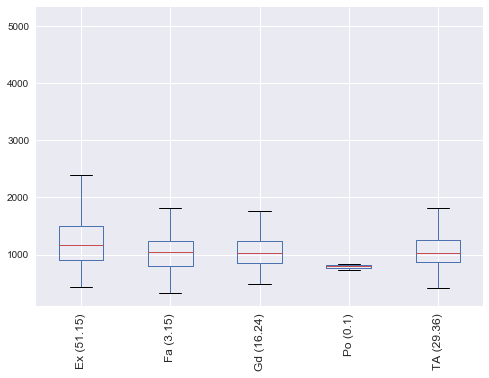

------------------------------------
1stFlrSF compared to HouseStyle
------------------------------------
Catagorical vs Continuous
F = 86.42283898570147
p = 1.3383649353642995e-114


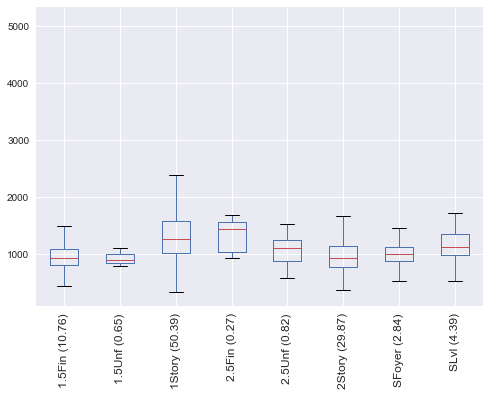

------------------------------------
1stFlrSF compared to Id
------------------------------------
Continous vs Continous
Correlation: -0.008677815830895188


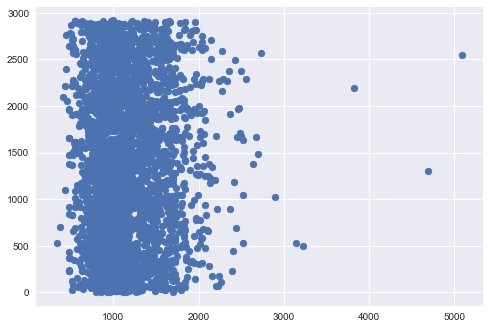

------------------------------------
1stFlrSF compared to KitchenAbvGr
------------------------------------
Continous vs Continous
Correlation: 0.07607053953945363


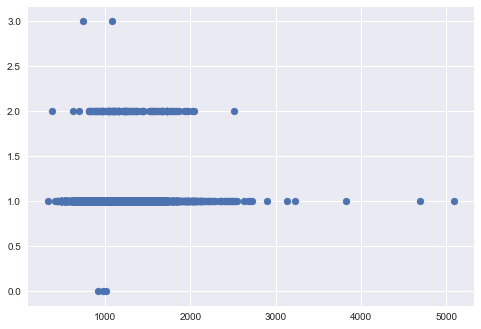

------------------------------------
1stFlrSF compared to KitchenQual
------------------------------------
Catagorical vs Continuous
F = 213.62171236569966
p = 2.984799660376093e-125


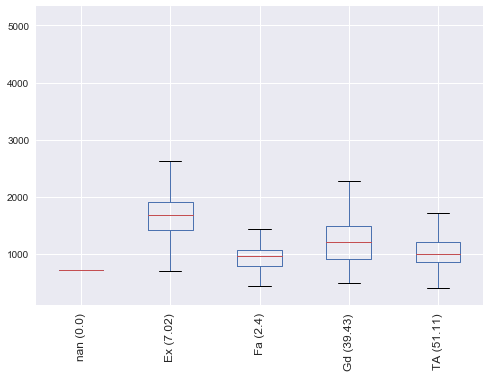

------------------------------------
1stFlrSF compared to LandContour
------------------------------------
Catagorical vs Continuous
F = 13.020354425897041
p = 1.9057720593178977e-08


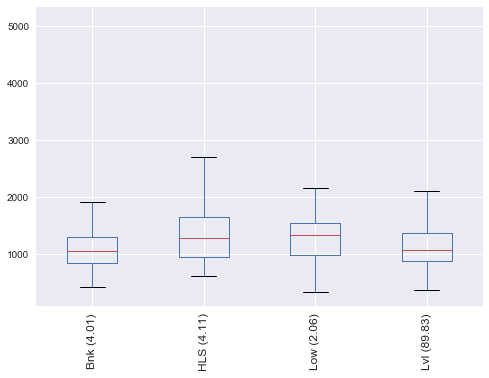

------------------------------------
1stFlrSF compared to LandSlope
------------------------------------
Catagorical vs Continuous
F = 7.529472236215319
p = 0.000547528038252698


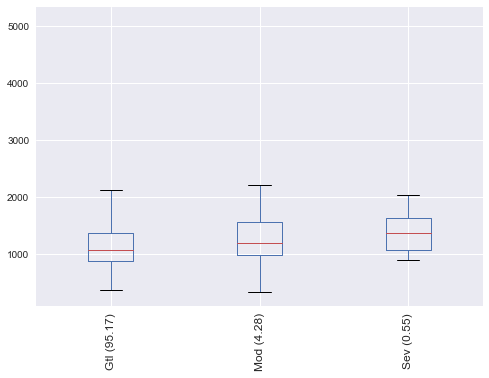

------------------------------------
1stFlrSF compared to LotArea
------------------------------------
Continous vs Continous
Correlation: 0.3324604893309866


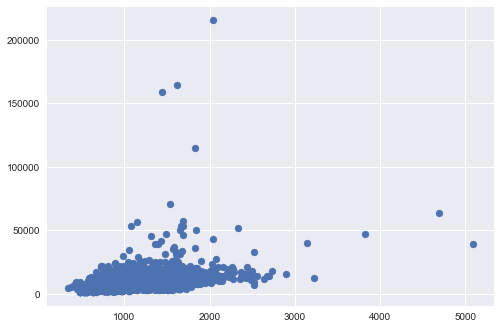

------------------------------------
1stFlrSF compared to LotConfig
------------------------------------
Catagorical vs Continuous
F = 8.604818340564746
p = 6.686964461072426e-07


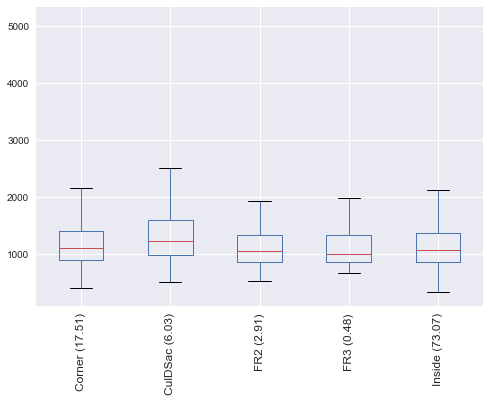

------------------------------------
1stFlrSF compared to LotFrontage
------------------------------------
Continous vs Continous
Correlation: 0.4582474665823355


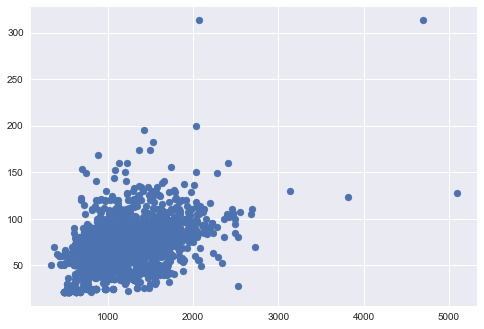

------------------------------------
1stFlrSF compared to LotShape
------------------------------------
Catagorical vs Continuous
F = 43.3278368429774
p = 2.1800489515492055e-27


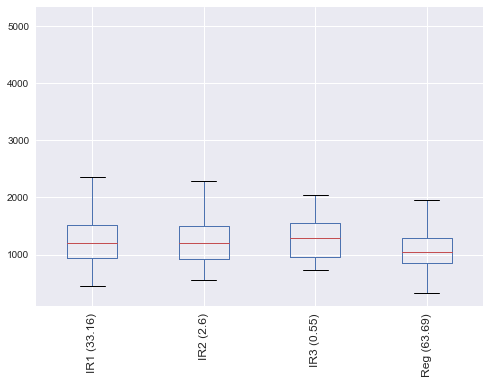

------------------------------------
1stFlrSF compared to LowQualFinSF
------------------------------------
Continous vs Continous
Correlation: -0.012703806945587056


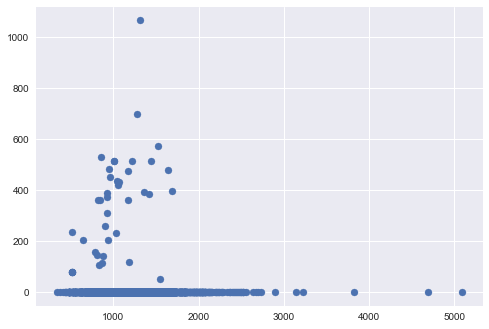

------------------------------------
1stFlrSF compared to MSSubClass
------------------------------------
Continous vs Continous
Correlation: -0.24864147623892607


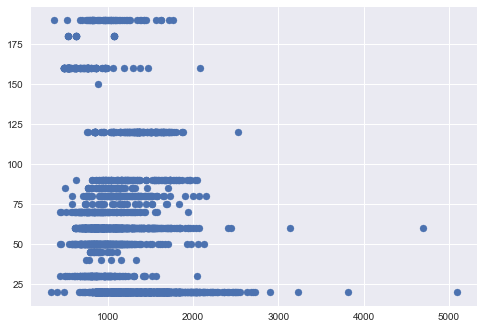

------------------------------------
1stFlrSF compared to MSZoning
------------------------------------
Catagorical vs Continuous
F = 74.6628647493013
p = 2.5112922144716833e-60


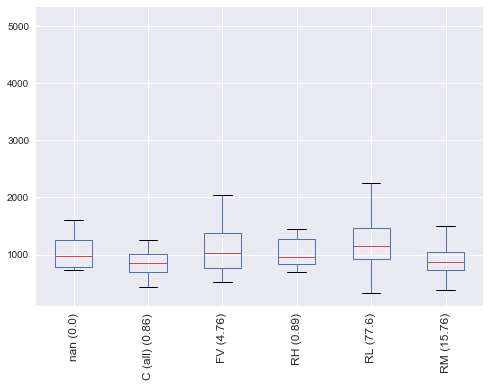

------------------------------------
1stFlrSF compared to MasVnrArea
------------------------------------
Continous vs Continous
Correlation: 0.39583439704843987


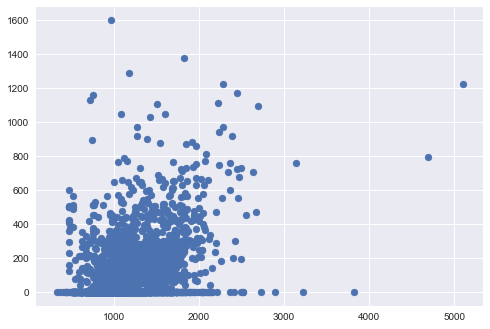

------------------------------------
1stFlrSF compared to MasVnrType
------------------------------------
Catagorical vs Continuous
F = 158.19438968879194
p = 6.129541176414817e-95


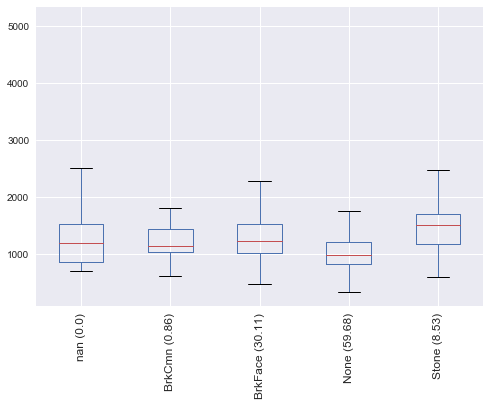

------------------------------------
1stFlrSF compared to MiscFeature
------------------------------------
Catagorical vs Continuous
F = 1.144856875516538
p = 0.33476309892083705


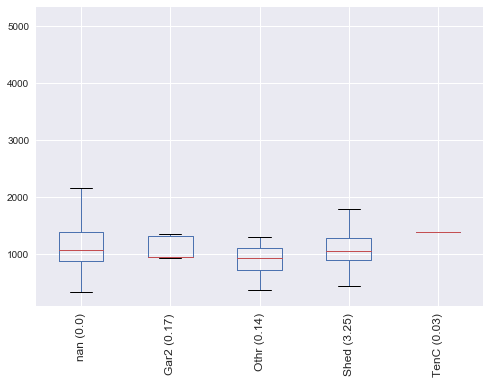

------------------------------------
1stFlrSF compared to MiscVal
------------------------------------
Continous vs Continous
Correlation: 0.09306181549659312


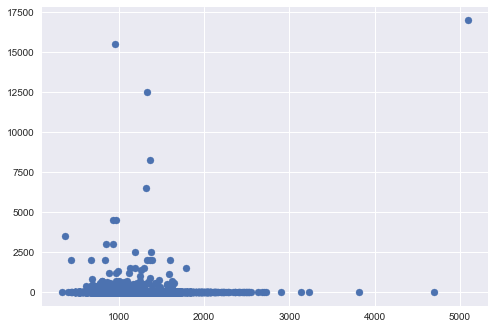

------------------------------------
1stFlrSF compared to MoSold
------------------------------------
Continous vs Continous
Correlation: 0.04014271646407904


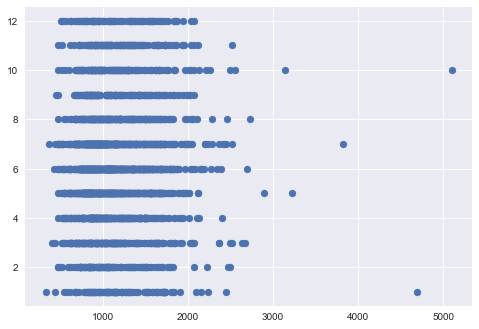

------------------------------------
1stFlrSF compared to Neighborhood
------------------------------------
Catagorical vs Continuous
F = 49.20126131526665
p = 1.7165133440922676e-194


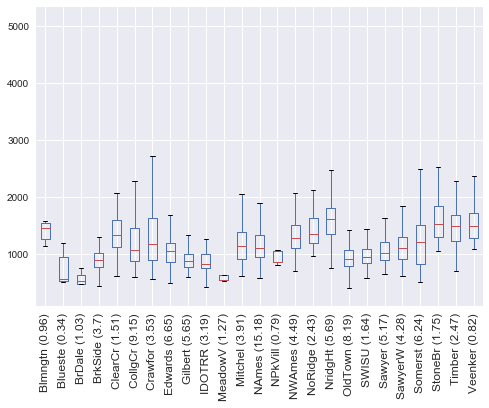

------------------------------------
1stFlrSF compared to OpenPorchSF
------------------------------------
Continous vs Continous
Correlation: 0.23850150195786296


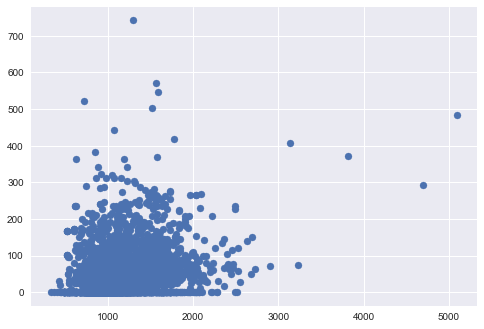

------------------------------------
1stFlrSF compared to OverallCond
------------------------------------
Continous vs Continous
Correlation: -0.15741821325645786


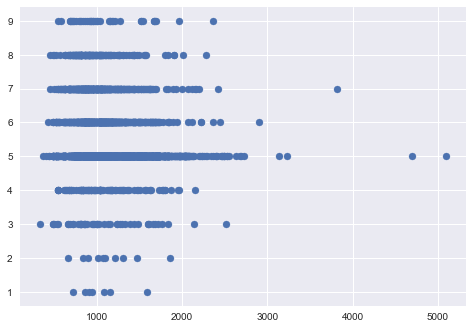

------------------------------------
1stFlrSF compared to OverallQual
------------------------------------
Continous vs Continous
Correlation: 0.4791519110433629


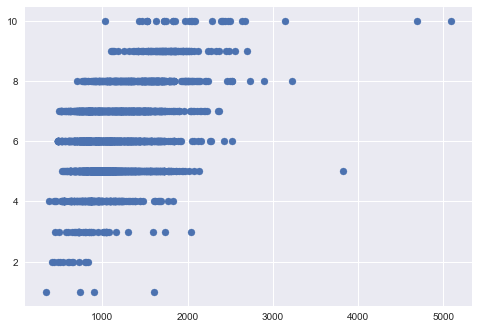

------------------------------------
1stFlrSF compared to PavedDrive
------------------------------------
Catagorical vs Continuous
F = 54.355736637898374
p = 6.652718844510868e-24


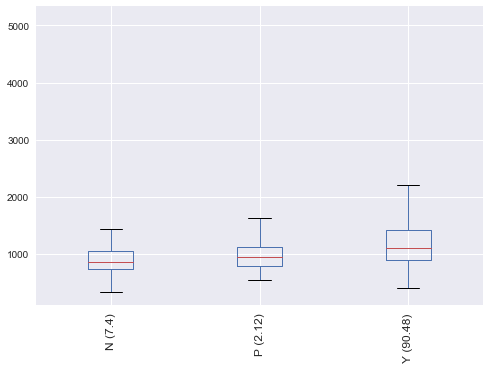

------------------------------------
1stFlrSF compared to PoolArea
------------------------------------
Continous vs Continous
Correlation: 0.12190043001656894


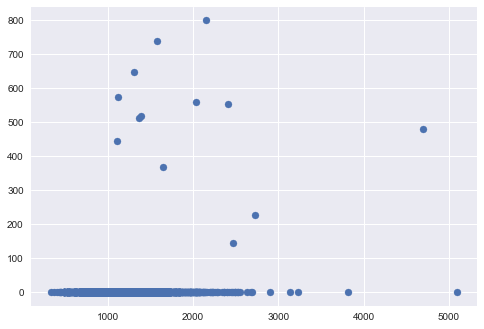

------------------------------------
1stFlrSF compared to PoolQC
------------------------------------
Catagorical vs Continuous
F = 0.610010519420313
p = 0.5698858689143473


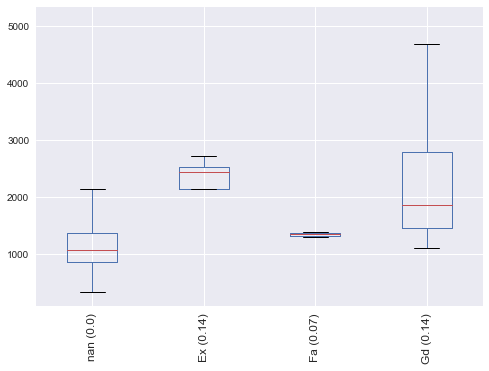

------------------------------------
1stFlrSF compared to RoofMatl
------------------------------------
Catagorical vs Continuous
F = 19.321809207014137
p = 2.0603396662961722e-25


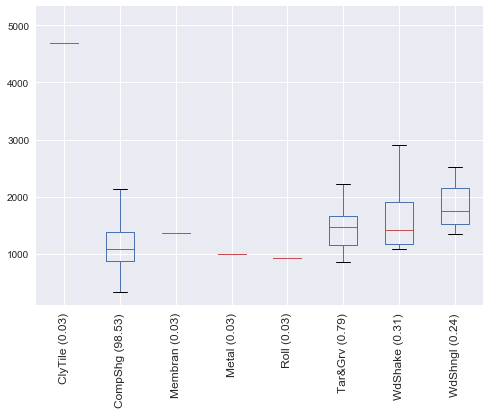

------------------------------------
1stFlrSF compared to RoofStyle
------------------------------------
Catagorical vs Continuous
F = 79.97803377940429
p = 7.552757253640941e-79


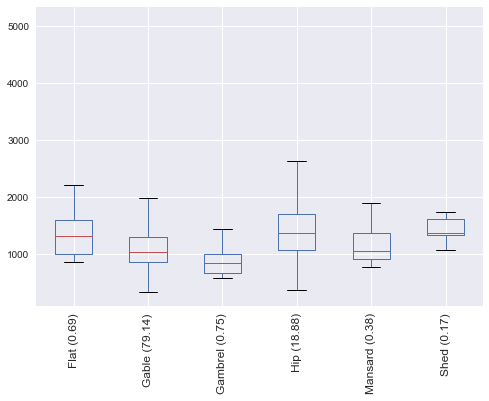

------------------------------------
1stFlrSF compared to SaleCondition
------------------------------------
Catagorical vs Continuous
F = 29.952387770243707
p = 8.963232924711454e-30


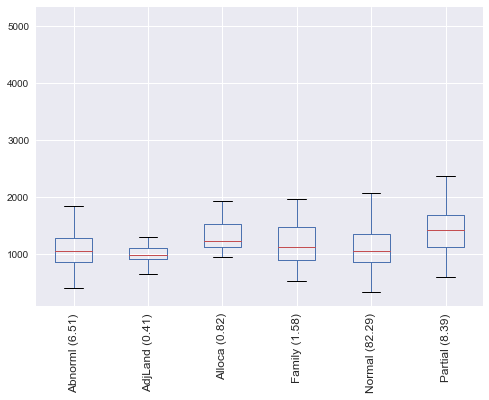

------------------------------------
1stFlrSF compared to SaleType
------------------------------------
Catagorical vs Continuous
F = 18.560961027841145
p = 2.1911400915531703e-27


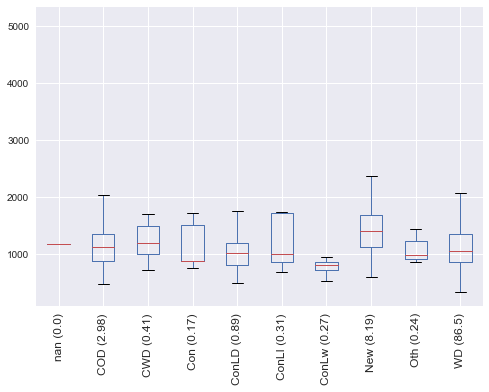

------------------------------------
1stFlrSF compared to ScreenPorch
------------------------------------
Continous vs Continous
Correlation: 0.09838082548744667


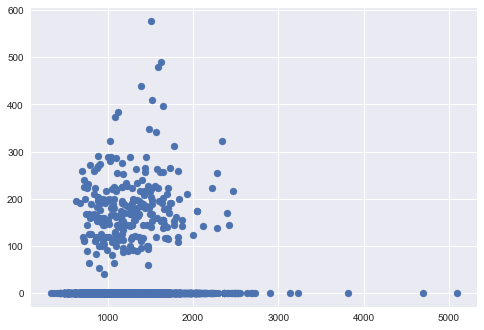

------------------------------------
1stFlrSF compared to Street
------------------------------------
Catagorical vs Continuous
F = 3.367285077795034
p = 0.06660503408484834


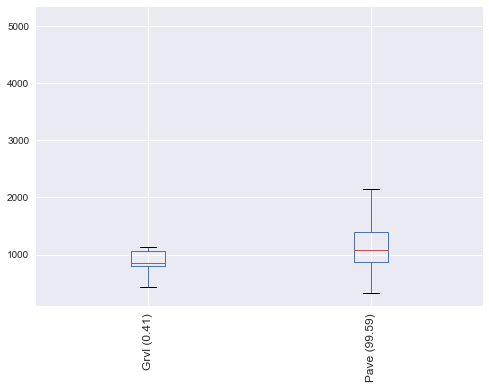

------------------------------------
1stFlrSF compared to TotRmsAbvGrd
------------------------------------
Continous vs Continous
Correlation: 0.3917823790432648


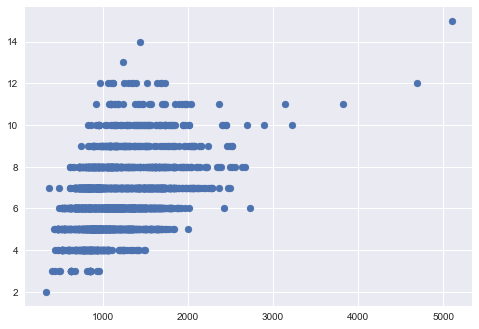

------------------------------------
1stFlrSF compared to TotalBsmtSF
------------------------------------
Continous vs Continous
Correlation: 0.8016699703092851


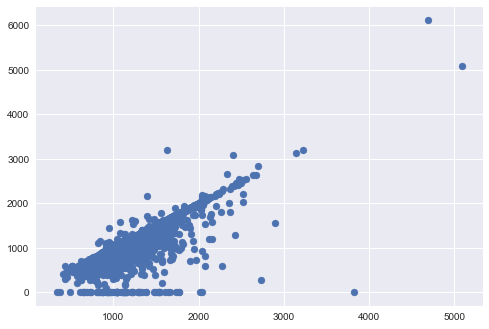

------------------------------------
1stFlrSF compared to Utilities
------------------------------------
Catagorical vs Continuous
F = 0.220864556949271
p = 0.6384171127010737


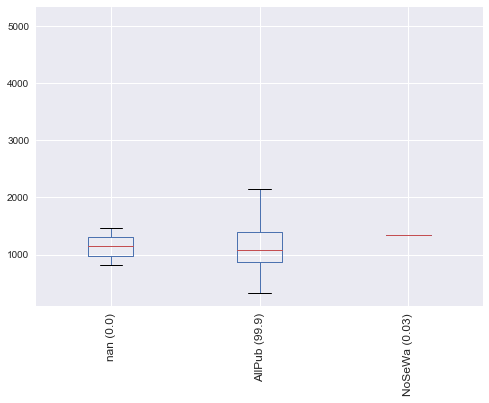

------------------------------------
1stFlrSF compared to WoodDeckSF
------------------------------------
Continous vs Continous
Correlation: 0.22734664102616145


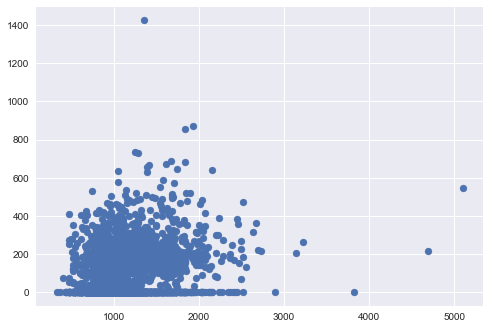

------------------------------------
1stFlrSF compared to YearBuilt
------------------------------------
Continous vs Continous
Correlation: 0.310813613090998


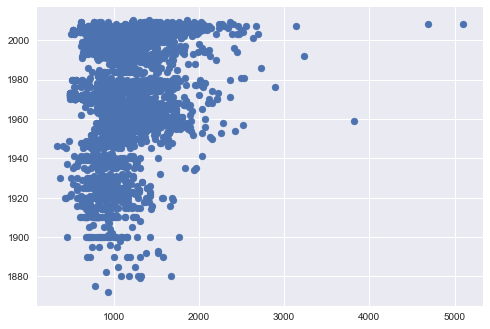

------------------------------------
1stFlrSF compared to YearRemodAdd
------------------------------------
Continous vs Continous
Correlation: 0.24224518177094106


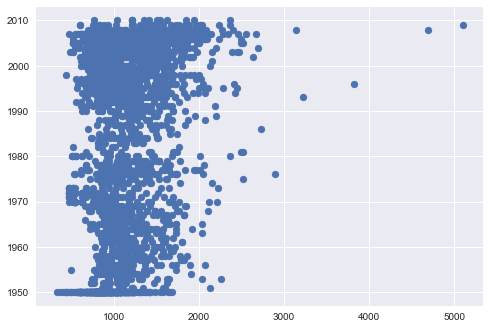

------------------------------------
1stFlrSF compared to YrSold
------------------------------------
Continous vs Continous
Correlation: -0.01344191820706379


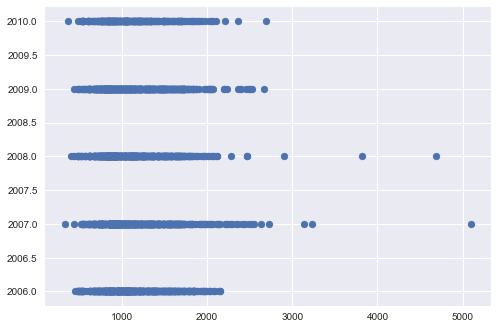

------------------------------------
2ndFlrSF compared to 3SsnPorch
------------------------------------
Continous vs Continous
Correlation: -0.03245815932049162


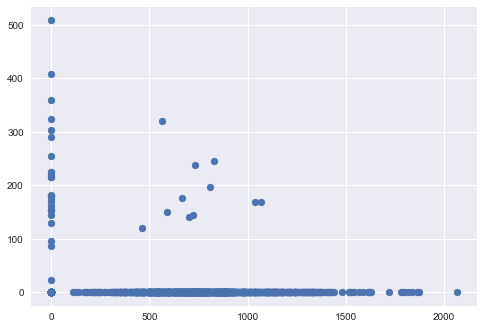

------------------------------------
2ndFlrSF compared to Alley
------------------------------------
Catagorical vs Continuous
F = 0.2926928920646706
p = 0.5891143492822017


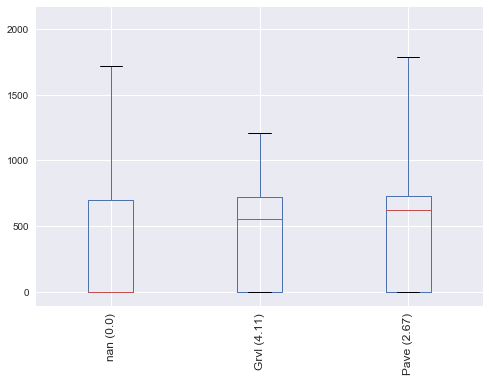

------------------------------------
2ndFlrSF compared to BedroomAbvGr
------------------------------------
Continous vs Continous
Correlation: 0.5035058542509893


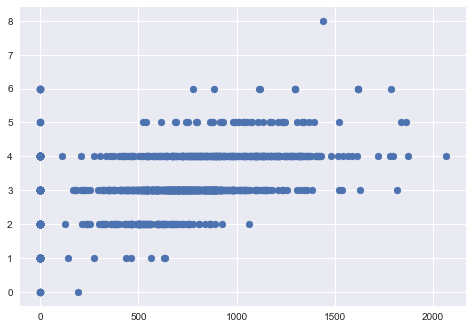

------------------------------------
2ndFlrSF compared to BldgType
------------------------------------
Catagorical vs Continuous
F = 14.932130961828678
p = 4.387143690265822e-12


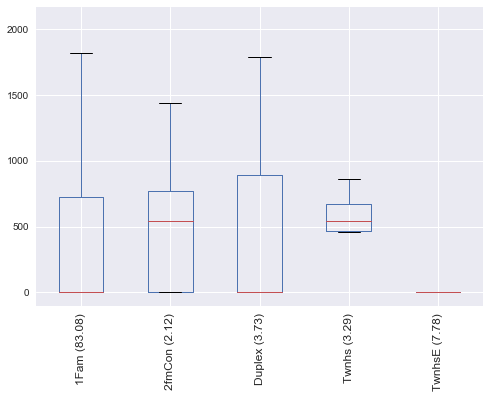

------------------------------------
2ndFlrSF compared to BsmtCond
------------------------------------
Catagorical vs Continuous
F = 1.6203163082231056
p = 0.18252318654512592


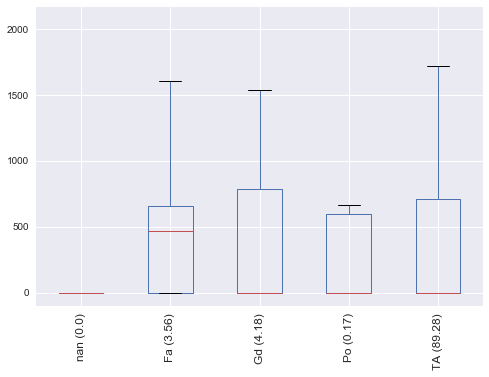

------------------------------------
2ndFlrSF compared to BsmtExposure
------------------------------------
Catagorical vs Continuous
F = 20.293522671775737
p = 5.207580583349256e-13


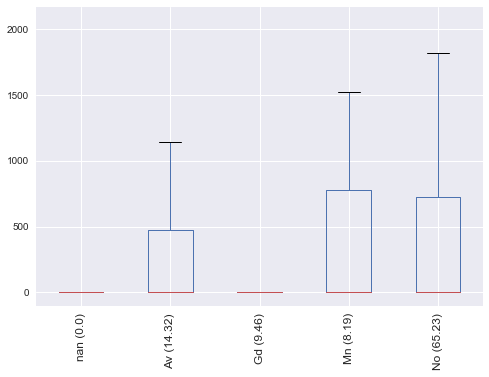

------------------------------------
2ndFlrSF compared to BsmtFinSF1
------------------------------------
Continous vs Continous
Correlation: -0.16230126887449386


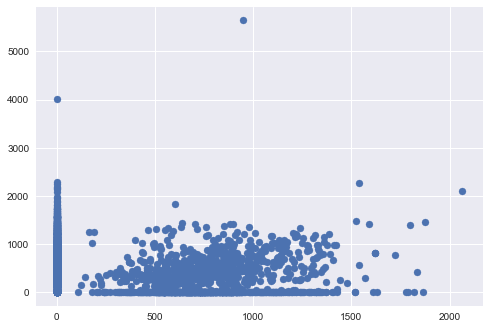

------------------------------------
2ndFlrSF compared to BsmtFinSF2
------------------------------------
Continous vs Continous
Correlation: -0.09774410955689224


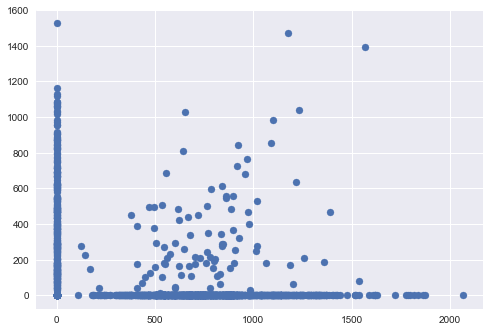

------------------------------------
2ndFlrSF compared to BsmtFinType1
------------------------------------
Catagorical vs Continuous
F = 23.827235065885475
p = 1.5219993754103436e-23


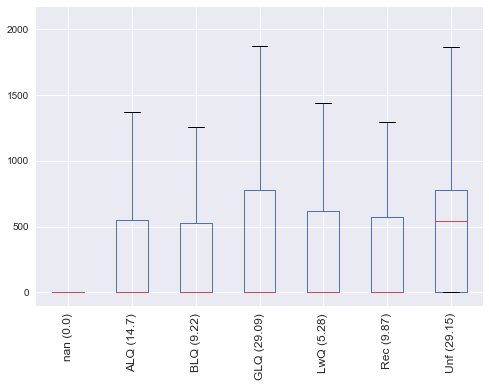

------------------------------------
2ndFlrSF compared to BsmtFinType2
------------------------------------
Catagorical vs Continuous
F = 8.43779886235939
p = 6.171104453489077e-08


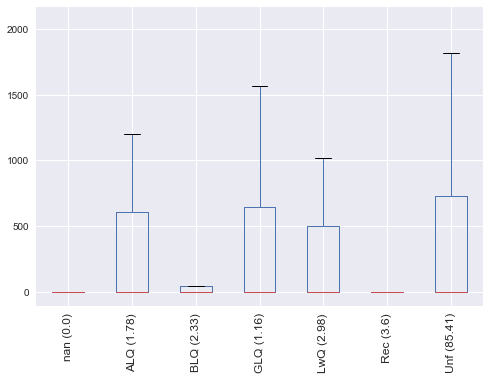

------------------------------------
2ndFlrSF compared to BsmtFullBath
------------------------------------
Continous vs Continous
Correlation: -0.16146805289086885


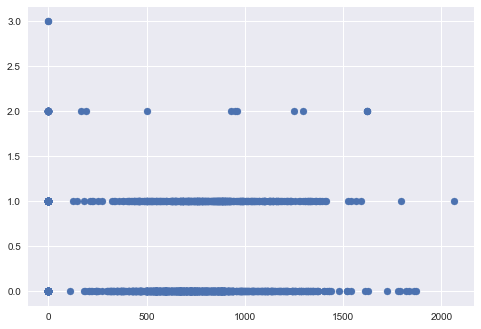

------------------------------------
2ndFlrSF compared to BsmtHalfBath
------------------------------------
Continous vs Continous
Correlation: -0.06028180847512409


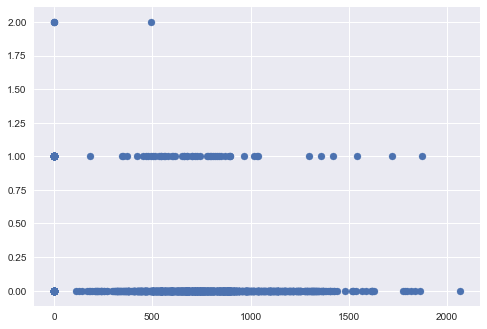

------------------------------------
2ndFlrSF compared to BsmtQual
------------------------------------
Catagorical vs Continuous
F = 23.758253426435534
p = 3.4946077706175572e-15


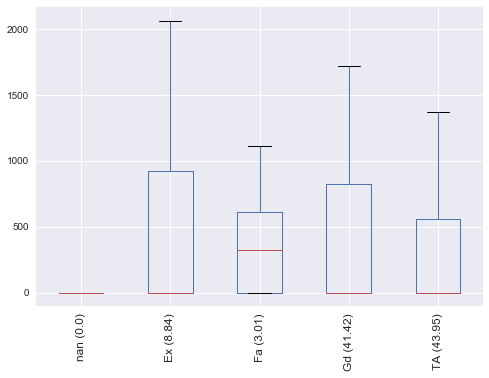

------------------------------------
2ndFlrSF compared to BsmtUnfSF
------------------------------------
Continous vs Continous
Correlation: -0.0003756420387986169


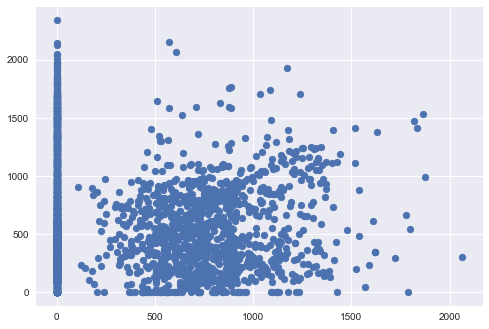

------------------------------------
2ndFlrSF compared to CentralAir
------------------------------------
Catagorical vs Continuous
F = 0.21493191866413616
p = 0.6429635664996667


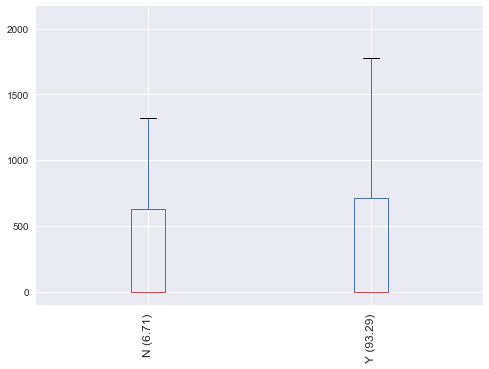

------------------------------------
2ndFlrSF compared to Condition1
------------------------------------
Catagorical vs Continuous
F = 3.076764088600867
p = 0.001862393538231786


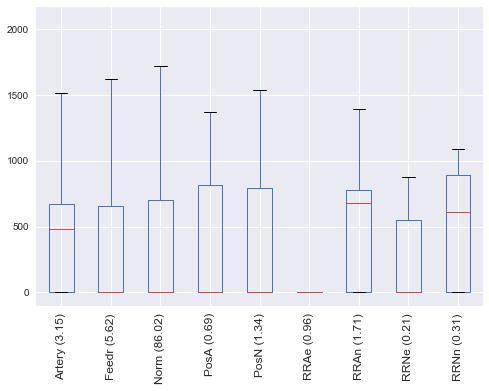

------------------------------------
2ndFlrSF compared to Condition2
------------------------------------
Catagorical vs Continuous
F = 0.9643545873484345
p = 0.45553217687702785


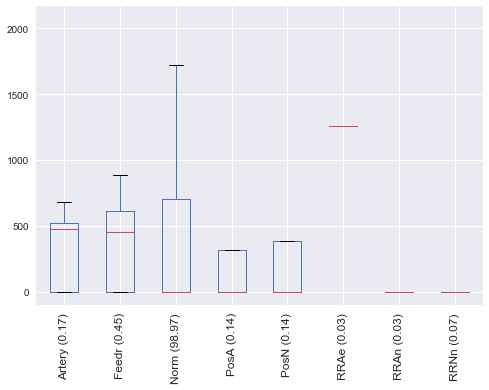

------------------------------------
2ndFlrSF compared to Electrical
------------------------------------
Catagorical vs Continuous
F = 1.2021411978539749
p = 0.30776136369067403


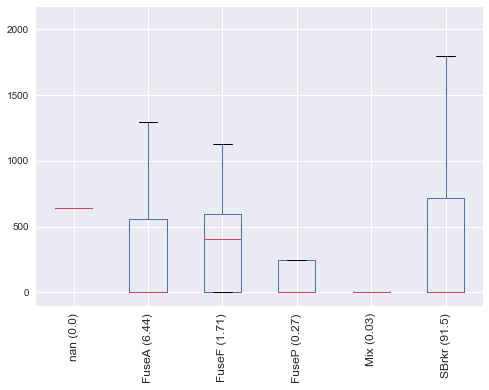

------------------------------------
2ndFlrSF compared to EnclosedPorch
------------------------------------
Continous vs Continous
Correlation: 0.05464549274429818


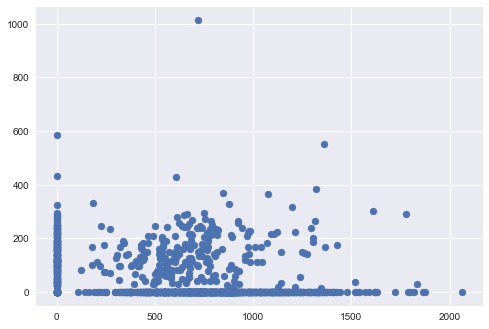

------------------------------------
2ndFlrSF compared to ExterCond
------------------------------------
Catagorical vs Continuous
F = 1.4025501160819274
p = 0.23050593775746334


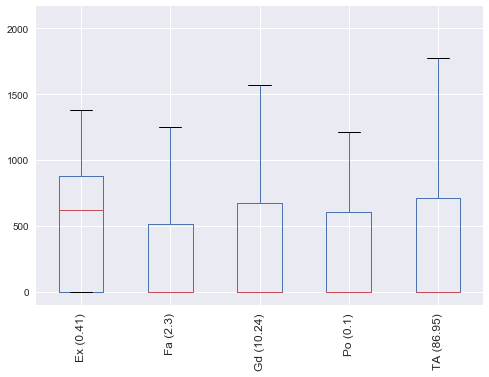

------------------------------------
2ndFlrSF compared to ExterQual
------------------------------------
Catagorical vs Continuous
F = 38.17864388248908
p = 3.4034350274602226e-24


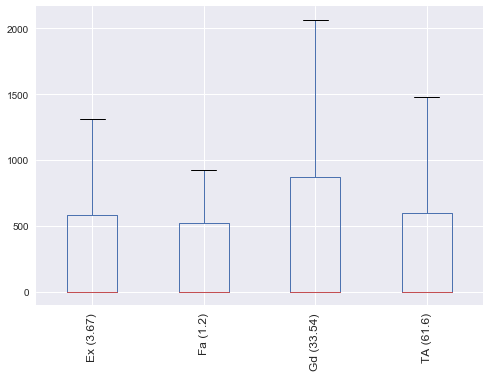

------------------------------------
2ndFlrSF compared to Exterior1st
------------------------------------
Catagorical vs Continuous
F = 6.515717131093016
p = 3.7930132810323326e-13


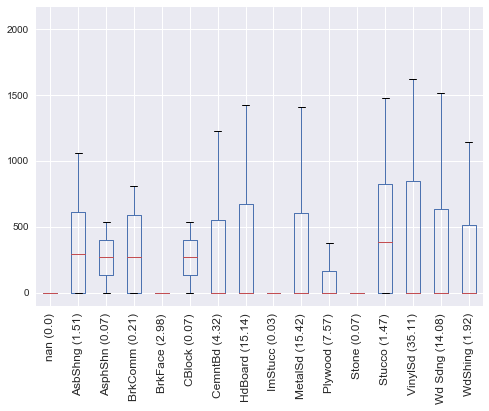

------------------------------------
2ndFlrSF compared to Exterior2nd
------------------------------------
Catagorical vs Continuous
F = 8.06858148714695
p = 3.1803300020303372e-18


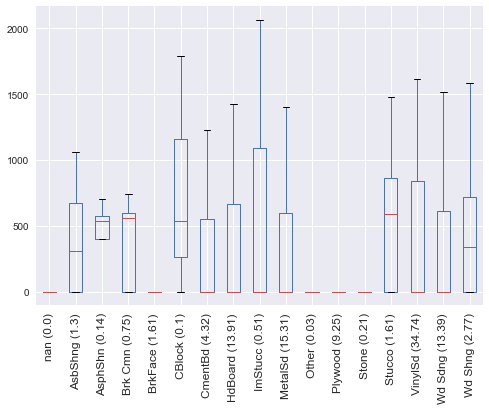

------------------------------------
2ndFlrSF compared to Fence
------------------------------------
Catagorical vs Continuous
F = 10.90154425477966
p = 5.699811134563885e-07


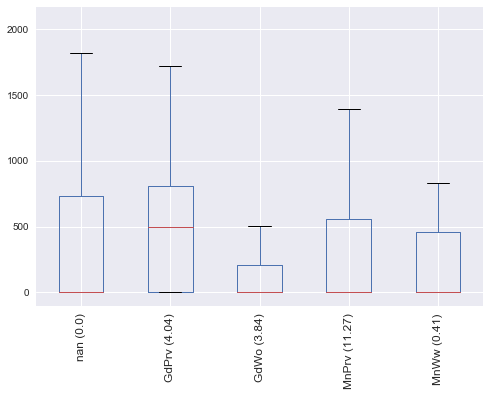

------------------------------------
2ndFlrSF compared to FireplaceQu
------------------------------------
Catagorical vs Continuous
F = 18.758833462493268
p = 4.6472434320926235e-15


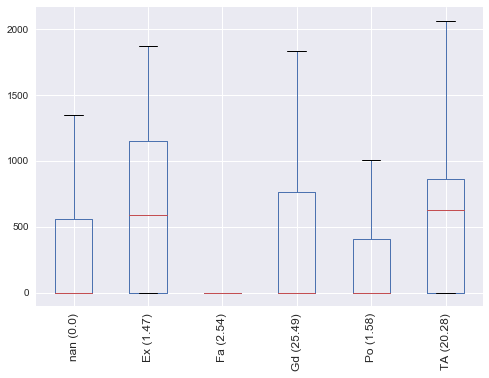

------------------------------------
2ndFlrSF compared to Fireplaces
------------------------------------
Continous vs Continous
Correlation: 0.16999125494502942


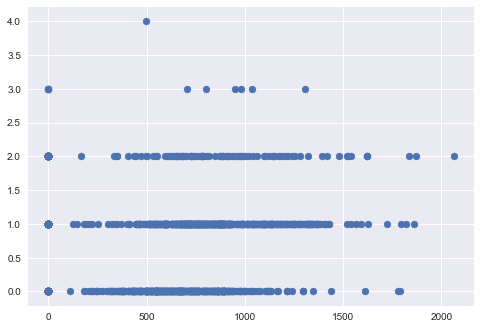

------------------------------------
2ndFlrSF compared to Foundation
------------------------------------
Catagorical vs Continuous
F = 43.766841855180175
p = 1.1893662230821246e-43


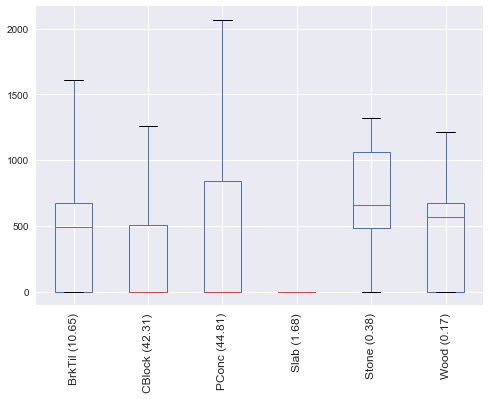

------------------------------------
2ndFlrSF compared to FullBath
------------------------------------
Continous vs Continous
Correlation: 0.4028652993621982


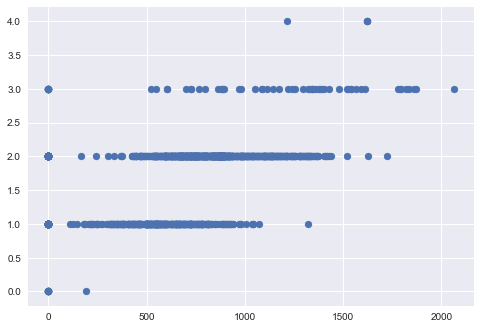

------------------------------------
2ndFlrSF compared to Functional
------------------------------------
Catagorical vs Continuous
F = 3.4402867116748905
p = 0.002179356079217599


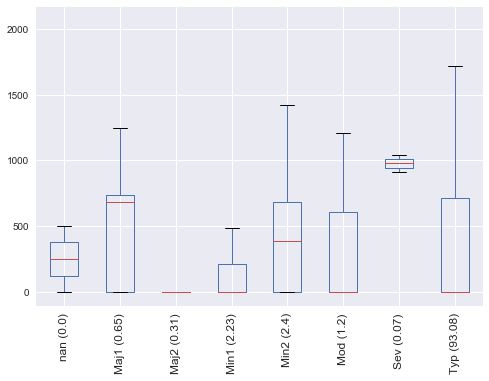

------------------------------------
2ndFlrSF compared to GarageArea
------------------------------------
Continous vs Continous
Correlation: 0.1285698950332599


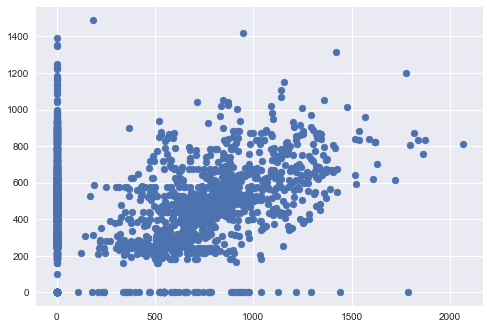

------------------------------------
2ndFlrSF compared to GarageCars
------------------------------------
Continous vs Continous
Correlation: 0.18245193294099138


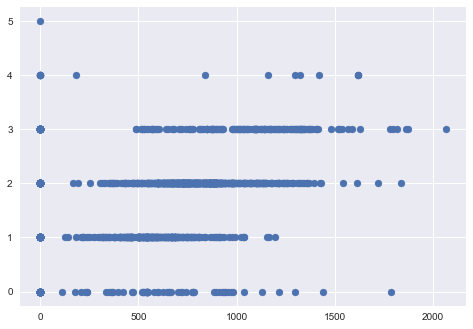

------------------------------------
2ndFlrSF compared to GarageCond
------------------------------------
Catagorical vs Continuous
F = 0.8458952176099268
p = 0.4959316927441343


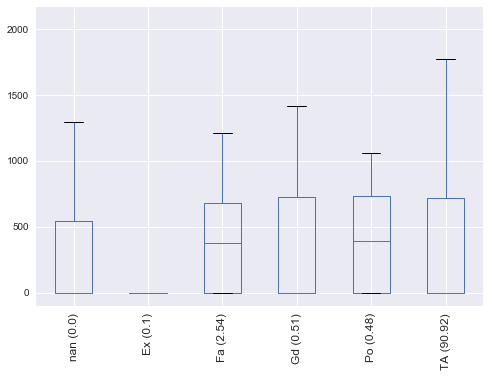

------------------------------------
2ndFlrSF compared to GarageFinish
------------------------------------
Catagorical vs Continuous
F = 26.286774747020196
p = 4.912278004448147e-12


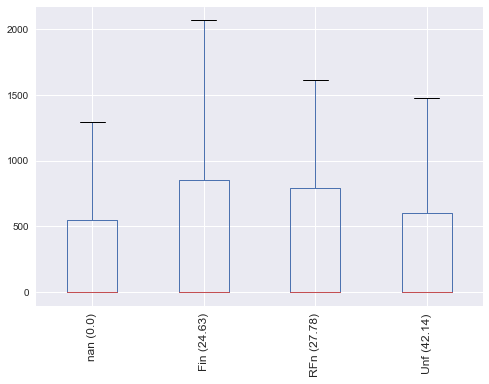

------------------------------------
2ndFlrSF compared to GarageQual
------------------------------------
Catagorical vs Continuous
F = 0.5826174598545633
p = 0.6752525953596922


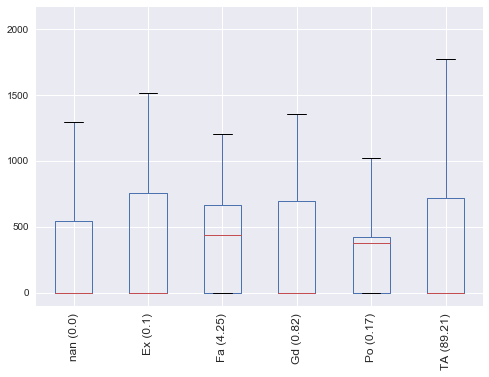

------------------------------------
2ndFlrSF compared to GarageType
------------------------------------
Catagorical vs Continuous
F = 102.09086553760469
p = 4.8574837208647155e-99


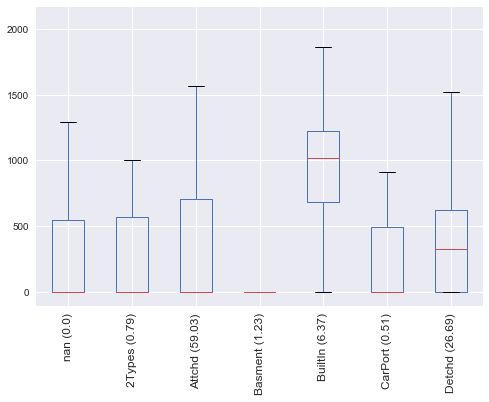

------------------------------------
2ndFlrSF compared to GarageYrBlt
------------------------------------
Continous vs Continous
Correlation: 0.08609427628849597


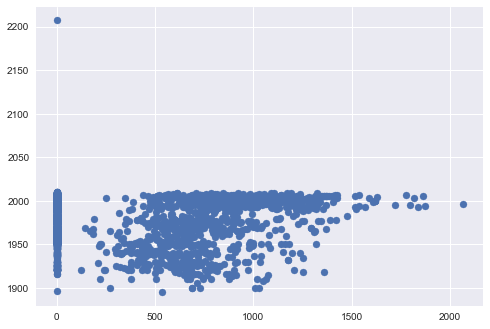

------------------------------------
2ndFlrSF compared to GrLivArea
------------------------------------
Continous vs Continous
Correlation: 0.65508469354363


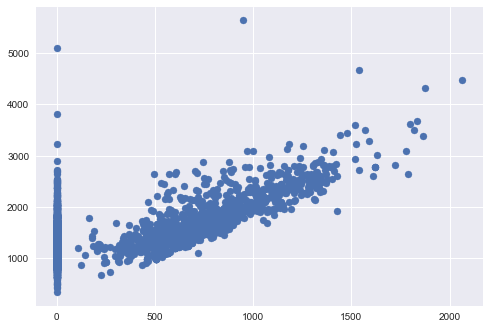

------------------------------------
2ndFlrSF compared to HalfBath
------------------------------------
Continous vs Continous
Correlation: 0.6113620053965524


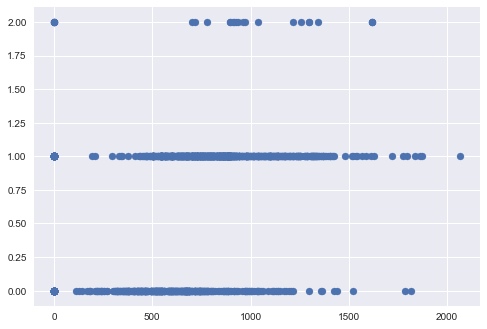

------------------------------------
2ndFlrSF compared to Heating
------------------------------------
Catagorical vs Continuous
F = 3.7827915122722686
p = 0.0020388147196317603


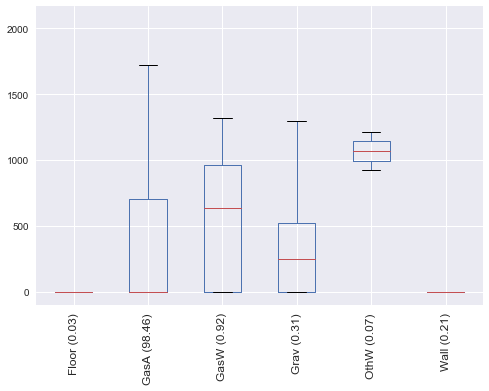

------------------------------------
2ndFlrSF compared to HeatingQC
------------------------------------
Catagorical vs Continuous
F = 21.792979277853657
p = 9.66396413800969e-18


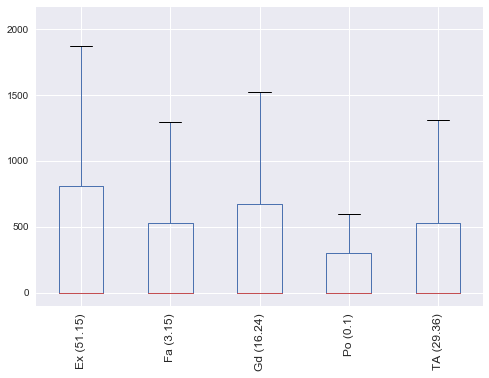

------------------------------------
2ndFlrSF compared to HouseStyle
------------------------------------
Catagorical vs Continuous
F = 2107.40655852187
p = 0.0


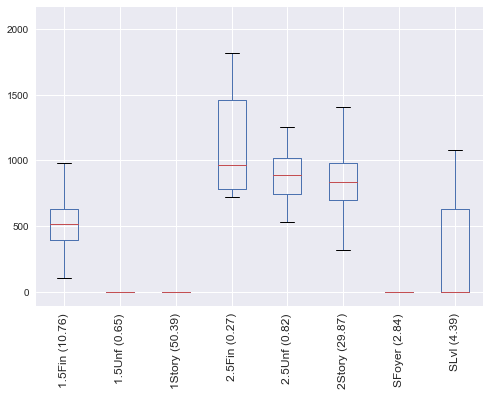

------------------------------------
2ndFlrSF compared to Id
------------------------------------
Continous vs Continous
Correlation: -0.02225187621553263


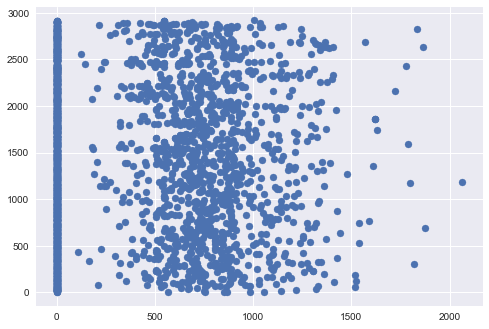

------------------------------------
2ndFlrSF compared to KitchenAbvGr
------------------------------------
Continous vs Continous
Correlation: 0.06903241865922898


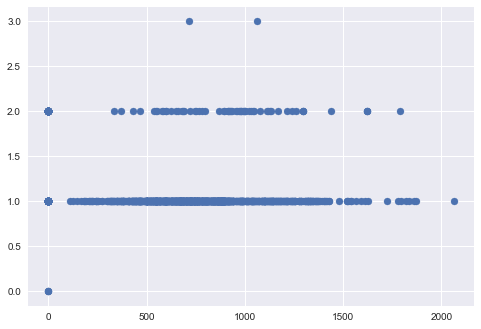

------------------------------------
2ndFlrSF compared to KitchenQual
------------------------------------
Catagorical vs Continuous
F = 30.410062832752743
p = 2.3632393902701695e-19


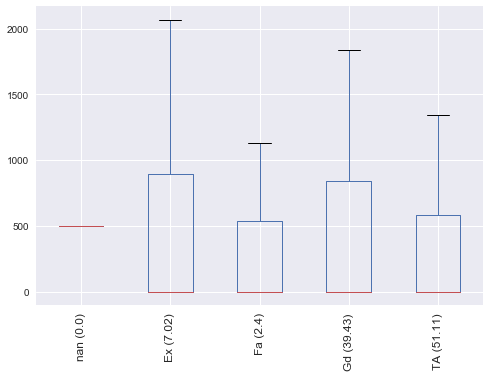

------------------------------------
2ndFlrSF compared to LandContour
------------------------------------
Catagorical vs Continuous
F = 3.3405650114913255
p = 0.018513315449561946


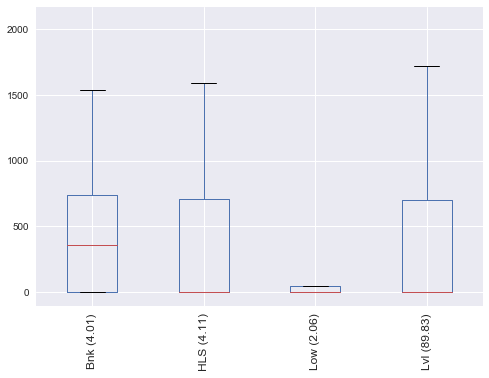

------------------------------------
2ndFlrSF compared to LandSlope
------------------------------------
Catagorical vs Continuous
F = 1.885553290992991
p = 0.15193004434696614


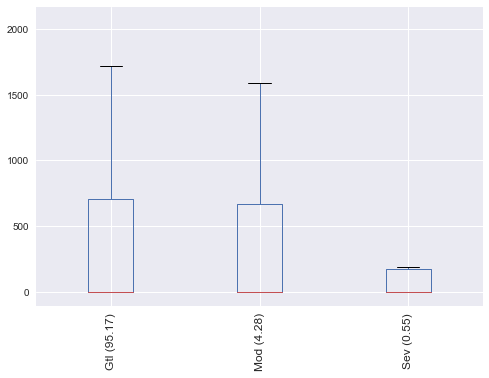

------------------------------------
2ndFlrSF compared to LotArea
------------------------------------
Continous vs Continous
Correlation: 0.03151470381458213


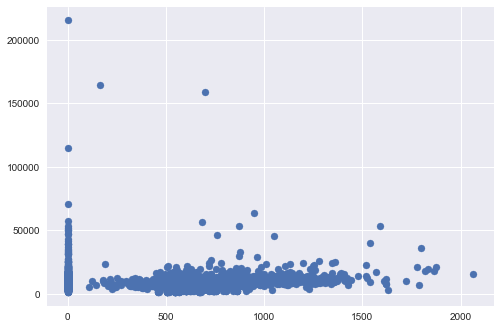

------------------------------------
2ndFlrSF compared to LotConfig
------------------------------------
Catagorical vs Continuous
F = 0.5499298040893423
p = 0.6990944908429506


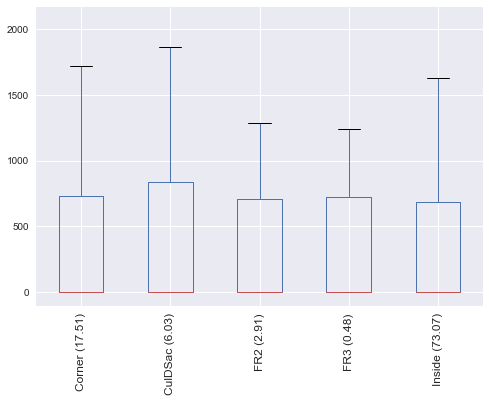

------------------------------------
2ndFlrSF compared to LotFrontage
------------------------------------
Continous vs Continous
Correlation: 0.026544746540630434


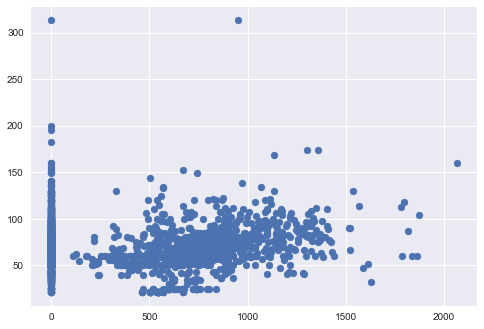

------------------------------------
2ndFlrSF compared to LotShape
------------------------------------
Catagorical vs Continuous
F = 7.897653531785988
p = 3.0256395557521094e-05


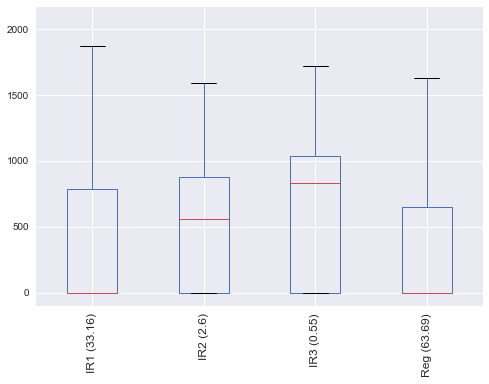

------------------------------------
2ndFlrSF compared to LowQualFinSF
------------------------------------
Continous vs Continous
Correlation: 0.017803133508385662


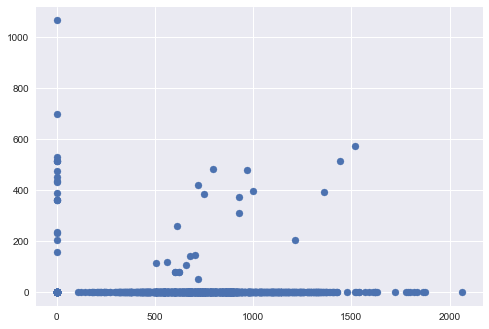

------------------------------------
2ndFlrSF compared to MSSubClass
------------------------------------
Continous vs Continous
Correlation: 0.30930910691510555


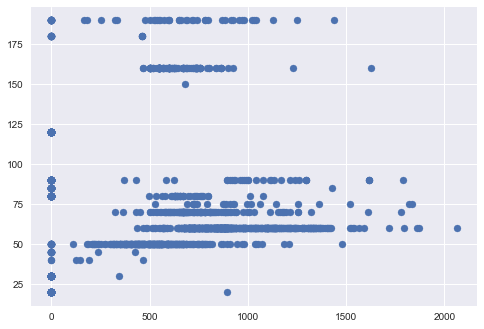

------------------------------------
2ndFlrSF compared to MSZoning
------------------------------------
Catagorical vs Continuous
F = 10.31099615879076
p = 2.728506428092196e-08


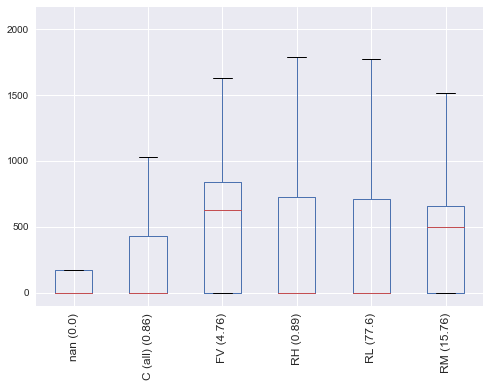

------------------------------------
2ndFlrSF compared to MasVnrArea
------------------------------------
Continous vs Continous
Correlation: 0.1210138367788261


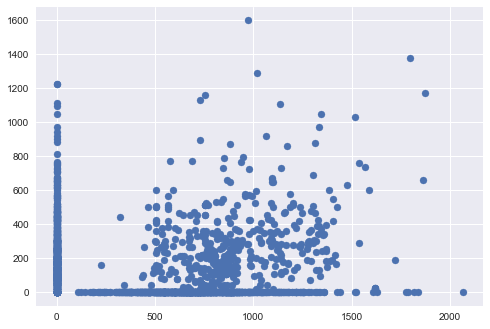

------------------------------------
2ndFlrSF compared to MasVnrType
------------------------------------
Catagorical vs Continuous
F = 6.23698045360207
p = 0.00032235401573133926


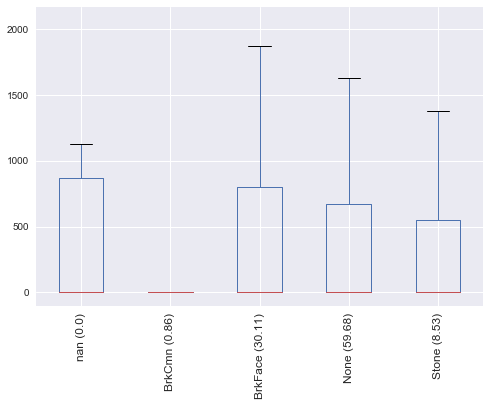

------------------------------------
2ndFlrSF compared to MiscFeature
------------------------------------
Catagorical vs Continuous
F = 2.1954065990126868
p = 0.09321197433425309


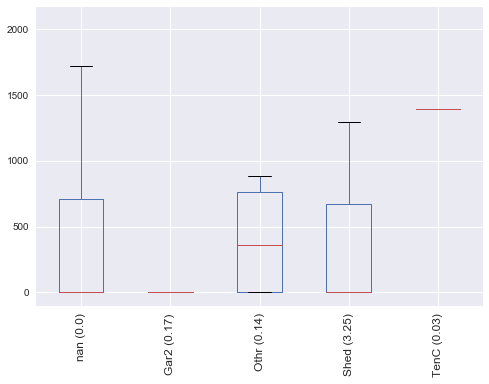

------------------------------------
2ndFlrSF compared to MiscVal
------------------------------------
Continous vs Continous
Correlation: -0.005298818251119218


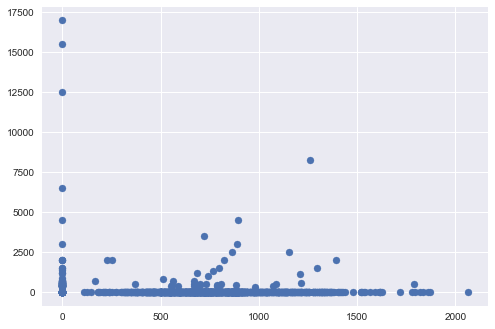

------------------------------------
2ndFlrSF compared to MoSold
------------------------------------
Continous vs Continous
Correlation: 0.014184819151718224


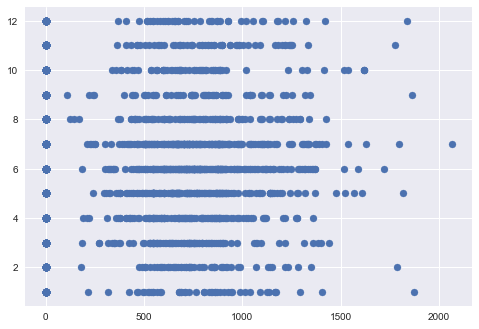

------------------------------------
2ndFlrSF compared to Neighborhood
------------------------------------
Catagorical vs Continuous
F = 30.393654851241052
p = 1.898612732659334e-122


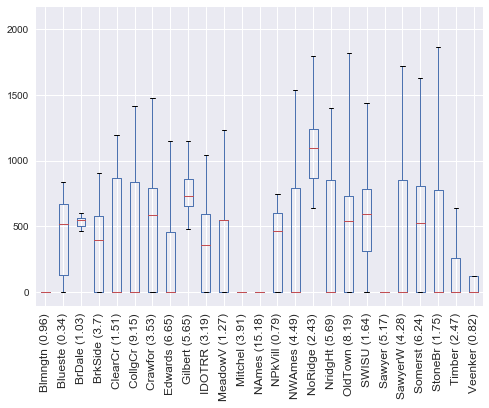

------------------------------------
2ndFlrSF compared to OpenPorchSF
------------------------------------
Continous vs Continous
Correlation: 0.18538710979335554


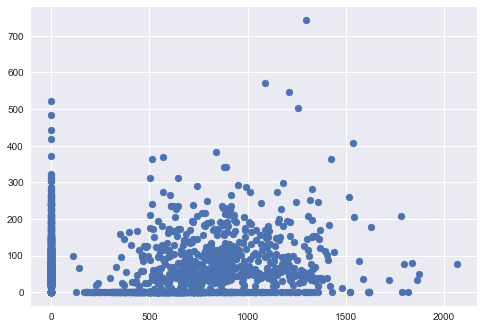

------------------------------------
2ndFlrSF compared to OverallCond
------------------------------------
Continous vs Continous
Correlation: 0.0054936962640809595


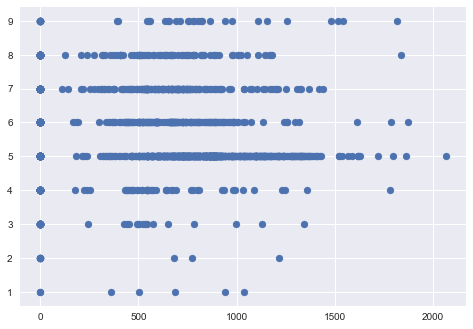

------------------------------------
2ndFlrSF compared to OverallQual
------------------------------------
Continous vs Continous
Correlation: 0.24559613114771683


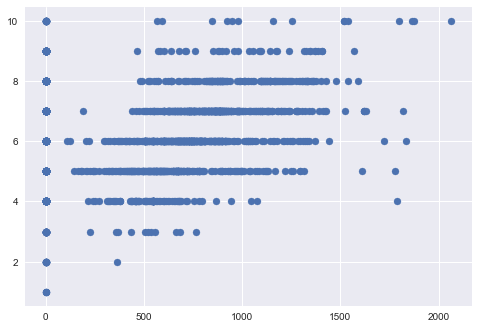

------------------------------------
2ndFlrSF compared to PavedDrive
------------------------------------
Catagorical vs Continuous
F = 0.44065888175148543
p = 0.6436550687756805


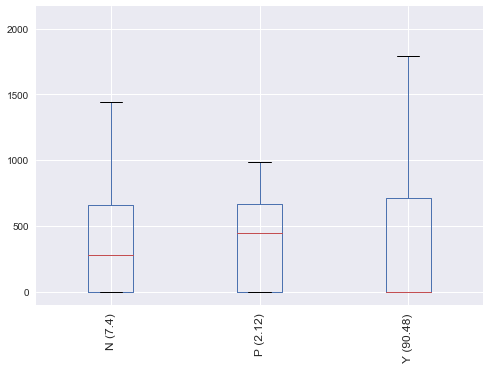

------------------------------------
2ndFlrSF compared to PoolArea
------------------------------------
Continous vs Continous
Correlation: 0.04450348385671064


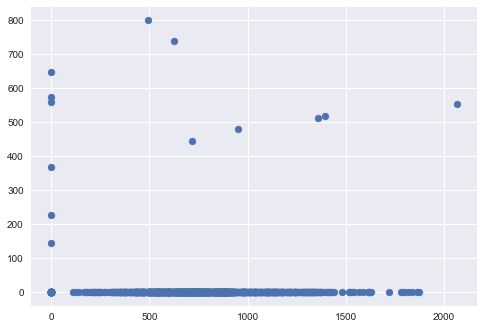

------------------------------------
2ndFlrSF compared to PoolQC
------------------------------------
Catagorical vs Continuous
F = 0.17381519496424352
p = 0.8439711166823703


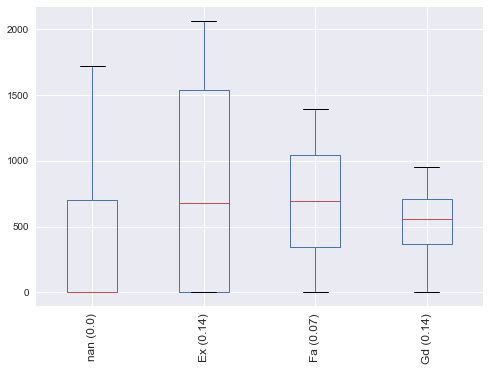

------------------------------------
2ndFlrSF compared to RoofMatl
------------------------------------
Catagorical vs Continuous
F = 1.8258803575678706
p = 0.07806812401233813


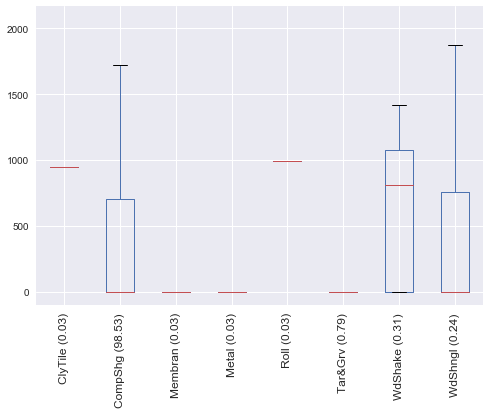

------------------------------------
2ndFlrSF compared to RoofStyle
------------------------------------
Catagorical vs Continuous
F = 15.219936272030436
p = 8.609375216321103e-15


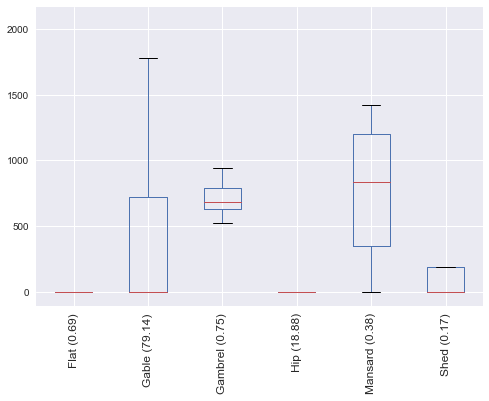

------------------------------------
2ndFlrSF compared to SaleCondition
------------------------------------
Catagorical vs Continuous
F = 1.0077774398311607
p = 0.4113661566721041


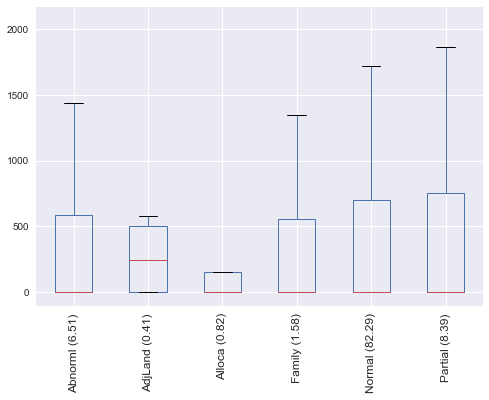

------------------------------------
2ndFlrSF compared to SaleType
------------------------------------
Catagorical vs Continuous
F = 2.5398793297088367
p = 0.009363952112528516


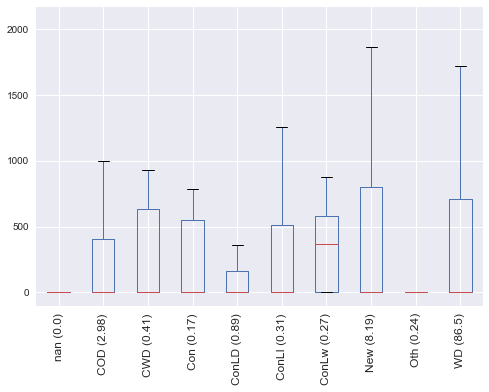

------------------------------------
2ndFlrSF compared to ScreenPorch
------------------------------------
Continous vs Continous
Correlation: 0.011070418582606843


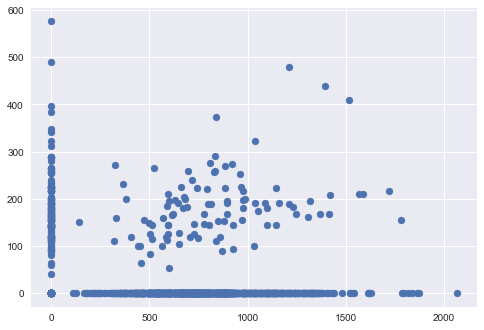

------------------------------------
2ndFlrSF compared to Street
------------------------------------
Catagorical vs Continuous
F = 4.320720188669554
p = 0.03773819278831211


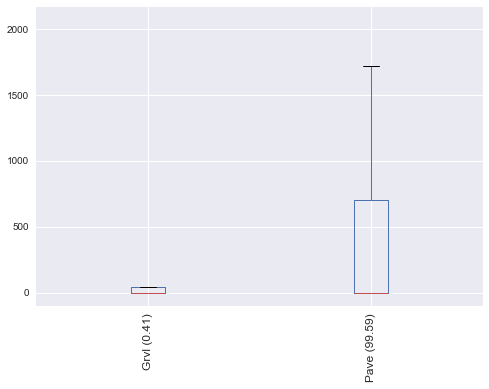

------------------------------------
2ndFlrSF compared to TotRmsAbvGrd
------------------------------------
Continous vs Continous
Correlation: 0.5845858776773477


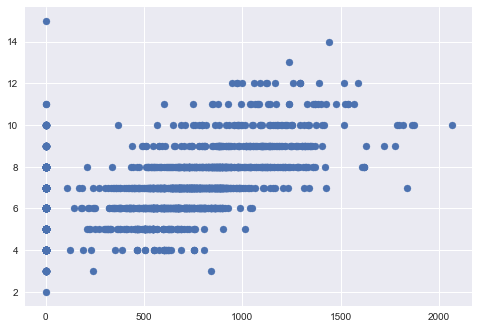

------------------------------------
2ndFlrSF compared to TotalBsmtSF
------------------------------------
Continous vs Continous
Correlation: -0.20566496719724894


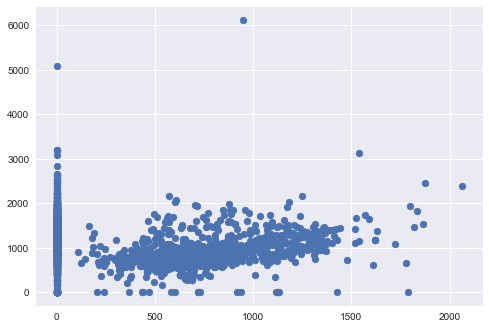

------------------------------------
2ndFlrSF compared to Utilities
------------------------------------
Catagorical vs Continuous
F = 0.6168664723564323
p = 0.4322779441318262


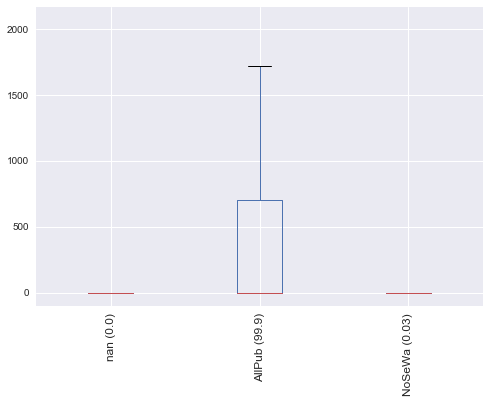

------------------------------------
2ndFlrSF compared to WoodDeckSF
------------------------------------
Continous vs Continous
Correlation: 0.08992229362937773


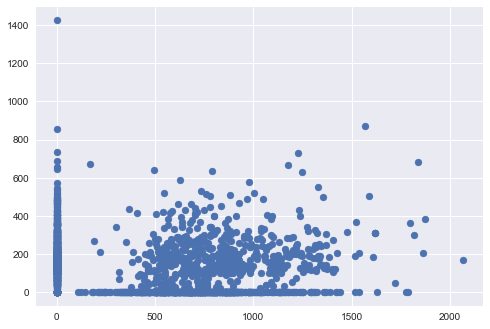

------------------------------------
2ndFlrSF compared to YearBuilt
------------------------------------
Continous vs Continous
Correlation: 0.017587668433174865


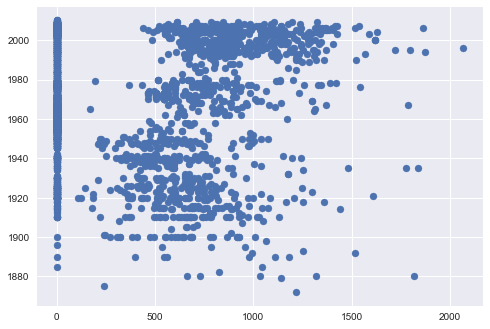

------------------------------------
2ndFlrSF compared to YearRemodAdd
------------------------------------
Continous vs Continous
Correlation: 0.1589852604557147


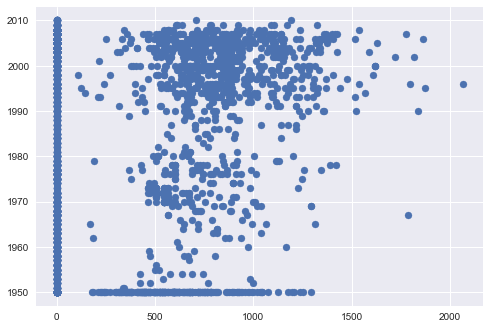

------------------------------------
2ndFlrSF compared to YrSold
------------------------------------
Continous vs Continous
Correlation: -0.019228688248967146


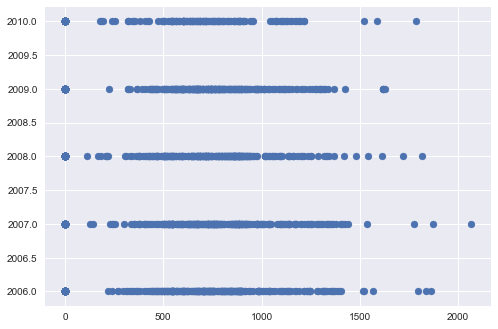

------------------------------------
3SsnPorch compared to Alley
------------------------------------
Catagorical vs Continuous
F = 1.5426997245179064
p = 0.21570053392357985


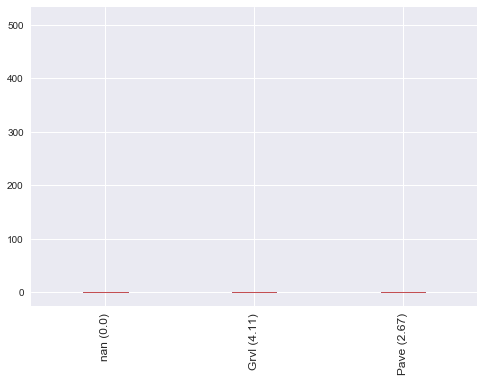

------------------------------------
3SsnPorch compared to BedroomAbvGr
------------------------------------
Continous vs Continous
Correlation: -0.04827870717148935


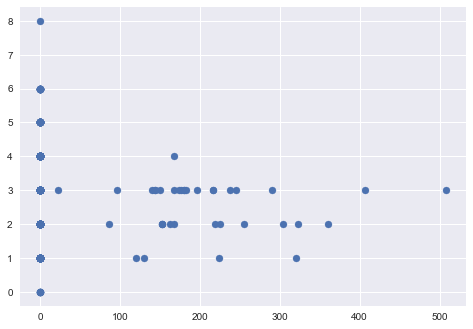

------------------------------------
3SsnPorch compared to BldgType
------------------------------------
Catagorical vs Continuous
F = 0.5745407715719079
p = 0.6811249269748547


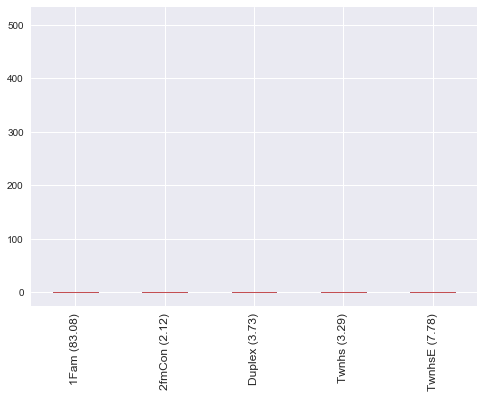

------------------------------------
3SsnPorch compared to BsmtCond
------------------------------------
Catagorical vs Continuous
F = 16.030690155289964
p = 2.4704888939275354e-10


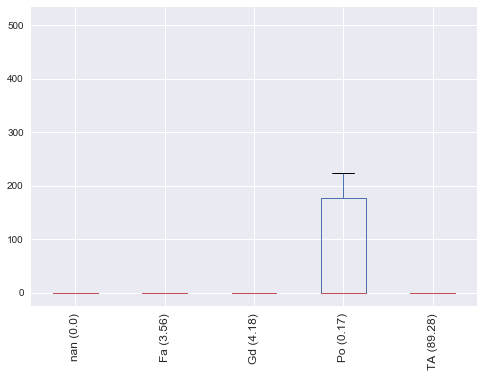

------------------------------------
3SsnPorch compared to BsmtExposure
------------------------------------
Catagorical vs Continuous
F = 1.334049048322305
p = 0.2614610449745443


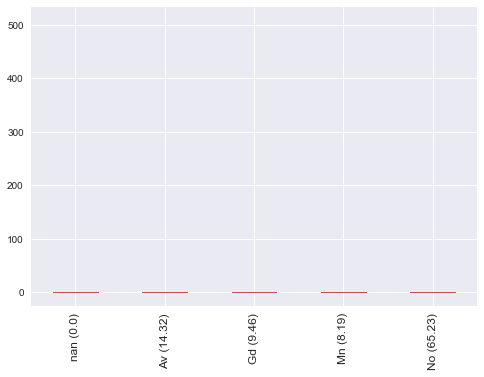

------------------------------------
3SsnPorch compared to BsmtFinSF1
------------------------------------
Continous vs Continous
Correlation: 0.050908430152998764


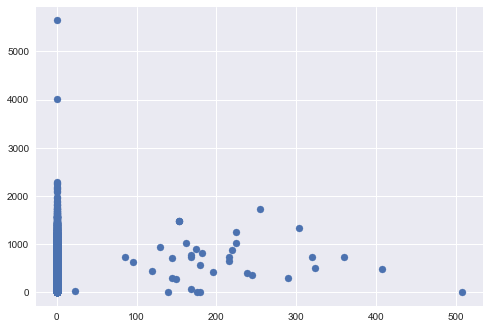

------------------------------------
3SsnPorch compared to BsmtFinSF2
------------------------------------
Continous vs Continous
Correlation: -0.023278728868326114


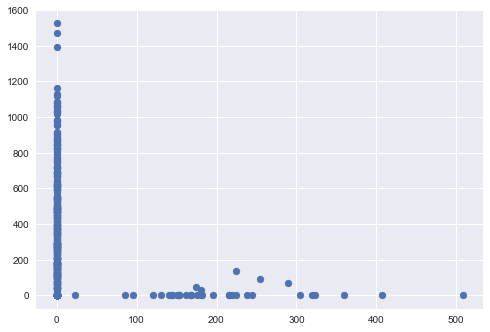

------------------------------------
3SsnPorch compared to BsmtFinType1
------------------------------------
Catagorical vs Continuous
F = 1.6558026245615396
p = 0.14190311802245706


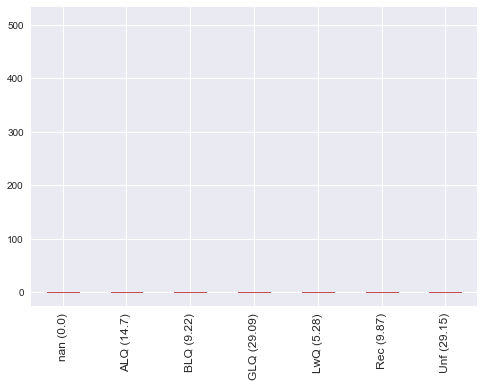

------------------------------------
3SsnPorch compared to BsmtFinType2
------------------------------------
Catagorical vs Continuous
F = 0.8988809113168428
p = 0.48079105940107936


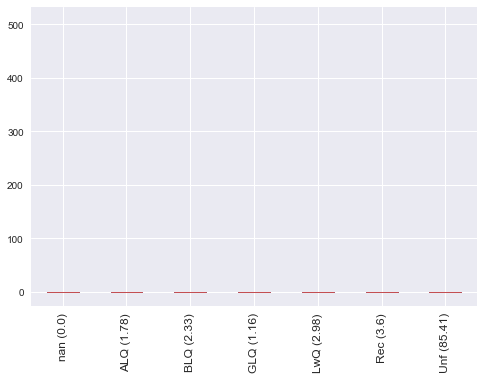

------------------------------------
3SsnPorch compared to BsmtFullBath
------------------------------------
Continous vs Continous
Correlation: 0.02737773251148986


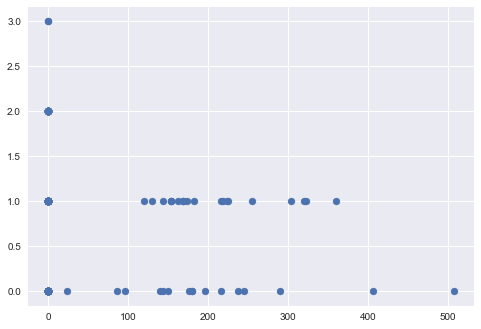

------------------------------------
3SsnPorch compared to BsmtHalfBath
------------------------------------
Continous vs Continous
Correlation: 0.026860689142608724


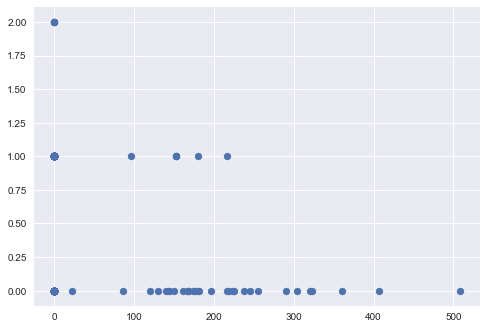

------------------------------------
3SsnPorch compared to BsmtQual
------------------------------------
Catagorical vs Continuous
F = 0.2980695748382077
p = 0.8268211267314656


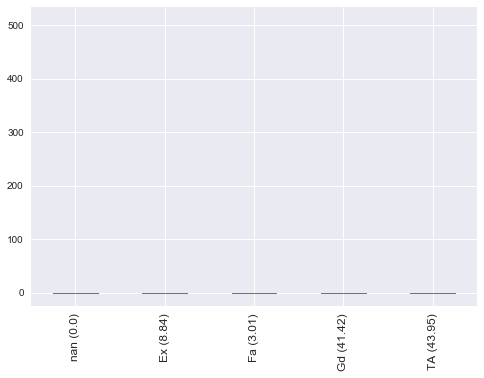

------------------------------------
3SsnPorch compared to BsmtUnfSF
------------------------------------
Continous vs Continous
Correlation: -0.005810471797075944


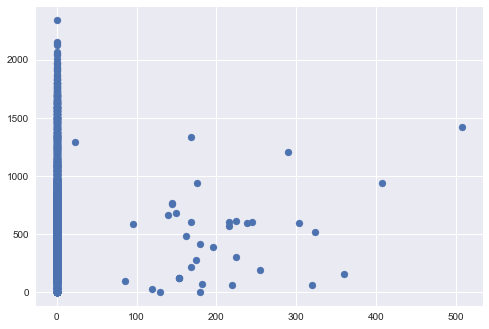

------------------------------------
3SsnPorch compared to CentralAir
------------------------------------
Catagorical vs Continuous
F = 2.2435516942478233
p = 0.1342806794000858


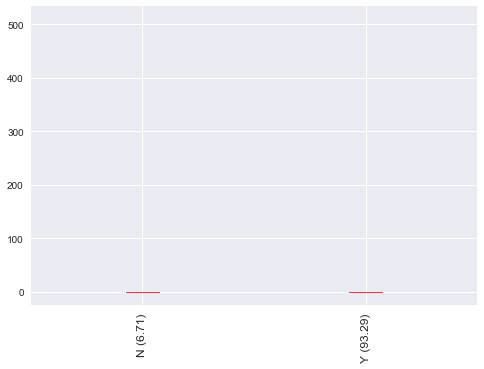

------------------------------------
3SsnPorch compared to Condition1
------------------------------------
Catagorical vs Continuous
F = 3.1614434375322706
p = 0.001433140050615667


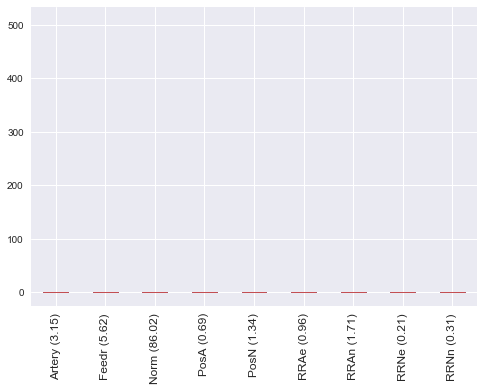

------------------------------------
3SsnPorch compared to Condition2
------------------------------------
Catagorical vs Continuous
F = 0.046112997545725266
p = 0.9998715261109199


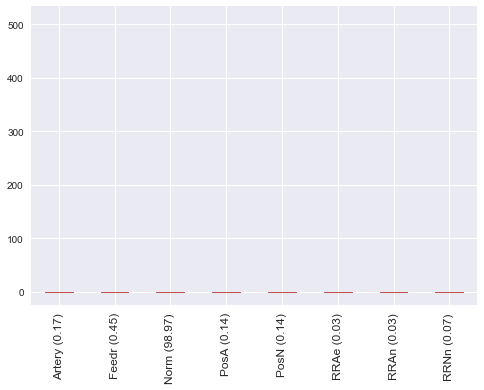

------------------------------------
3SsnPorch compared to Electrical
------------------------------------
Catagorical vs Continuous
F = 0.16201034708721365
p = 0.9575608562063214


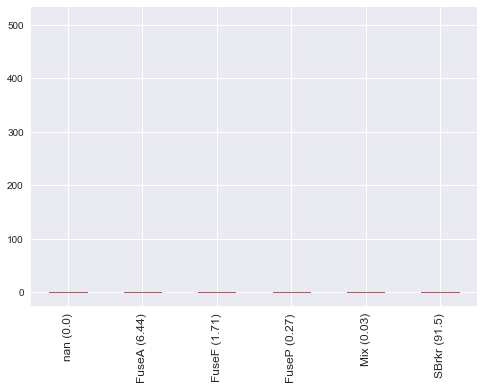

------------------------------------
3SsnPorch compared to EnclosedPorch
------------------------------------
Continous vs Continous
Correlation: -0.03282218692175518


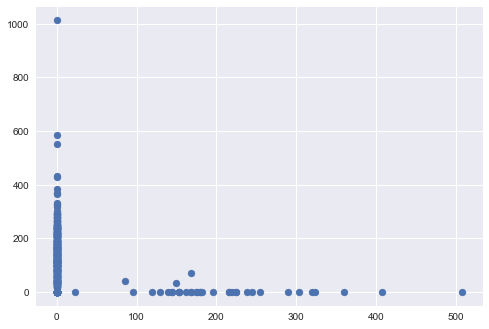

------------------------------------
3SsnPorch compared to ExterCond
------------------------------------
Catagorical vs Continuous
F = 1.4530067195806582
p = 0.2139347964723542


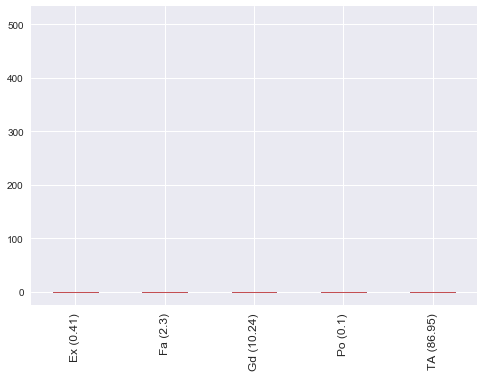

------------------------------------
3SsnPorch compared to ExterQual
------------------------------------
Catagorical vs Continuous
F = 2.7910150542364476
p = 0.03908532972816585


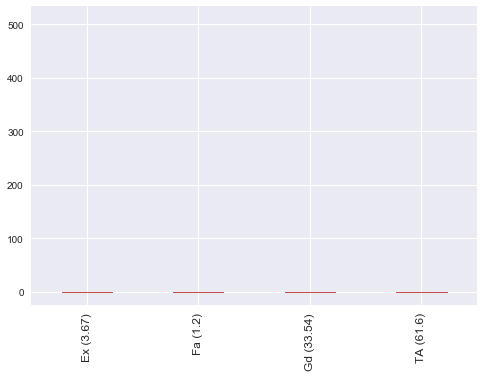

------------------------------------
3SsnPorch compared to Exterior1st
------------------------------------
Catagorical vs Continuous
F = 0.7533102772570726
p = 0.7210473977768304


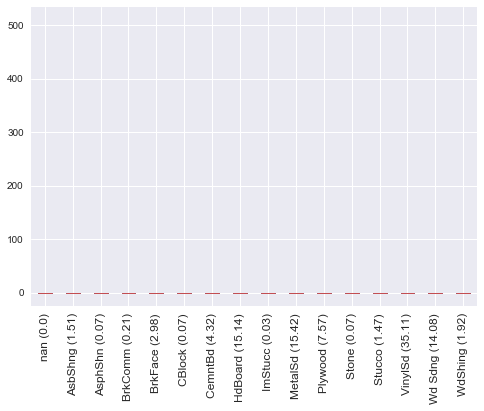

------------------------------------
3SsnPorch compared to Exterior2nd
------------------------------------
Catagorical vs Continuous
F = 0.7397779038414681
p = 0.7454528165177474


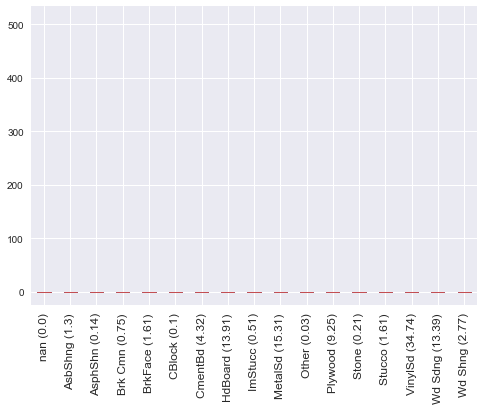

------------------------------------
3SsnPorch compared to Fence
------------------------------------
Catagorical vs Continuous
F = 0.9005941457245178
p = 0.4406115062277459


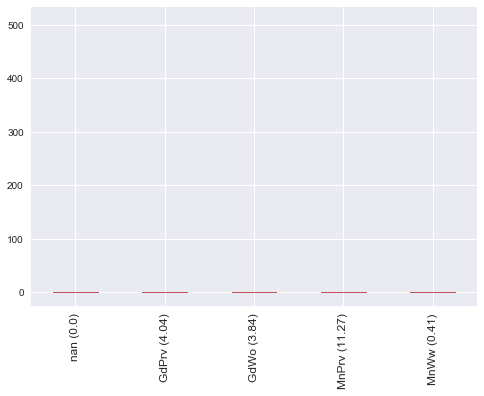

------------------------------------
3SsnPorch compared to FireplaceQu
------------------------------------
Catagorical vs Continuous
F = 3.035296301232384
p = 0.01662147913386365


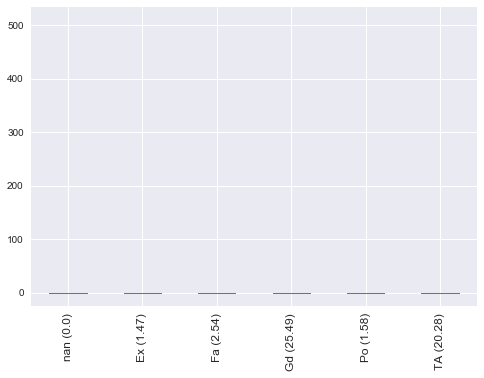

------------------------------------
3SsnPorch compared to Fireplaces
------------------------------------
Continous vs Continous
Correlation: 0.01885156132991985


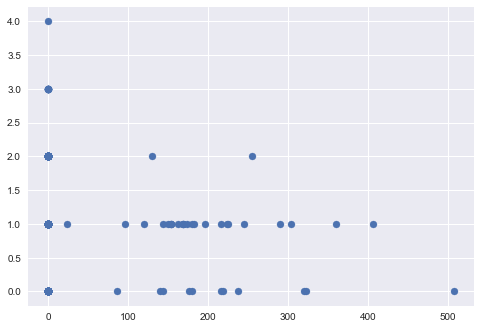

------------------------------------
3SsnPorch compared to Foundation
------------------------------------
Catagorical vs Continuous
F = 6.255367218920746
p = 8.845161165077619e-06


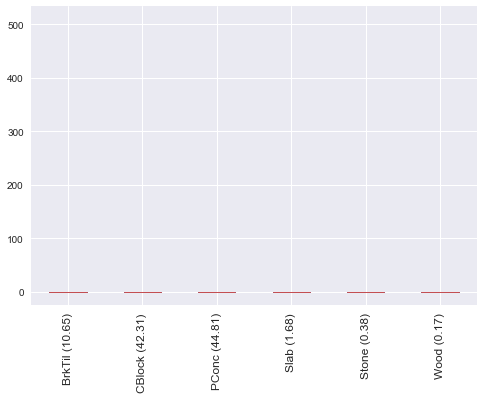

------------------------------------
3SsnPorch compared to FullBath
------------------------------------
Continous vs Continous
Correlation: 0.0151921676946561


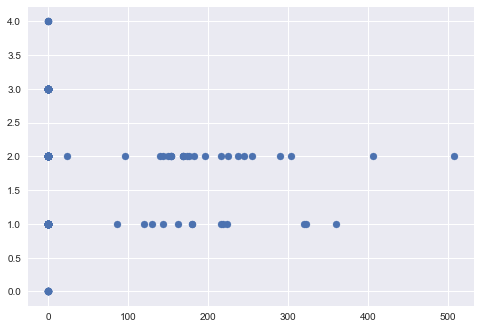

------------------------------------
3SsnPorch compared to Functional
------------------------------------
Catagorical vs Continuous
F = 0.77106029462864
p = 0.592612373109949


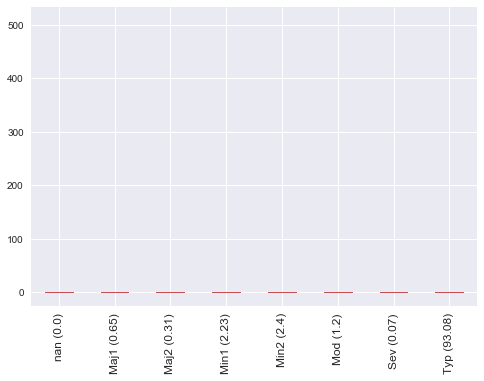

------------------------------------
3SsnPorch compared to GarageArea
------------------------------------
Continous vs Continous
Correlation: 0.029439772859554972


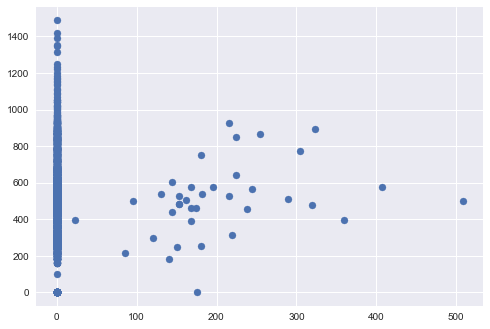

------------------------------------
3SsnPorch compared to GarageCars
------------------------------------
Continous vs Continous
Correlation: 0.02338343210784874


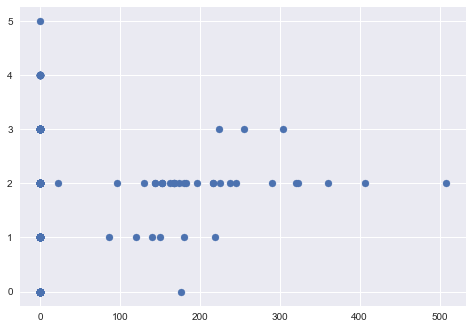

------------------------------------
3SsnPorch compared to GarageCond
------------------------------------
Catagorical vs Continuous
F = 0.13073242849578187
p = 0.971216615428684


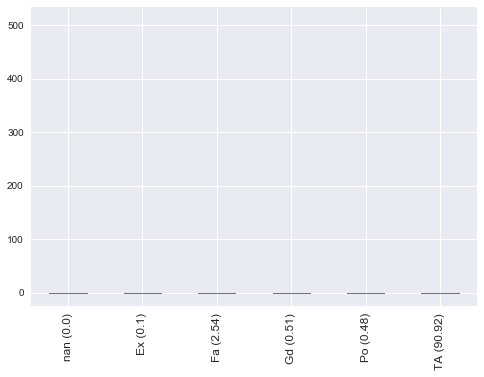

------------------------------------
3SsnPorch compared to GarageFinish
------------------------------------
Catagorical vs Continuous
F = 4.483127995594568
p = 0.01138050134280979


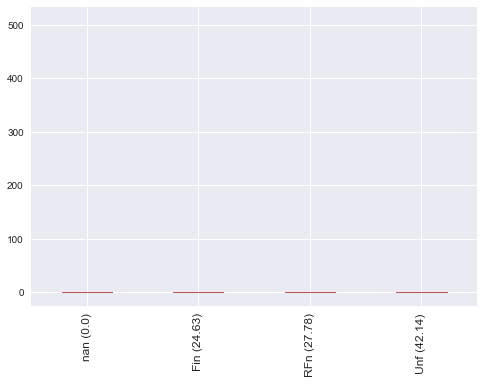

------------------------------------
3SsnPorch compared to GarageQual
------------------------------------
Catagorical vs Continuous
F = 0.8339647715594906
p = 0.5033979841106844


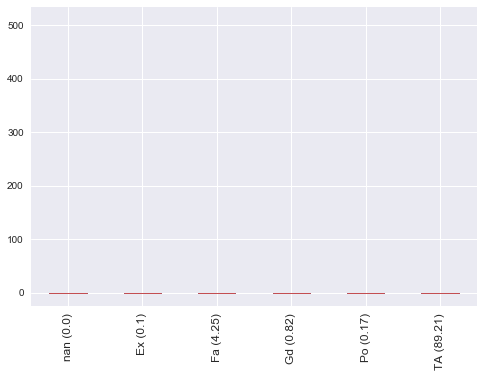

------------------------------------
3SsnPorch compared to GarageType
------------------------------------
Catagorical vs Continuous
F = 1.021221122526802
p = 0.4033015547845216


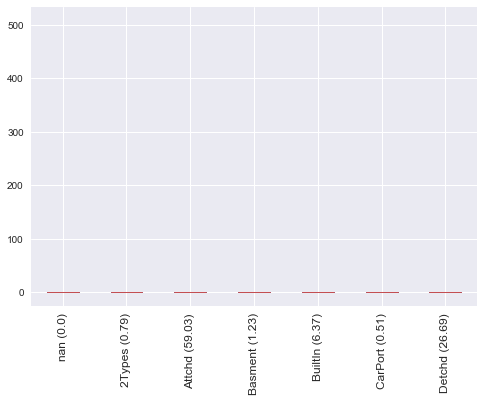

------------------------------------
3SsnPorch compared to GarageYrBlt
------------------------------------
Continous vs Continous
Correlation: 0.02069926771320887


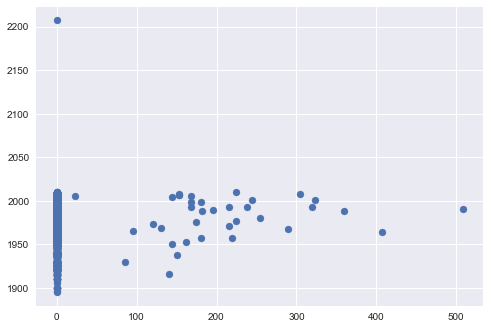

------------------------------------
3SsnPorch compared to GrLivArea
------------------------------------
Continous vs Continous
Correlation: 0.0062679839971350945


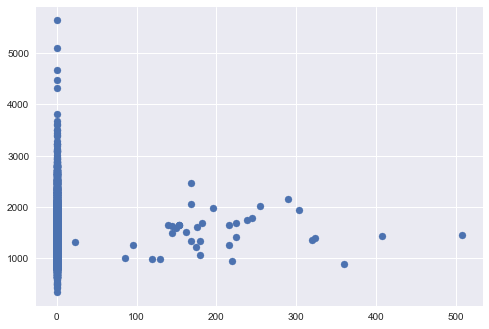

------------------------------------
3SsnPorch compared to HalfBath
------------------------------------
Continous vs Continous
Correlation: -0.02341709243000135


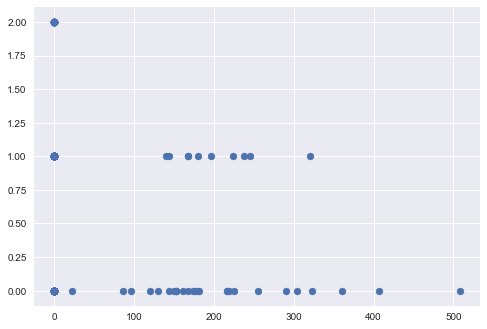

------------------------------------
3SsnPorch compared to Heating
------------------------------------
Catagorical vs Continuous
F = 0.09741507350664584
p = 0.9925814548611619


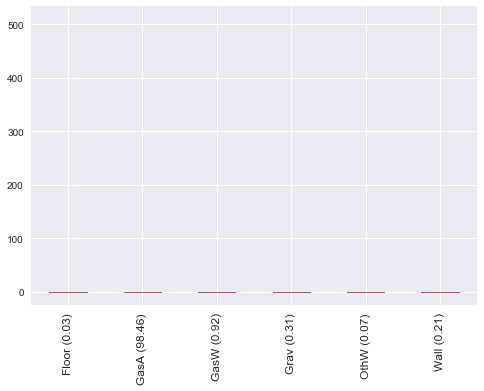

------------------------------------
3SsnPorch compared to HeatingQC
------------------------------------
Catagorical vs Continuous
F = 1.2365397806891434
p = 0.2931271777759035


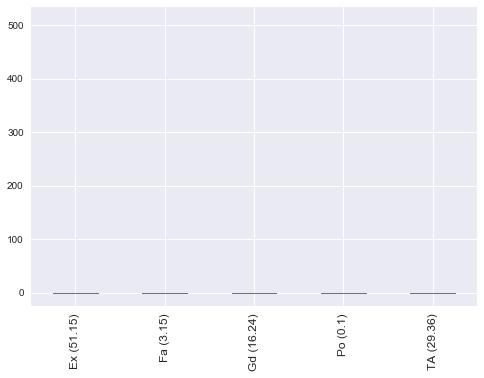

------------------------------------
3SsnPorch compared to HouseStyle
------------------------------------
Catagorical vs Continuous
F = 0.9537815395927224
p = 0.4635332900886461


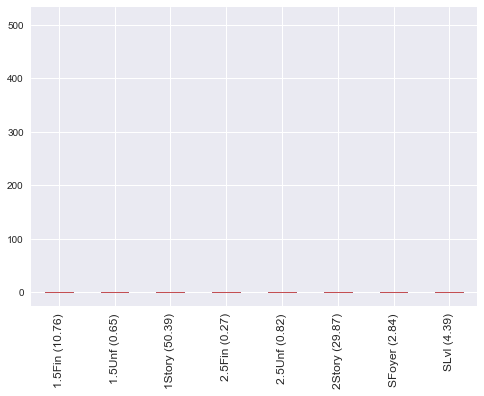

------------------------------------
3SsnPorch compared to Id
------------------------------------
Continous vs Continous
Correlation: -0.046538465538606424


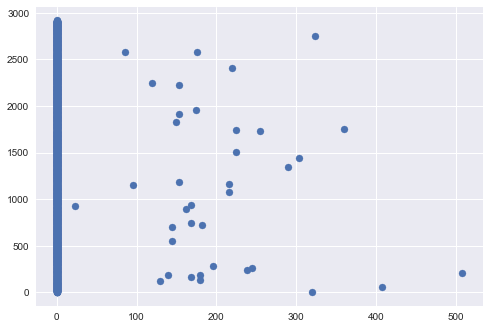

------------------------------------
3SsnPorch compared to KitchenAbvGr
------------------------------------
Continous vs Continous
Correlation: -0.021461593629733905


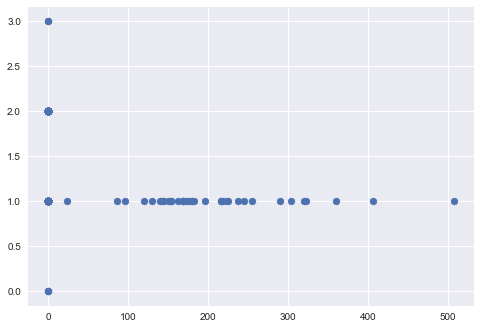

------------------------------------
3SsnPorch compared to KitchenQual
------------------------------------
Catagorical vs Continuous
F = 0.9356965773218181
p = 0.42247703975443796


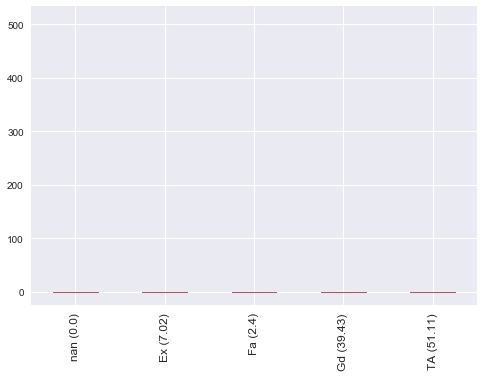

------------------------------------
3SsnPorch compared to LandContour
------------------------------------
Catagorical vs Continuous
F = 2.992889454084755
p = 0.029740888682176562


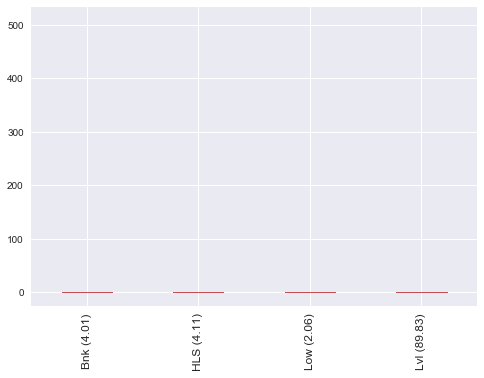

------------------------------------
3SsnPorch compared to LandSlope
------------------------------------
Catagorical vs Continuous
F = 0.5111479862340678
p = 0.5998603459389601


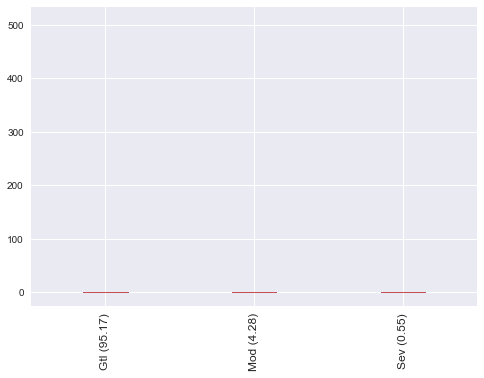

------------------------------------
3SsnPorch compared to LotArea
------------------------------------
Continous vs Continous
Correlation: 0.015995059512929854


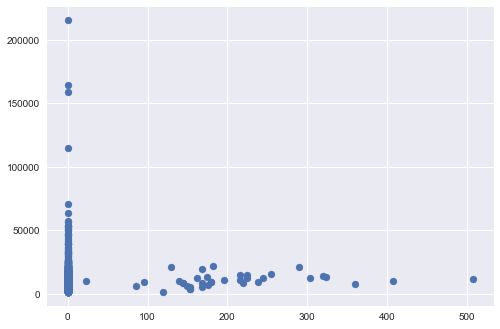

------------------------------------
3SsnPorch compared to LotConfig
------------------------------------
Catagorical vs Continuous
F = 0.8050214693586725
p = 0.5218012663941579


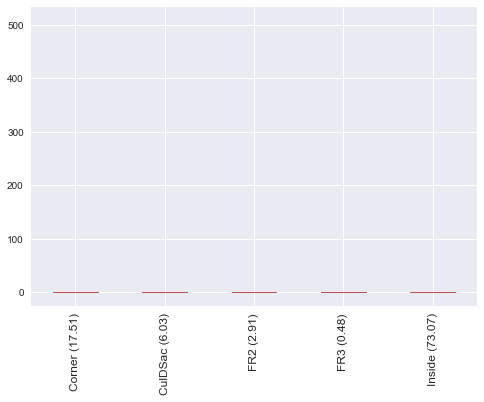

------------------------------------
3SsnPorch compared to LotFrontage
------------------------------------
Continous vs Continous
Correlation: 0.02828879798911148


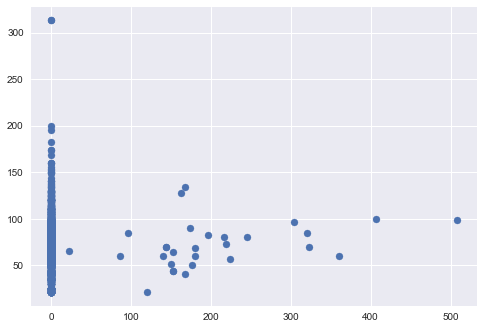

------------------------------------
3SsnPorch compared to LotShape
------------------------------------
Catagorical vs Continuous
F = 0.6473034578335934
p = 0.5846165619898778


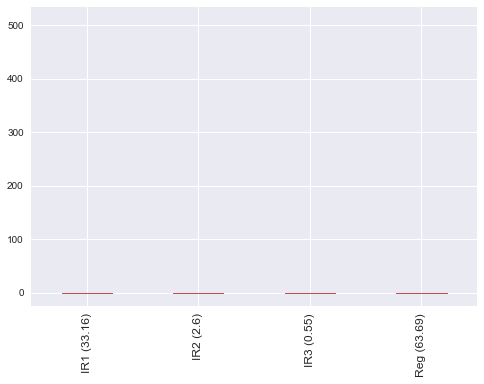

------------------------------------
3SsnPorch compared to LowQualFinSF
------------------------------------
Continous vs Continous
Correlation: -0.004544932653933501


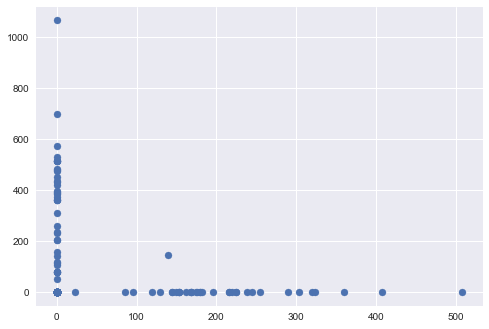

------------------------------------
3SsnPorch compared to MSSubClass
------------------------------------
Continous vs Continous
Correlation: -0.037528917416030205


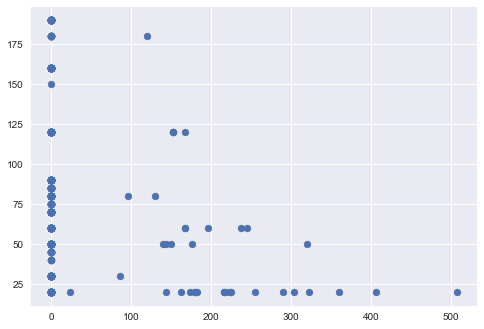

------------------------------------
3SsnPorch compared to MSZoning
------------------------------------
Catagorical vs Continuous
F = 0.24375527805832164
p = 0.9135339609905122


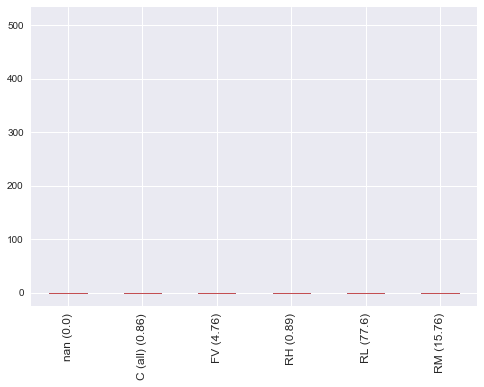

------------------------------------
3SsnPorch compared to MasVnrArea
------------------------------------
Continous vs Continous
Correlation: 0.013611654590997998


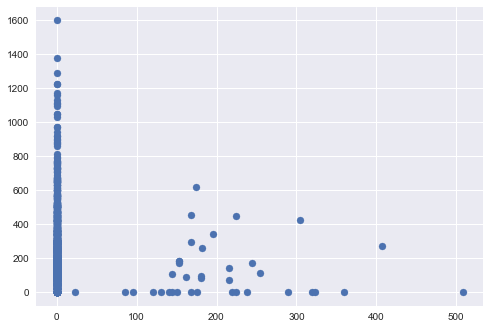

------------------------------------
3SsnPorch compared to MasVnrType
------------------------------------
Catagorical vs Continuous
F = 0.7242660582557731
p = 0.5374135559937785


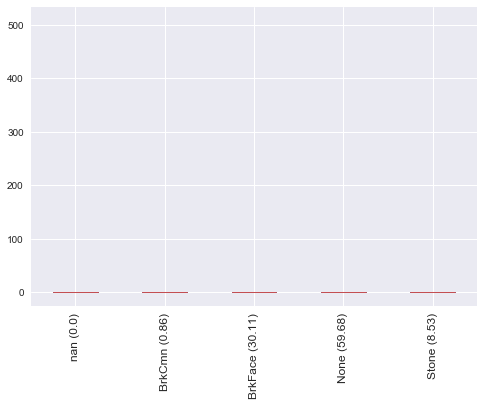

------------------------------------
3SsnPorch compared to MiscFeature
------------------------------------
Catagorical vs Continuous
F = 0.06895221313560906
p = 0.97634273124879


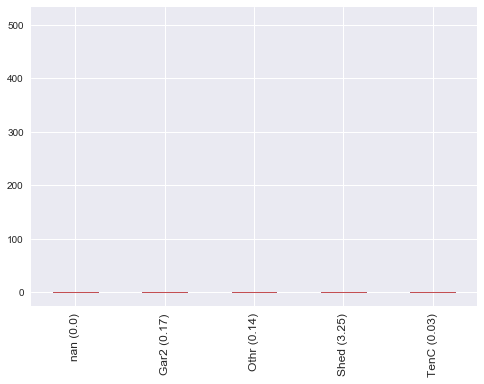

------------------------------------
3SsnPorch compared to MiscVal
------------------------------------
Continous vs Continous
Correlation: -0.0007882796488422951


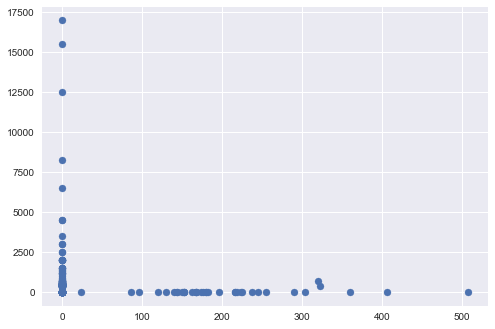

------------------------------------
3SsnPorch compared to MoSold
------------------------------------
Continous vs Continous
Correlation: 0.0273909962802687


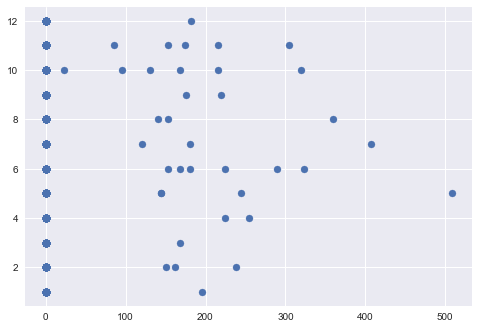

------------------------------------
3SsnPorch compared to Neighborhood
------------------------------------
Catagorical vs Continuous
F = 1.2408791048605574
p = 0.19347285081387822


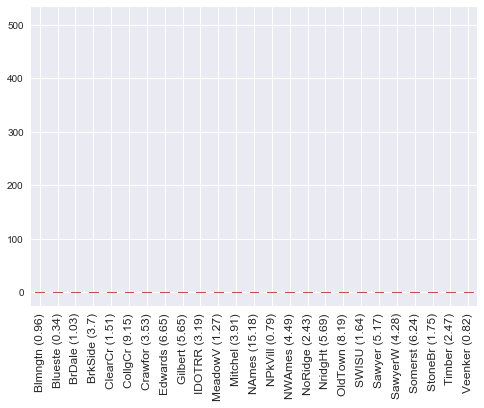

------------------------------------
3SsnPorch compared to OpenPorchSF
------------------------------------
Continous vs Continous
Correlation: -0.009391843770959899


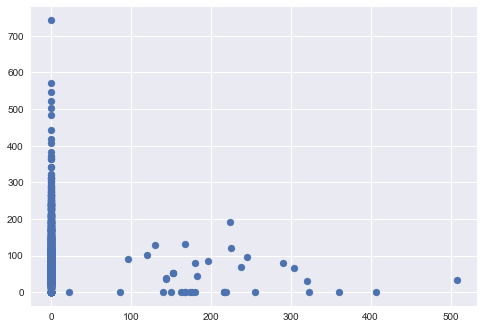

------------------------------------
3SsnPorch compared to OverallCond
------------------------------------
Continous vs Continous
Correlation: 0.04373909271990457


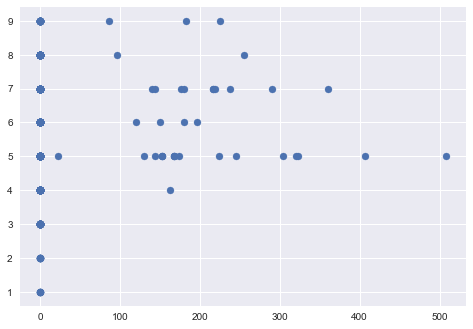

------------------------------------
3SsnPorch compared to OverallQual
------------------------------------
Continous vs Continous
Correlation: 0.018714807474515954


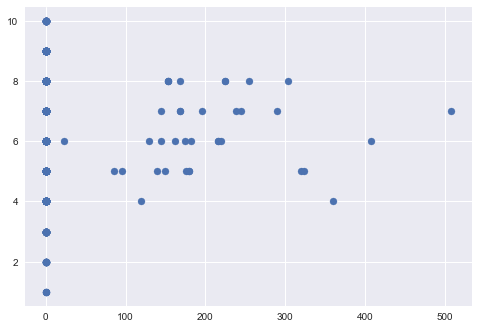

------------------------------------
3SsnPorch compared to PavedDrive
------------------------------------
Catagorical vs Continuous
F = 0.4550467003687197
p = 0.634463382469781


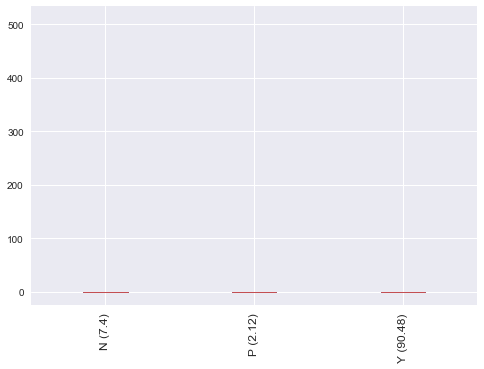

------------------------------------
3SsnPorch compared to PoolArea
------------------------------------
Continous vs Continous
Correlation: -0.00652534094794669


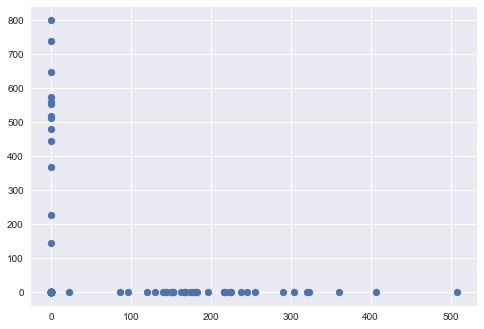

------------------------------------
3SsnPorch compared to PoolQC
------------------------------------
Catagorical vs Continuous
F = nan
p = nan


c:\python\python35\lib\site-packages\scipy\stats\stats.py:2968: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


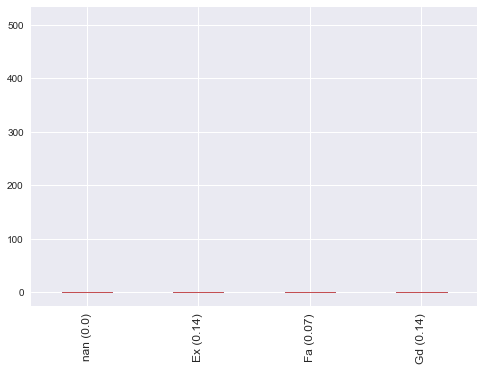

------------------------------------
3SsnPorch compared to RoofMatl
------------------------------------
Catagorical vs Continuous
F = 3.7430722228995044
p = 0.0004820344323783877


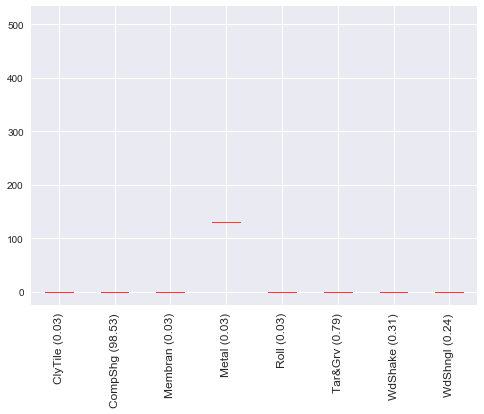

------------------------------------
3SsnPorch compared to RoofStyle
------------------------------------
Catagorical vs Continuous
F = 0.8002836143264018
p = 0.5493107487160944


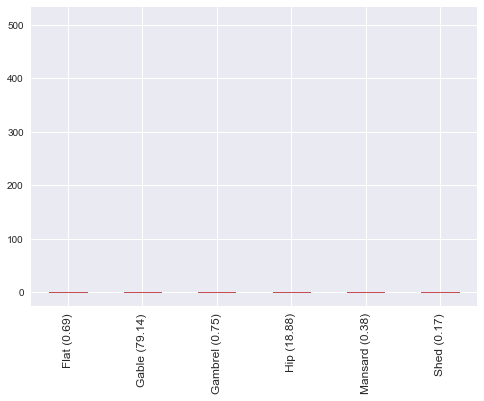

------------------------------------
3SsnPorch compared to SaleCondition
------------------------------------
Catagorical vs Continuous
F = 0.5733772693483135
p = 0.7204889650842439


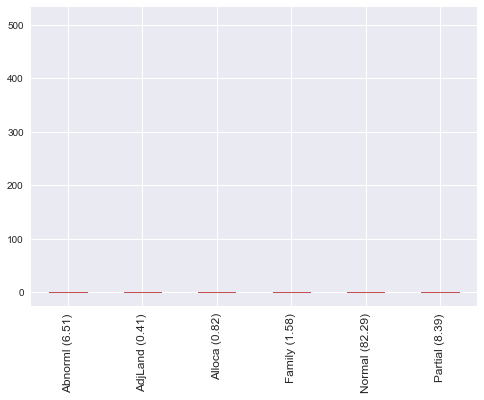

------------------------------------
3SsnPorch compared to SaleType
------------------------------------
Catagorical vs Continuous
F = 0.35438914553583756
p = 0.9441862774552273


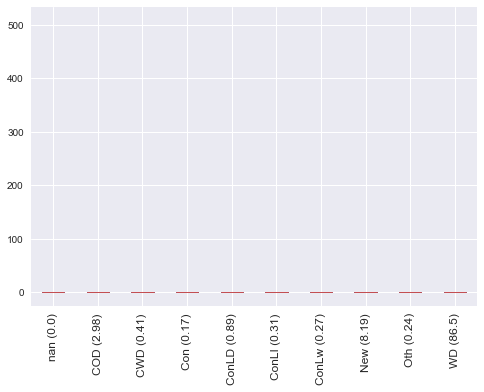

------------------------------------
3SsnPorch compared to ScreenPorch
------------------------------------
Continous vs Continous
Correlation: -0.02954586266680224


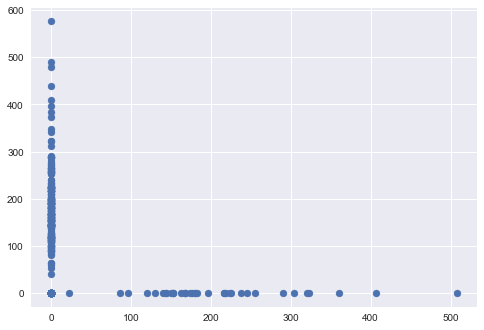

------------------------------------
3SsnPorch compared to Street
------------------------------------
Catagorical vs Continuous
F = 0.1285728013668247
p = 0.7199423691704789


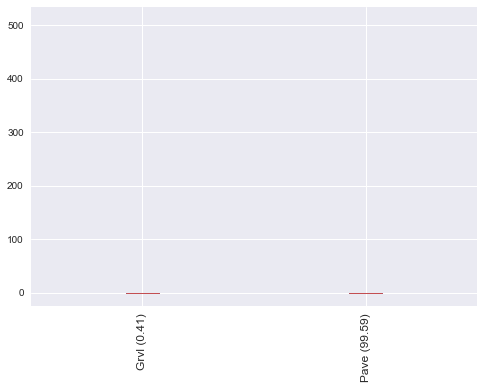

------------------------------------
3SsnPorch compared to TotRmsAbvGrd
------------------------------------
Continous vs Continous
Correlation: -0.025763620661384046


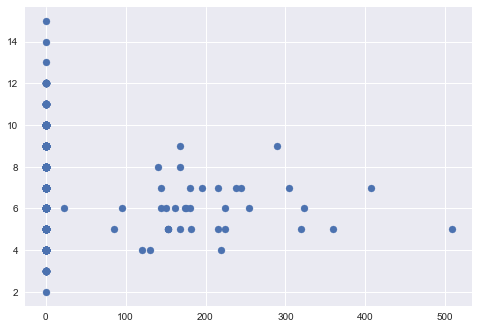

------------------------------------
3SsnPorch compared to TotalBsmtSF
------------------------------------
Continous vs Continous
Correlation: 0.037892157164433664


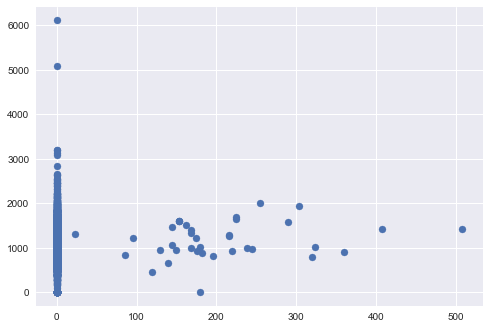

------------------------------------
3SsnPorch compared to Utilities
------------------------------------
Catagorical vs Continuous
F = 0.010680972503782573
p = 0.9176932628950915


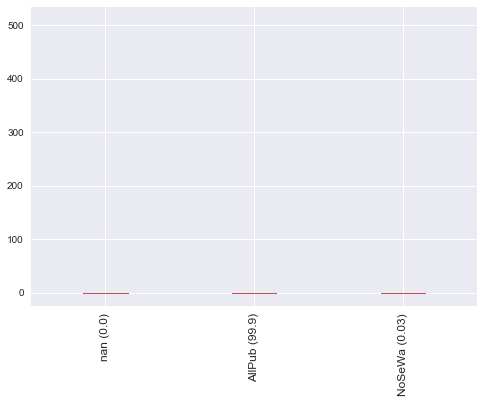

------------------------------------
3SsnPorch compared to WoodDeckSF
------------------------------------
Continous vs Continous
Correlation: -0.003935215859959852


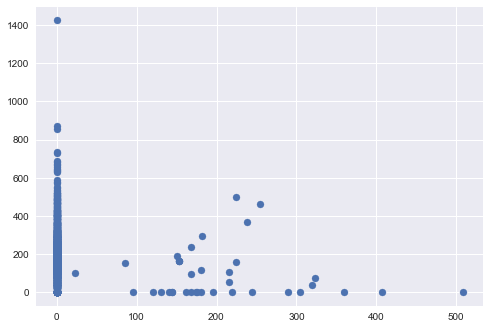

------------------------------------
3SsnPorch compared to YearBuilt
------------------------------------
Continous vs Continous
Correlation: 0.015957710622863046


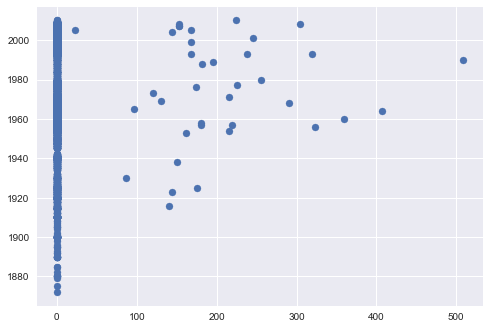

------------------------------------
3SsnPorch compared to YearRemodAdd
------------------------------------
Continous vs Continous
Correlation: 0.03743276129742


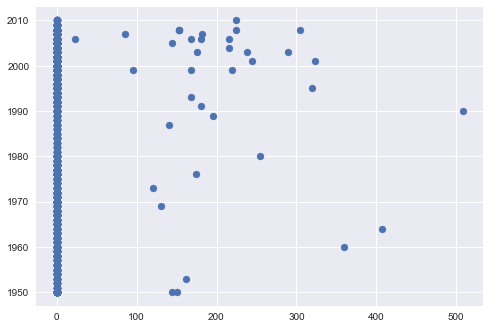

------------------------------------
3SsnPorch compared to YrSold
------------------------------------
Continous vs Continous
Correlation: 0.02255972856089955


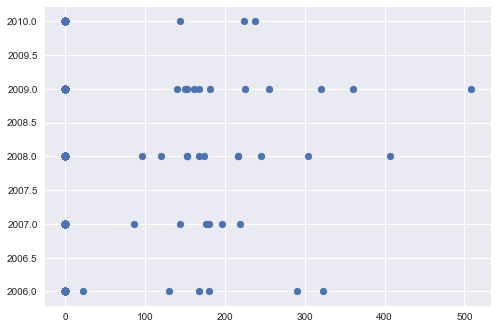

------------------------------------
Alley compared to BedroomAbvGr
------------------------------------
Catagorical vs Continuous
F = 7.076902671612219
p = 0.008454985156838925


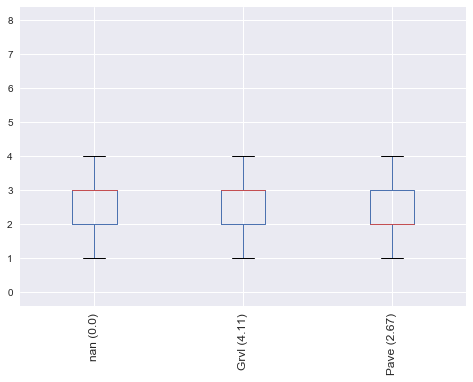

------------------------------------
Alley compared to BldgType
------------------------------------
Catagorical vs Catagorical

Alley		BldgType


NameError: name 'train' is not defined

In [22]:

tt.multi_analysis(df, cat_dict)

In [30]:
df_first_pass_cols = ["1stFlrSF", "2ndFlrSF","Alley", "BedroomAbvGr","BldgType",
                     "BsmtCond", "BsmtExposure","BsmtFinType1","BsmtFullBath",
                      "BsmtHalfBath","BsmtQual","CentralAir","ExterQual","Exterior1st",
                     "Exterior2nd","Fireplaces","Foundation","FullBath","GarageArea",
                     "GarageCars", "GarageFinish", "GarageType","GrLivArea", "HalfBath",
                     "HeatingQC","HouseStyle","KitchenAbvGr","KitchenQual", "LotFrontage",
                     "LotShape","MSSubClass","MSZoning", "MasVnrType", "MoSold", "Neighborhood",
                     "OverallCond", "OverallQual", "RoofStyle", "SaleCondition", "TotRmsAbvGrd",
                     "TotalBsmtSF", "YearBuilt", "YrSold"]

In [31]:
df = df[df_first_pass_cols]

In [32]:
df.shape

(2919, 43)

Features are :
Index(['1stFlrSF', '2ndFlrSF', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'CentralAir', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fireplaces', 'Foundation', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageFinish', 'GarageType', 'GrLivArea', 'HalfBath', 'HeatingQC',
       'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LotFrontage', 'LotShape',
       'MSSubClass', 'MSZoning', 'MasVnrType', 'MoSold', 'Neighborhood',
       'OverallCond', 'OverallQual', 'RoofStyle', 'SaleCondition',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt', 'YrSold'],
      dtype='object')
-------------------------------------------------
                     1stFlrSF                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
25%       876.000000
50%      1082.000000
75%

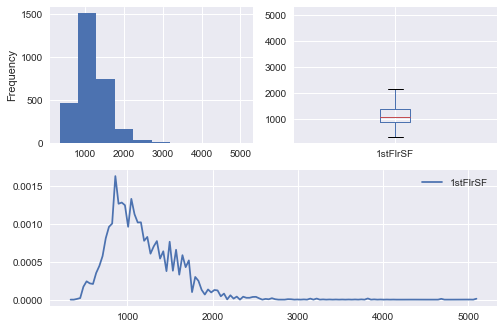

-------------------------------------------------
                     2ndFlrSF                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean      336.483727
std       428.701456
min         0.000000
25%         0.000000
50%         0.000000
75%       704.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
nulls : 0


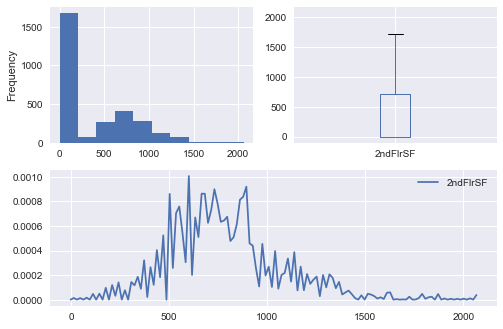

-------------------------------------------------
                     Alley                          
-------------------------------------------------
Feature breakdown: 
count      198
unique       2
top       Grvl
freq       120
Name: Alley, dtype: object
nulls : 2721
Grvl    60.606061
Pave    39.393939
Name: Alley, dtype: float64


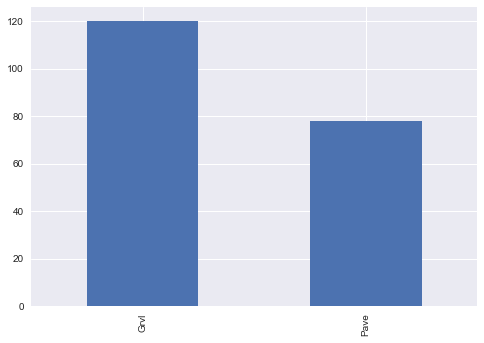

-------------------------------------------------
                     BedroomAbvGr                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        2.860226
std         0.822693
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64
nulls : 0


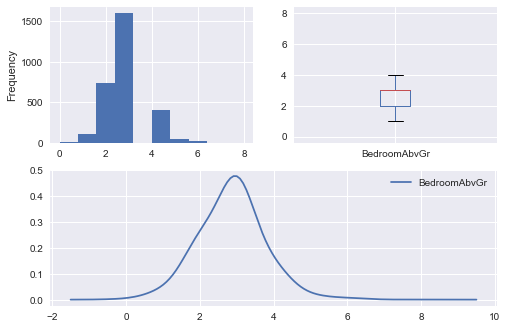

-------------------------------------------------
                     BldgType                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       5
top       1Fam
freq      2425
Name: BldgType, dtype: object
nulls : 0
1Fam      83.076396
TwnhsE     7.776636
Duplex     3.734156
Twnhs      3.288798
2fmCon     2.124015
Name: BldgType, dtype: float64


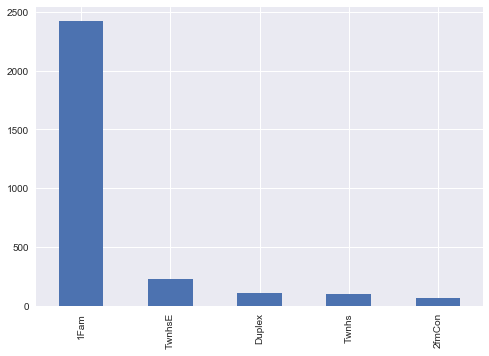

-------------------------------------------------
                     BsmtCond                          
-------------------------------------------------
Feature breakdown: 
count     2837
unique       4
top         TA
freq      2606
Name: BsmtCond, dtype: object
nulls : 82
TA    91.857596
Gd     4.300317
Fa     3.665844
Po     0.176243
Name: BsmtCond, dtype: float64


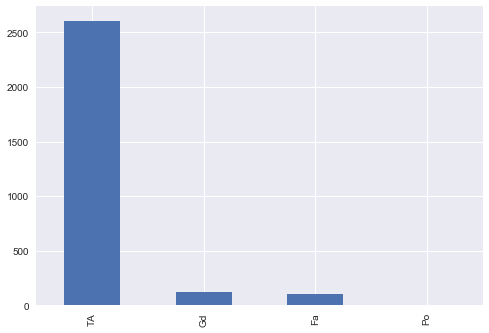

-------------------------------------------------
                     BsmtExposure                          
-------------------------------------------------
Feature breakdown: 
count     2837
unique       4
top         No
freq      1904
Name: BsmtExposure, dtype: object
nulls : 82
No    67.113148
Av    14.733874
Gd     9.728587
Mn     8.424392
Name: BsmtExposure, dtype: float64


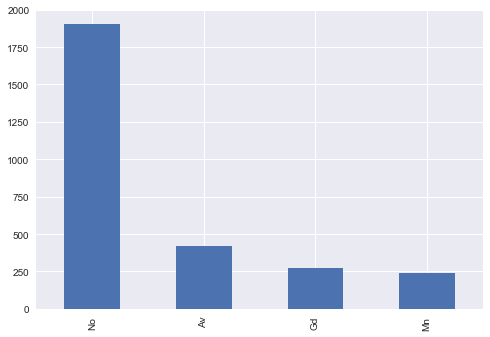

-------------------------------------------------
                     BsmtFinType1                          
-------------------------------------------------
Feature breakdown: 
count     2840
unique       6
top        Unf
freq       851
Name: BsmtFinType1, dtype: object
nulls : 79
Unf    29.964789
GLQ    29.894366
ALQ    15.105634
Rec    10.140845
BLQ     9.471831
LwQ     5.422535
Name: BsmtFinType1, dtype: float64


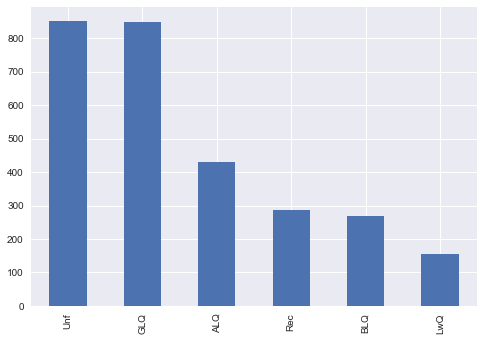

-------------------------------------------------
                     BsmtFullBath                          
-------------------------------------------------
Feature breakdown: 
count    2917.000000
mean        0.429894
std         0.524736
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
nulls : 2


c:\python\python35\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
c:\python\python35\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


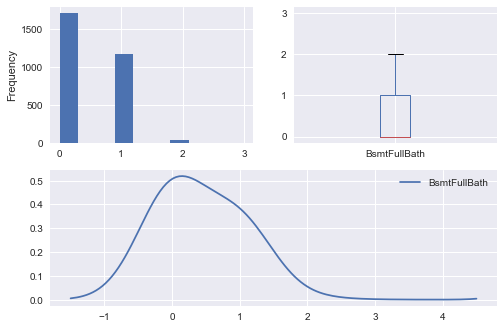

-------------------------------------------------
                     BsmtHalfBath                          
-------------------------------------------------
Feature breakdown: 
count    2917.000000
mean        0.061364
std         0.245687
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
nulls : 2


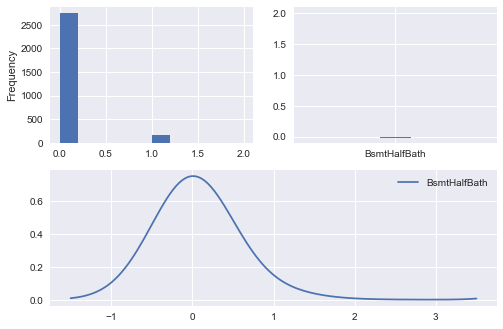

-------------------------------------------------
                     BsmtQual                          
-------------------------------------------------
Feature breakdown: 
count     2838
unique       4
top         TA
freq      1283
Name: BsmtQual, dtype: object
nulls : 81
TA    45.207893
Gd    42.600423
Ex     9.090909
Fa     3.100775
Name: BsmtQual, dtype: float64


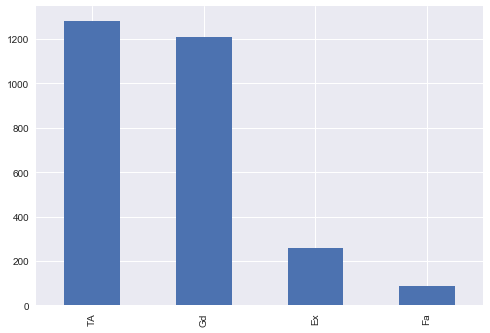

-------------------------------------------------
                     CentralAir                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       2
top          Y
freq      2723
Name: CentralAir, dtype: object
nulls : 0
Y    93.285372
N     6.714628
Name: CentralAir, dtype: float64


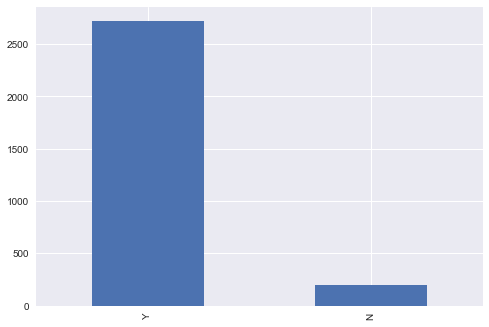

-------------------------------------------------
                     ExterQual                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       4
top         TA
freq      1798
Name: ExterQual, dtype: object
nulls : 0
TA    61.596437
Gd    33.538883
Ex     3.665639
Fa     1.199041
Name: ExterQual, dtype: float64


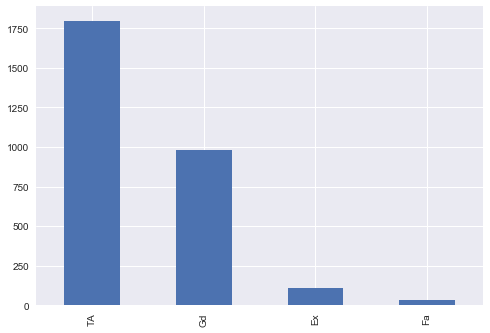

-------------------------------------------------
                     Exterior1st                          
-------------------------------------------------
Feature breakdown: 
count        2918
unique         15
top       VinylSd
freq         1025
Name: Exterior1st, dtype: object
nulls : 1
VinylSd    35.126799
MetalSd    15.421522
HdBoard    15.147361
Wd Sdng    14.084990
Plywood     7.573681
CemntBd     4.318026
BrkFace     2.981494
WdShing     1.919123
AsbShng     1.507882
Stucco      1.473612
BrkComm     0.205620
Stone       0.068540
CBlock      0.068540
AsphShn     0.068540
ImStucc     0.034270
Name: Exterior1st, dtype: float64


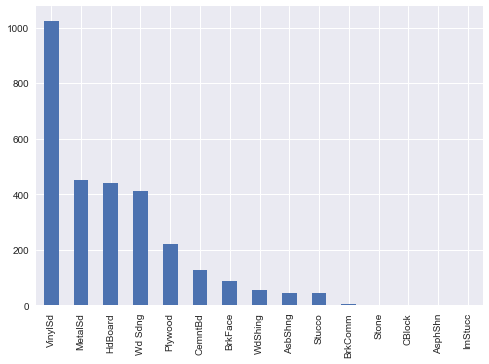

-------------------------------------------------
                     Exterior2nd                          
-------------------------------------------------
Feature breakdown: 
count        2918
unique         16
top       VinylSd
freq         1014
Name: Exterior2nd, dtype: object
nulls : 1
VinylSd    34.749829
MetalSd    15.318711
HdBoard    13.913639
Wd Sdng    13.399589
Plywood     9.252913
CmentBd     4.318026
Wd Shng     2.775874
BrkFace     1.610692
Stucco      1.610692
AsbShng     1.302262
Brk Cmn     0.753941
ImStucc     0.514051
Stone       0.205620
AsphShn     0.137080
CBlock      0.102810
Other       0.034270
Name: Exterior2nd, dtype: float64


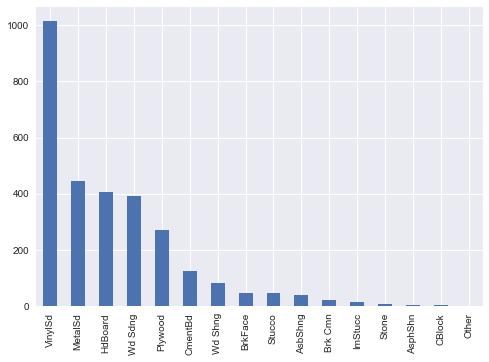

-------------------------------------------------
                     Fireplaces                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        0.597122
std         0.646129
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Fireplaces, dtype: float64
nulls : 0


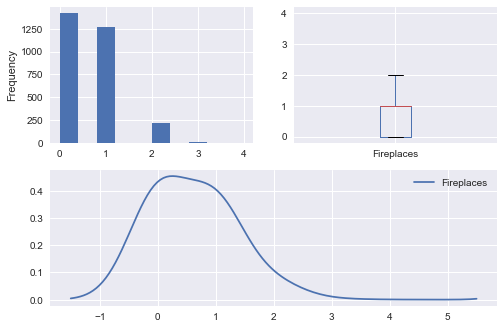

-------------------------------------------------
                     Foundation                          
-------------------------------------------------
Feature breakdown: 
count      2919
unique        6
top       PConc
freq       1308
Name: Foundation, dtype: object
nulls : 0
PConc     44.809866
CBlock    42.309010
BrkTil    10.654334
Slab       1.678657
Stone      0.376841
Wood       0.171292
Name: Foundation, dtype: float64


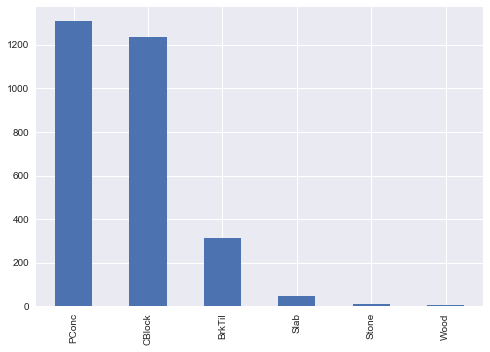

-------------------------------------------------
                     FullBath                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        1.568003
std         0.552969
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FullBath, dtype: float64
nulls : 0


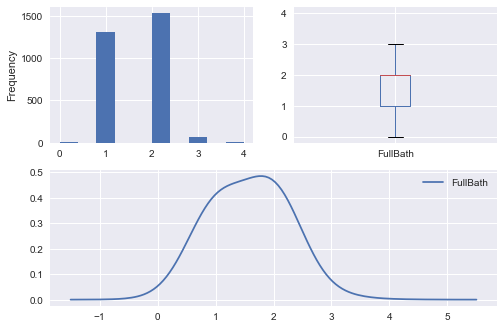

-------------------------------------------------
                     GarageArea                          
-------------------------------------------------
Feature breakdown: 
count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64
nulls : 1


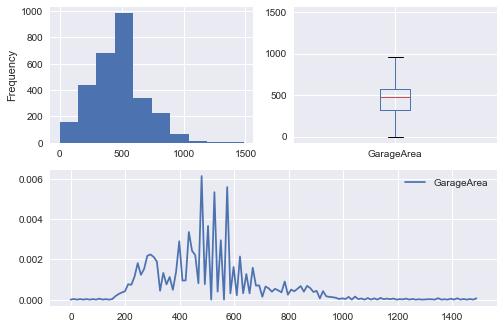

-------------------------------------------------
                     GarageCars                          
-------------------------------------------------
Feature breakdown: 
count    2918.000000
mean        1.766621
std         0.761624
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64
nulls : 1


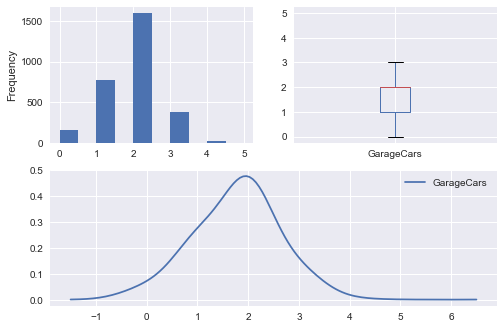

-------------------------------------------------
                     GarageFinish                          
-------------------------------------------------
Feature breakdown: 
count     2760
unique       3
top        Unf
freq      1230
Name: GarageFinish, dtype: object
nulls : 159
Unf    44.565217
RFn    29.384058
Fin    26.050725
Name: GarageFinish, dtype: float64


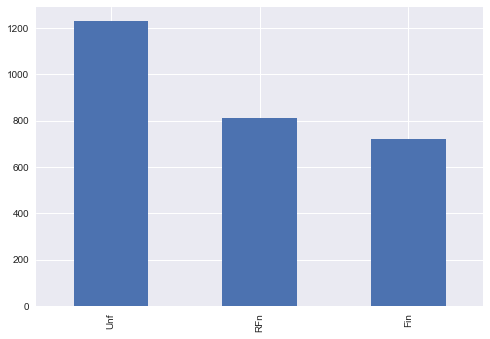

-------------------------------------------------
                     GarageType                          
-------------------------------------------------
Feature breakdown: 
count       2762
unique         6
top       Attchd
freq        1723
Name: GarageType, dtype: object
nulls : 157
Attchd     62.382332
Detchd     28.204200
BuiltIn     6.734251
Basment     1.303403
2Types      0.832730
CarPort     0.543085
Name: GarageType, dtype: float64


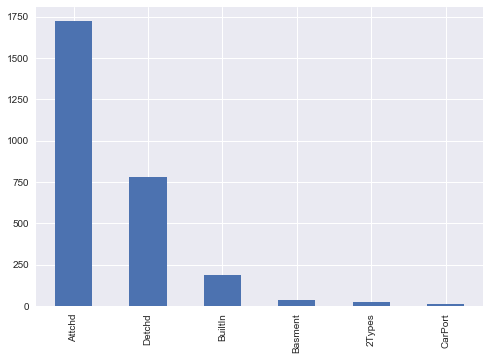

-------------------------------------------------
                     GrLivArea                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
25%      1126.000000
50%      1444.000000
75%      1743.500000
max      5642.000000
Name: GrLivArea, dtype: float64
nulls : 0


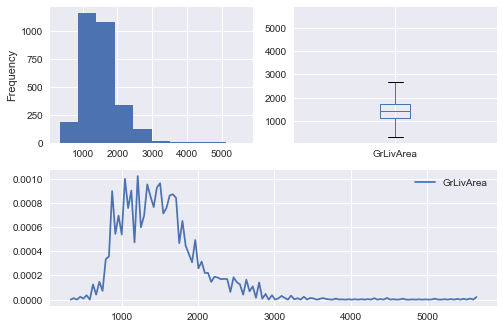

-------------------------------------------------
                     HalfBath                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        0.380267
std         0.502872
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
nulls : 0


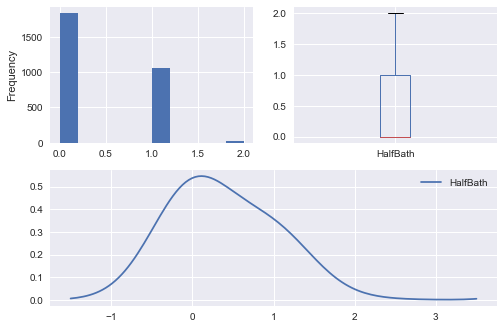

-------------------------------------------------
                     HeatingQC                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       5
top         Ex
freq      1493
Name: HeatingQC, dtype: object
nulls : 0
Ex    51.147653
TA    29.359370
Gd    16.238438
Fa     3.151764
Po     0.102775
Name: HeatingQC, dtype: float64


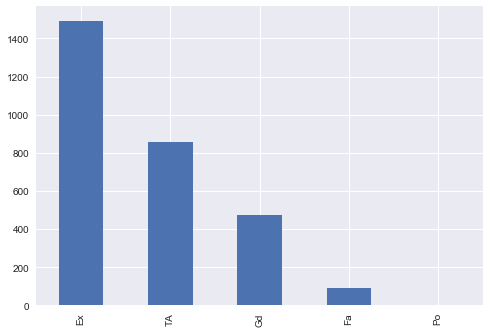

-------------------------------------------------
                     HouseStyle                          
-------------------------------------------------
Feature breakdown: 
count       2919
unique         8
top       1Story
freq        1471
Name: HouseStyle, dtype: object
nulls : 0
1Story    50.393971
2Story    29.873244
1.5Fin    10.757109
SLvl       4.385063
SFoyer     2.843440
2.5Unf     0.822199
1.5Unf     0.650908
2.5Fin     0.274066
Name: HouseStyle, dtype: float64


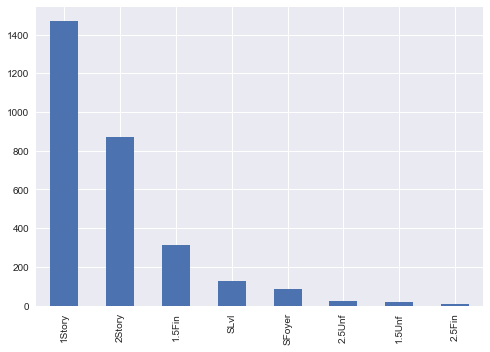

-------------------------------------------------
                     KitchenAbvGr                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        1.044536
std         0.214462
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64
nulls : 0


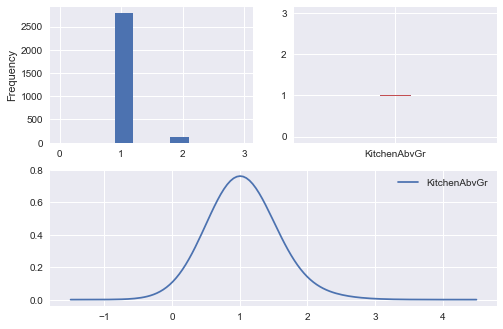

-------------------------------------------------
                     KitchenQual                          
-------------------------------------------------
Feature breakdown: 
count     2918
unique       4
top         TA
freq      1492
Name: KitchenQual, dtype: object
nulls : 1
TA    51.130912
Gd    39.444825
Ex     7.025360
Fa     2.398903
Name: KitchenQual, dtype: float64


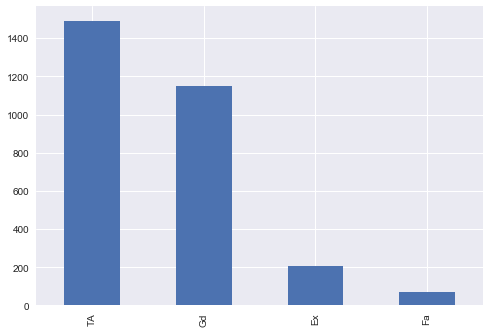

-------------------------------------------------
                     LotFrontage                          
-------------------------------------------------
Feature breakdown: 
count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
nulls : 486


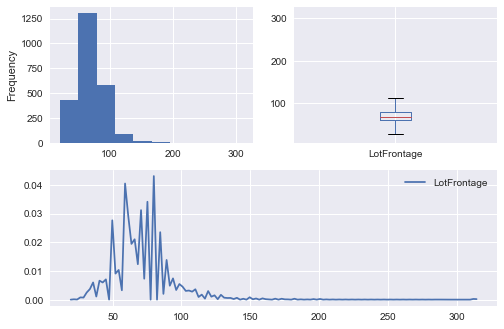

-------------------------------------------------
                     LotShape                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       4
top        Reg
freq      1859
Name: LotShape, dtype: object
nulls : 0
Reg    63.686194
IR1    33.162042
IR2     2.603631
IR3     0.548133
Name: LotShape, dtype: float64


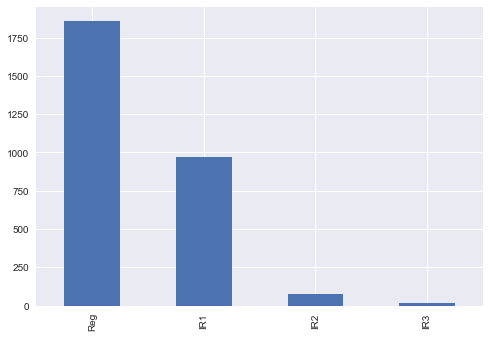

-------------------------------------------------
                     MSSubClass                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
nulls : 0


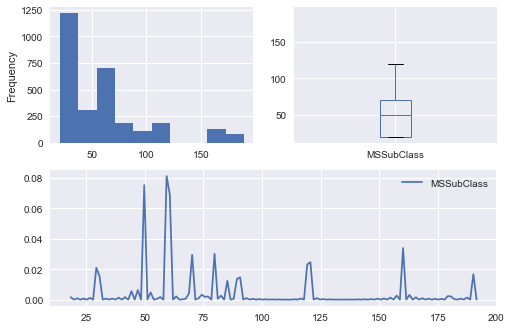

-------------------------------------------------
                     MSZoning                          
-------------------------------------------------
Feature breakdown: 
count     2915
unique       5
top         RL
freq      2265
Name: MSZoning, dtype: object
nulls : 4
RL         77.701544
RM         15.780446
FV          4.768439
RH          0.891938
C (all)     0.857633
Name: MSZoning, dtype: float64


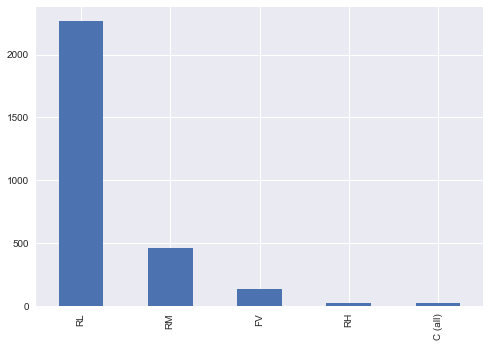

-------------------------------------------------
                     MasVnrType                          
-------------------------------------------------
Feature breakdown: 
count     2895
unique       4
top       None
freq      1742
Name: MasVnrType, dtype: object
nulls : 24
None       60.172712
BrkFace    30.362694
Stone       8.601036
BrkCmn      0.863558
Name: MasVnrType, dtype: float64


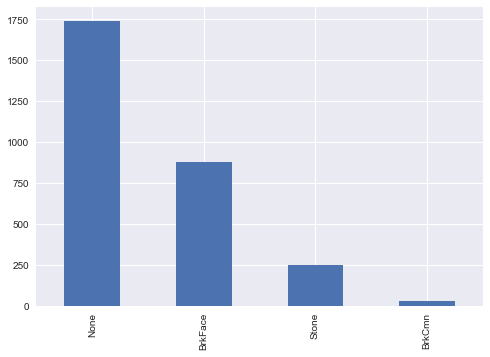

-------------------------------------------------
                     MoSold                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        6.213087
std         2.714762
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64
nulls : 0


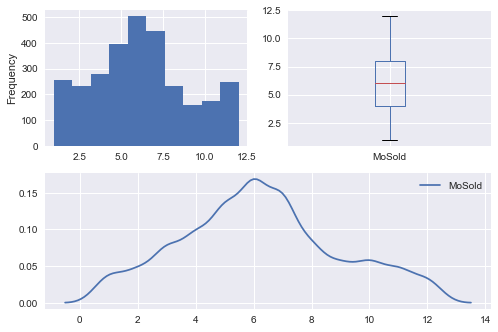

-------------------------------------------------
                     Neighborhood                          
-------------------------------------------------
Feature breakdown: 
count      2919
unique       25
top       NAmes
freq        443
Name: Neighborhood, dtype: object
nulls : 0
NAmes      15.176430
CollgCr     9.146968
OldTown     8.187736
Edwards     6.646112
Somerst     6.235012
NridgHt     5.686879
Gilbert     5.652621
Sawyer      5.173004
NWAmes      4.487838
SawyerW     4.282288
Mitchel     3.905447
BrkSide     3.699897
Crawfor     3.528606
IDOTRR      3.186023
Timber      2.466598
NoRidge     2.432340
StoneBr     1.747174
SWISU       1.644399
ClearCr     1.507366
MeadowV     1.267557
BrDale      1.027749
Blmngtn     0.959233
Veenker     0.822199
NPkVill     0.787941
Blueste     0.342583
Name: Neighborhood, dtype: float64


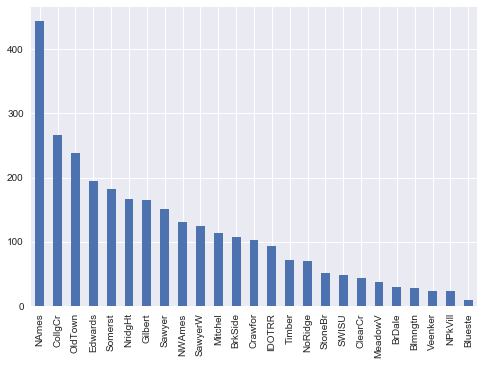

-------------------------------------------------
                     OverallCond                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        5.564577
std         1.113131
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
nulls : 0


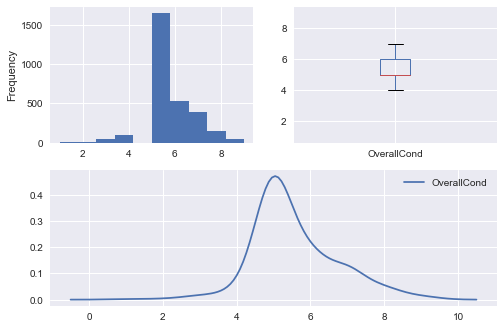

-------------------------------------------------
                     OverallQual                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        6.089072
std         1.409947
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
nulls : 0


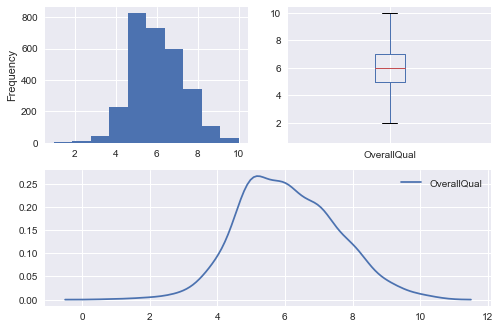

-------------------------------------------------
                     RoofStyle                          
-------------------------------------------------
Feature breakdown: 
count      2919
unique        6
top       Gable
freq       2310
Name: RoofStyle, dtype: object
nulls : 0
Gable      79.136691
Hip        18.876328
Gambrel     0.753683
Flat        0.685166
Mansard     0.376841
Shed        0.171292
Name: RoofStyle, dtype: float64


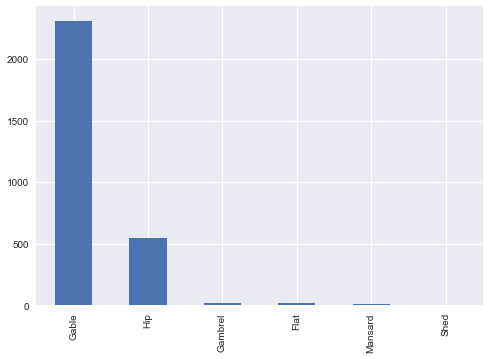

-------------------------------------------------
                     SaleCondition                          
-------------------------------------------------
Feature breakdown: 
count       2919
unique         6
top       Normal
freq        2402
Name: SaleCondition, dtype: object
nulls : 0
Normal     82.288455
Partial     8.393285
Abnorml     6.509078
Family      1.575882
Alloca      0.822199
AdjLand     0.411100
Name: SaleCondition, dtype: float64


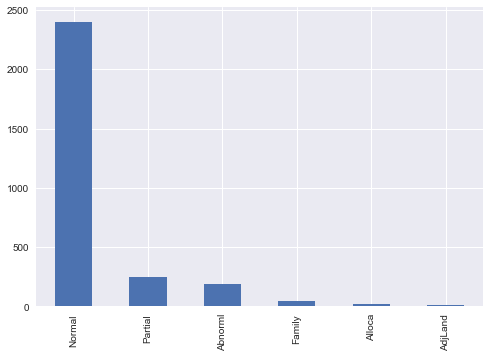

-------------------------------------------------
                     TotRmsAbvGrd                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        6.451524
std         1.569379
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: TotRmsAbvGrd, dtype: float64
nulls : 0


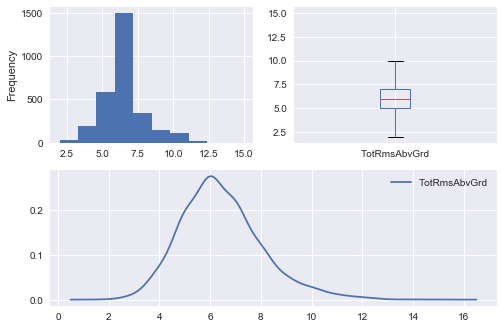

-------------------------------------------------
                     TotalBsmtSF                          
-------------------------------------------------
Feature breakdown: 
count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
nulls : 1


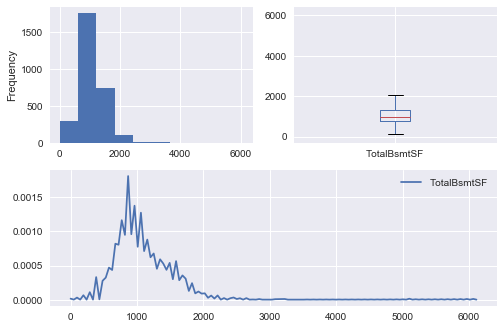

-------------------------------------------------
                     YearBuilt                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean     1971.312778
std        30.291442
min      1872.000000
25%      1953.500000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64
nulls : 0


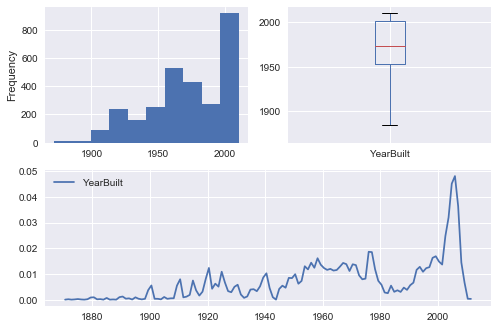

-------------------------------------------------
                     YrSold                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean     2007.792737
std         1.314964
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64
nulls : 0


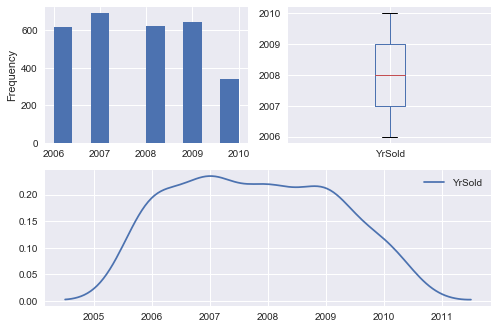

In [34]:
is_cat = tt.uni_analysis(df)

In [35]:
#make new col has second floor
df["second_floor"] = df["2ndFlrSF"].apply(lambda x: 1 if x>0 else 0)

In [36]:
#drop alley not enough people reported
df.drop("Alley", 1, inplace=True)

In [39]:
#make BedroomAbvGr catagrical
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype(object)


8

In [40]:
#fill na in BstmCond
df['BsmtCond'].fillna('NB', inplace=True)

In [42]:
#fill na in 
df['BsmtExposure'].fillna('No', inplace=True)

In [44]:
#fill na in BstmFinType1
df['BsmtFinType1'].fillna('No', inplace=True)

In [45]:
#fill na in BstmFullBath
df['BsmtFullBath'].fillna(0, inplace=True)
df['BsmtFullBath'] = df['BsmtFullBath'].astype(object)

In [46]:
#remove basment half bath as so little values
df.drop("BsmtHalfBath", 1, inplace=True)

In [47]:
#fill na in BstmFinType1
df['BsmtQual'].fillna('No', inplace=True)

In [49]:
df["Exterior1st"].fillna('VinylSd', inplace = True)

In [50]:
df["Exterior2nd"].fillna('VinylSd', inplace = True)

In [51]:
df["Fireplaces"] = df["Fireplaces"].astype(object) 

In [59]:
df["GarageArea"].fillna(df["GarageArea"].mean(), inplace=True)

In [60]:
df["GarageCars"].fillna(df["GarageCars"].median(), inplace=True)
df["GarageCars"] = df["GarageCars"].astype(object)

In [61]:
df["GarageFinish"].fillna('Unf', inplace = True)

In [62]:
df["GarageType"].fillna('Attchd', inplace = True)

In [63]:
df["HalfBath"] = df["HalfBath"].astype(object)

In [64]:
df["KitchenAbvGr"] = df["KitchenAbvGr"].astype(object)

In [65]:
df["KitchenQual"].fillna('TA', inplace = True)

In [66]:
df["LotFrontage"].fillna(0, inplace=True)

In [67]:
df["MSSubClass"] = df["MSSubClass"].astype(object)

In [68]:
df["MSZoning"].fillna('RL', inplace= True)

In [69]:
df["MasVnrType"].fillna('None', inplace=True)

In [70]:
df["MoSold"] = df["MoSold"].astype(object)

In [71]:
df["OverallCond"] = df["OverallCond"].astype(object)

In [72]:
df["OverallQual"] = df["OverallQual"].astype(object)

In [73]:
df["TotRmsAbvGrd"] = df["TotRmsAbvGrd"].astype(object)

In [74]:
df["TotalBsmtSF"].fillna(df["TotalBsmtSF"].mean(), inplace=True)

In [85]:
df["Age"] = df["YearBuilt"].apply(lambda x: 2010-x)
df["Age"] = df["Age"].astype(object)
df.drop("YearBuilt",1,inplace=True)

KeyError: 'YearBuilt'

In [86]:
df["YearsSinceSale"] = df["YrSold"].apply(lambda x: 2010-x)
df.drop("YrSold",1,inplace=True)

KeyError: 'YrSold'

In [90]:
df["YearsSinceSale"]= df["YearsSinceSale"].astype(object)
df["Age"] = df["Age"].astype(object)

Features are :
Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BldgType', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFullBath', 'BsmtQual',
       'CentralAir', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fireplaces',
       'Foundation', 'FullBath', 'GarageArea', 'GarageCars', 'GarageFinish',
       'GarageType', 'GrLivArea', 'HalfBath', 'HeatingQC', 'HouseStyle',
       'KitchenAbvGr', 'KitchenQual', 'LotFrontage', 'LotShape', 'MSSubClass',
       'MSZoning', 'MasVnrType', 'MoSold', 'Neighborhood', 'OverallCond',
       'OverallQual', 'RoofStyle', 'SaleCondition', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'second_floor', 'Age', 'YearsSinceSale'],
      dtype='object')
-------------------------------------------------
                     1stFlrSF                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
25%       876.000000
50%      1082.000000
75%      1

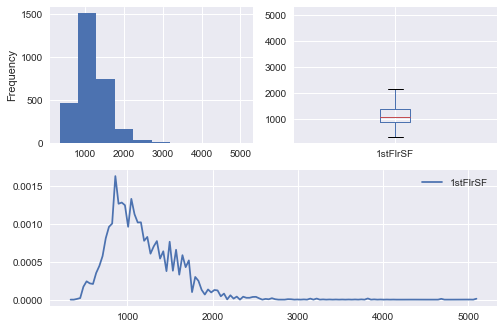

-------------------------------------------------
                     2ndFlrSF                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean      336.483727
std       428.701456
min         0.000000
25%         0.000000
50%         0.000000
75%       704.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
nulls : 0


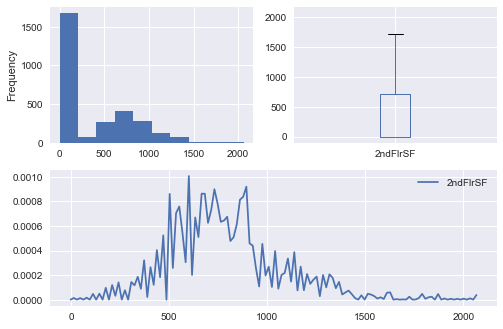

-------------------------------------------------
                     BedroomAbvGr                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       8
top          3
freq      1596
Name: BedroomAbvGr, dtype: int64
nulls : 0
3    54.676259
2    25.419664
4    13.703323
1     3.528606
5     1.644399
6     0.719424
0     0.274066
8     0.034258
Name: BedroomAbvGr, dtype: float64


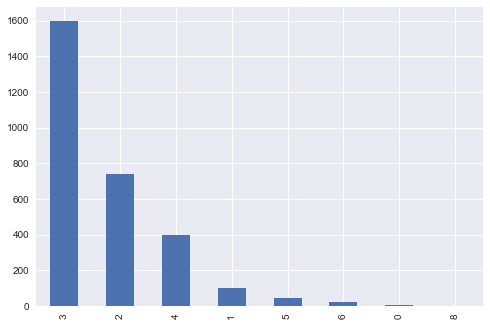

-------------------------------------------------
                     BldgType                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       5
top       1Fam
freq      2425
Name: BldgType, dtype: object
nulls : 0
1Fam      83.076396
TwnhsE     7.776636
Duplex     3.734156
Twnhs      3.288798
2fmCon     2.124015
Name: BldgType, dtype: float64


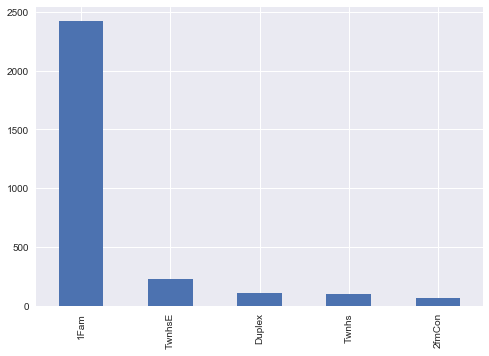

-------------------------------------------------
                     BsmtCond                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       5
top         TA
freq      2606
Name: BsmtCond, dtype: object
nulls : 0
TA    89.277150
Gd     4.179514
Fa     3.562864
NB     2.809181
Po     0.171292
Name: BsmtCond, dtype: float64


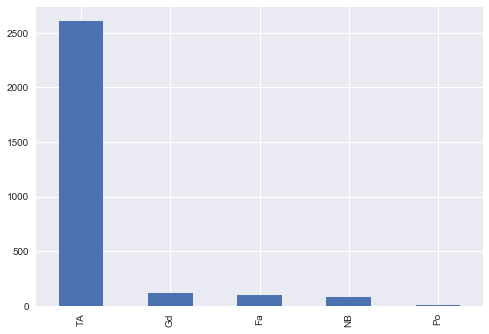

-------------------------------------------------
                     BsmtExposure                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       4
top         No
freq      1986
Name: BsmtExposure, dtype: object
nulls : 0
No    68.036999
Av    14.319973
Gd     9.455293
Mn     8.187736
Name: BsmtExposure, dtype: float64


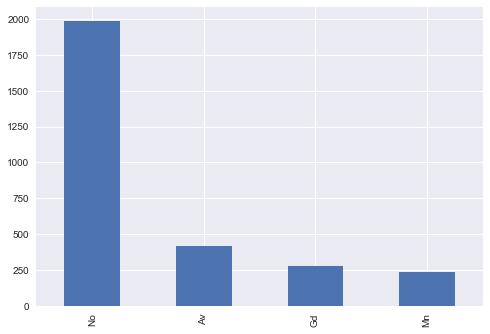

-------------------------------------------------
                     BsmtFinType1                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       7
top        Unf
freq       851
Name: BsmtFinType1, dtype: object
nulls : 0
Unf    29.153820
GLQ    29.085303
ALQ    14.696814
Rec     9.866393
BLQ     9.215485
LwQ     5.275779
No      2.706406
Name: BsmtFinType1, dtype: float64


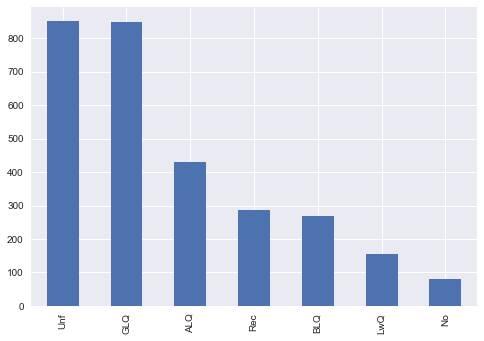

-------------------------------------------------
                     BsmtFullBath                          
-------------------------------------------------
Feature breakdown: 
count     2919.0
unique       4.0
top          0.0
freq      1707.0
Name: BsmtFullBath, dtype: float64
nulls : 0
0.0    58.478931
1.0    40.150737
2.0     1.301816
3.0     0.068517
Name: BsmtFullBath, dtype: float64


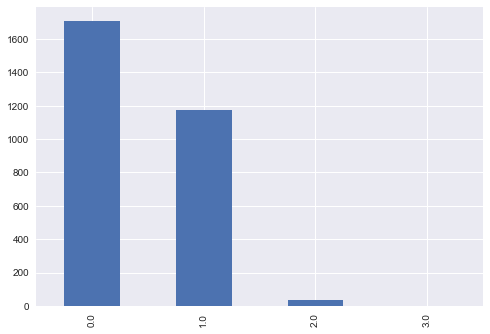

-------------------------------------------------
                     BsmtQual                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       5
top         TA
freq      1283
Name: BsmtQual, dtype: object
nulls : 0
TA    43.953409
Gd    41.418294
Ex     8.838643
Fa     3.014731
No     2.774923
Name: BsmtQual, dtype: float64


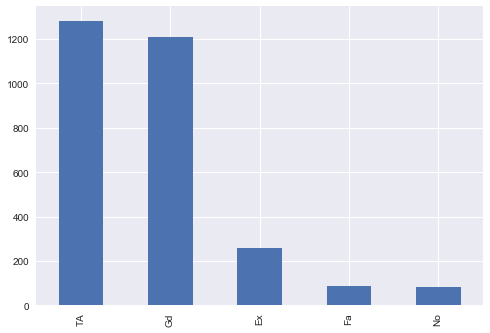

-------------------------------------------------
                     CentralAir                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       2
top          Y
freq      2723
Name: CentralAir, dtype: object
nulls : 0
Y    93.285372
N     6.714628
Name: CentralAir, dtype: float64


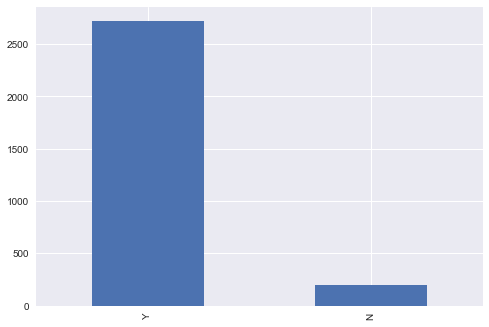

-------------------------------------------------
                     ExterQual                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       4
top         TA
freq      1798
Name: ExterQual, dtype: object
nulls : 0
TA    61.596437
Gd    33.538883
Ex     3.665639
Fa     1.199041
Name: ExterQual, dtype: float64


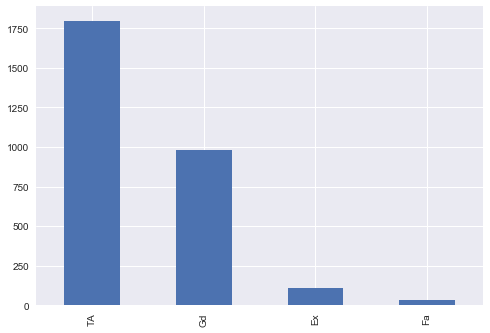

-------------------------------------------------
                     Exterior1st                          
-------------------------------------------------
Feature breakdown: 
count        2919
unique         15
top       VinylSd
freq         1026
Name: Exterior1st, dtype: object
nulls : 0
VinylSd    35.149024
MetalSd    15.416238
HdBoard    15.142172
Wd Sdng    14.080164
Plywood     7.571086
CemntBd     4.316547
BrkFace     2.980473
WdShing     1.918465
AsbShng     1.507366
Stucco      1.473107
BrkComm     0.205550
Stone       0.068517
CBlock      0.068517
AsphShn     0.068517
ImStucc     0.034258
Name: Exterior1st, dtype: float64


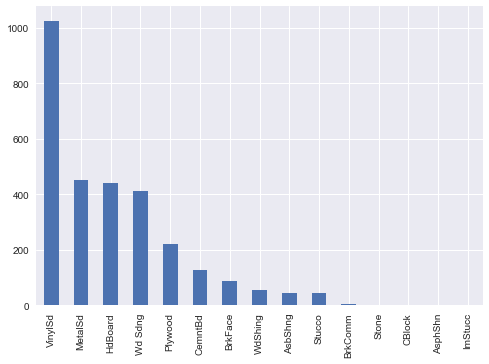

-------------------------------------------------
                     Exterior2nd                          
-------------------------------------------------
Feature breakdown: 
count        2919
unique         16
top       VinylSd
freq         1015
Name: Exterior2nd, dtype: object
nulls : 0
VinylSd    34.772182
MetalSd    15.313464
HdBoard    13.908873
Wd Sdng    13.394998
Plywood     9.249743
CmentBd     4.316547
Wd Shng     2.774923
BrkFace     1.610140
Stucco      1.610140
AsbShng     1.301816
Brk Cmn     0.753683
ImStucc     0.513875
Stone       0.205550
AsphShn     0.137033
CBlock      0.102775
Other       0.034258
Name: Exterior2nd, dtype: float64


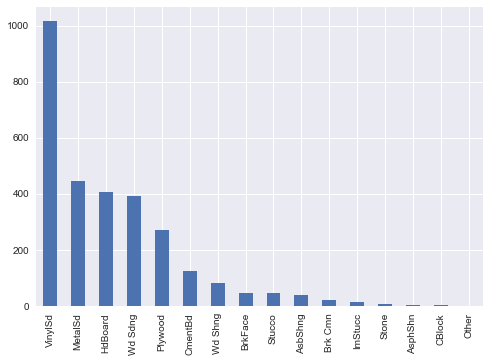

-------------------------------------------------
                     Fireplaces                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       5
top          0
freq      1420
Name: Fireplaces, dtype: int64
nulls : 0
0    48.646797
1    43.439534
2     7.502569
3     0.376841
4     0.034258
Name: Fireplaces, dtype: float64


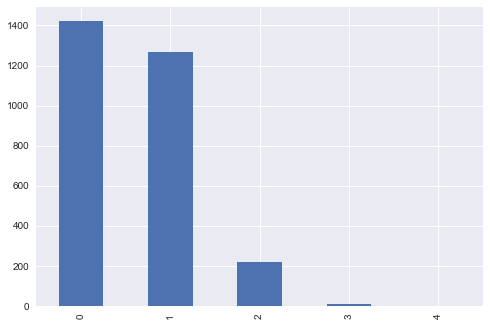

-------------------------------------------------
                     Foundation                          
-------------------------------------------------
Feature breakdown: 
count      2919
unique        6
top       PConc
freq       1308
Name: Foundation, dtype: object
nulls : 0
PConc     44.809866
CBlock    42.309010
BrkTil    10.654334
Slab       1.678657
Stone      0.376841
Wood       0.171292
Name: Foundation, dtype: float64


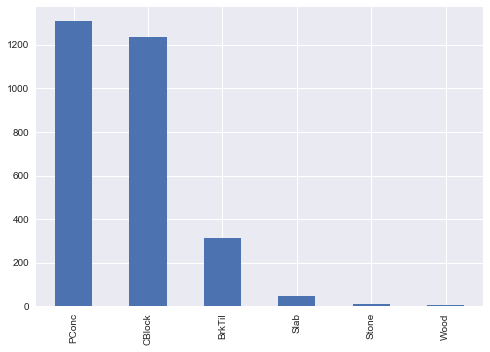

-------------------------------------------------
                     FullBath                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        1.568003
std         0.552969
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FullBath, dtype: float64
nulls : 0


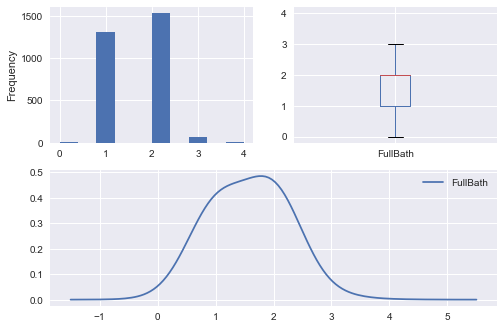

-------------------------------------------------
                     GarageArea                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean      472.874572
std       215.357904
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64
nulls : 0


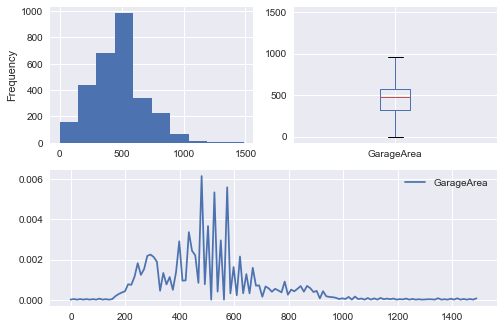

-------------------------------------------------
                     GarageCars                          
-------------------------------------------------
Feature breakdown: 
count     2919.0
unique       6.0
top          2.0
freq      1595.0
Name: GarageCars, dtype: float64
nulls : 0
2.0    54.642001
1.0    26.584447
3.0    12.812607
0.0     5.378554
4.0     0.548133
5.0     0.034258
Name: GarageCars, dtype: float64


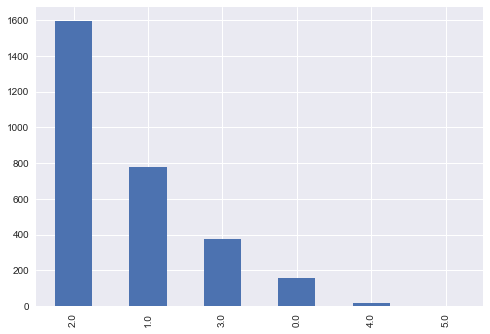

-------------------------------------------------
                     GarageFinish                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       3
top        Unf
freq      1389
Name: GarageFinish, dtype: object
nulls : 0
Unf    47.584789
RFn    27.783487
Fin    24.631723
Name: GarageFinish, dtype: float64


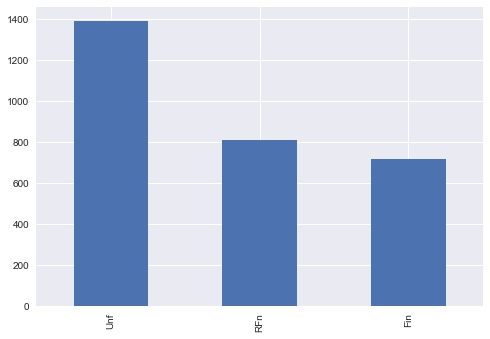

-------------------------------------------------
                     GarageType                          
-------------------------------------------------
Feature breakdown: 
count       2919
unique         6
top       Attchd
freq        1880
Name: GarageType, dtype: object
nulls : 0
Attchd     64.405618
Detchd     26.687222
BuiltIn     6.372045
Basment     1.233299
2Types      0.787941
CarPort     0.513875
Name: GarageType, dtype: float64


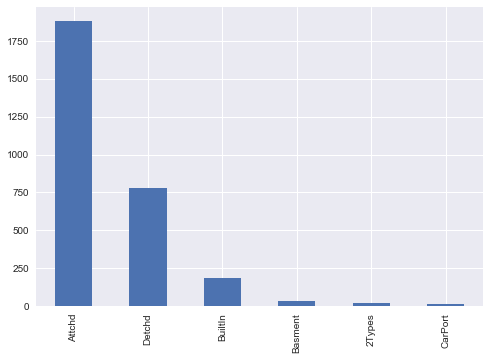

-------------------------------------------------
                     GrLivArea                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
25%      1126.000000
50%      1444.000000
75%      1743.500000
max      5642.000000
Name: GrLivArea, dtype: float64
nulls : 0


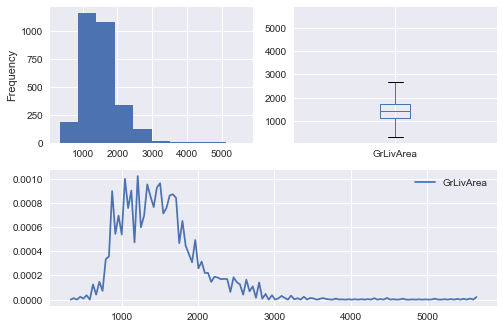

-------------------------------------------------
                     HalfBath                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       3
top          0
freq      1834
Name: HalfBath, dtype: int64
nulls : 0
0    62.829736
1    36.313806
2     0.856458
Name: HalfBath, dtype: float64


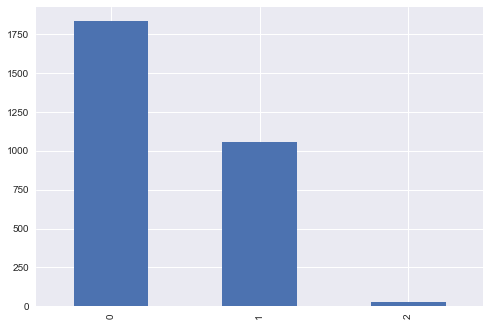

-------------------------------------------------
                     HeatingQC                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       5
top         Ex
freq      1493
Name: HeatingQC, dtype: object
nulls : 0
Ex    51.147653
TA    29.359370
Gd    16.238438
Fa     3.151764
Po     0.102775
Name: HeatingQC, dtype: float64


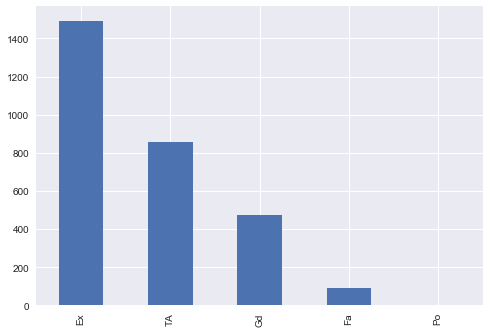

-------------------------------------------------
                     HouseStyle                          
-------------------------------------------------
Feature breakdown: 
count       2919
unique         8
top       1Story
freq        1471
Name: HouseStyle, dtype: object
nulls : 0
1Story    50.393971
2Story    29.873244
1.5Fin    10.757109
SLvl       4.385063
SFoyer     2.843440
2.5Unf     0.822199
1.5Unf     0.650908
2.5Fin     0.274066
Name: HouseStyle, dtype: float64


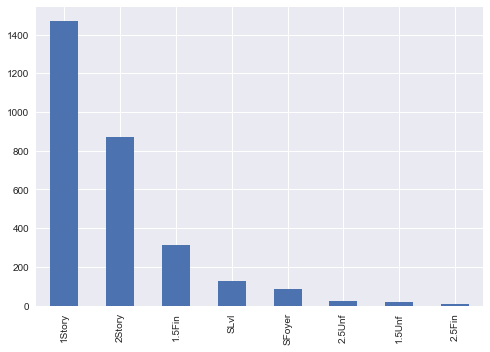

-------------------------------------------------
                     KitchenAbvGr                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       4
top          1
freq      2785
Name: KitchenAbvGr, dtype: int64
nulls : 0
1    95.409387
2     4.419322
0     0.102775
3     0.068517
Name: KitchenAbvGr, dtype: float64


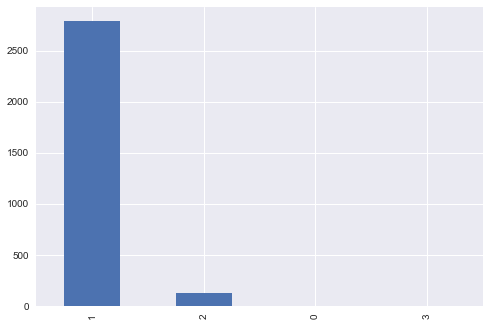

-------------------------------------------------
                     KitchenQual                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       4
top         TA
freq      1493
Name: KitchenQual, dtype: object
nulls : 0
TA    51.147653
Gd    39.431312
Ex     7.022953
Fa     2.398082
Name: KitchenQual, dtype: float64


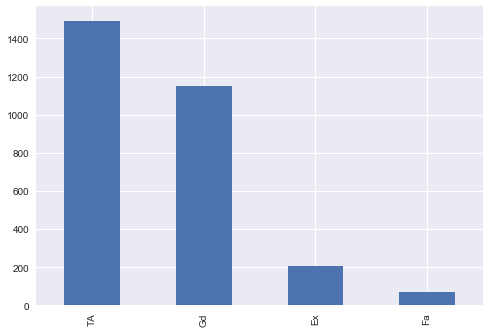

-------------------------------------------------
                     LotFrontage                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean       57.766701
std        33.481636
min         0.000000
25%        43.000000
50%        63.000000
75%        78.000000
max       313.000000
Name: LotFrontage, dtype: float64
nulls : 0


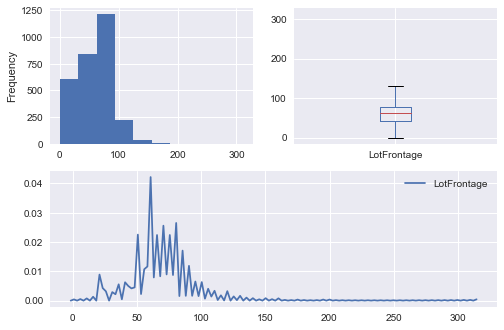

-------------------------------------------------
                     LotShape                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       4
top        Reg
freq      1859
Name: LotShape, dtype: object
nulls : 0
Reg    63.686194
IR1    33.162042
IR2     2.603631
IR3     0.548133
Name: LotShape, dtype: float64


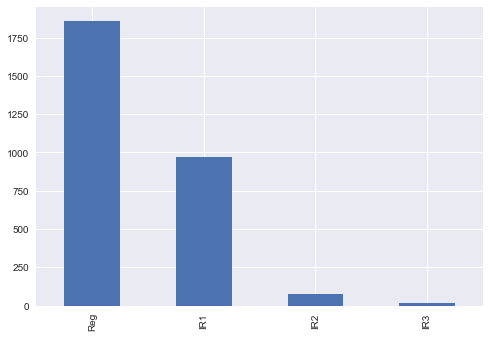

-------------------------------------------------
                     MSSubClass                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique      16
top         20
freq      1079
Name: MSSubClass, dtype: int64
nulls : 0
20     36.964714
60     19.698527
50      9.832134
120     6.235012
30      4.761905
160     4.385063
70      4.385063
80      4.042480
90      3.734156
190     2.089757
85      1.644399
75      0.787941
45      0.616650
180     0.582391
40      0.205550
150     0.034258
Name: MSSubClass, dtype: float64


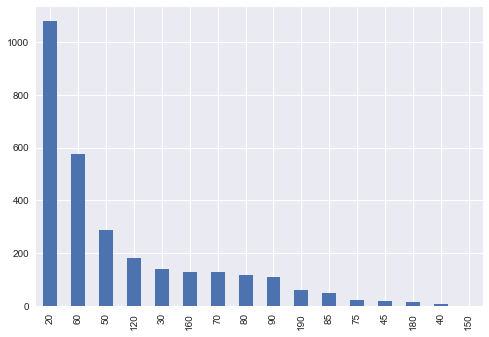

-------------------------------------------------
                     MSZoning                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       5
top         RL
freq      2269
Name: MSZoning, dtype: object
nulls : 0
RL         77.732100
RM         15.758822
FV          4.761905
RH          0.890716
C (all)     0.856458
Name: MSZoning, dtype: float64


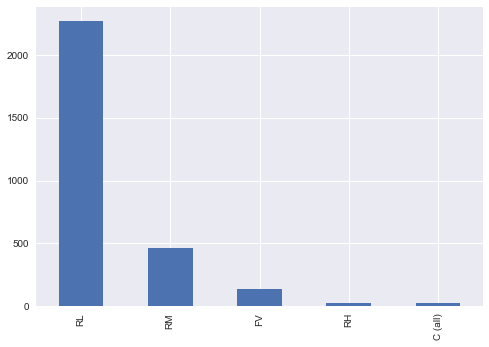

-------------------------------------------------
                     MasVnrType                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       4
top       None
freq      1766
Name: MasVnrType, dtype: object
nulls : 0
None       60.500171
BrkFace    30.113052
Stone       8.530319
BrkCmn      0.856458
Name: MasVnrType, dtype: float64


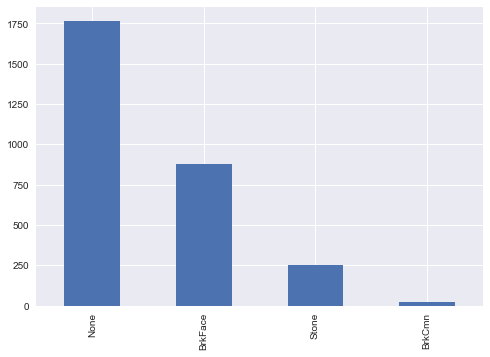

-------------------------------------------------
                     MoSold                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique      12
top          6
freq       503
Name: MoSold, dtype: int64
nulls : 0
6     17.231929
7     15.279205
5     13.497773
4      9.558068
8      7.982186
3      7.947927
10     5.926687
9      5.412813
11     4.864680
2      4.556355
1      4.179514
12     3.562864
Name: MoSold, dtype: float64


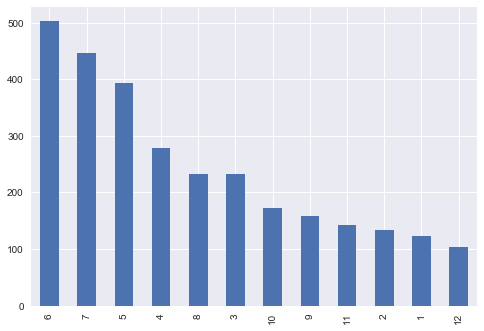

-------------------------------------------------
                     Neighborhood                          
-------------------------------------------------
Feature breakdown: 
count      2919
unique       25
top       NAmes
freq        443
Name: Neighborhood, dtype: object
nulls : 0
NAmes      15.176430
CollgCr     9.146968
OldTown     8.187736
Edwards     6.646112
Somerst     6.235012
NridgHt     5.686879
Gilbert     5.652621
Sawyer      5.173004
NWAmes      4.487838
SawyerW     4.282288
Mitchel     3.905447
BrkSide     3.699897
Crawfor     3.528606
IDOTRR      3.186023
Timber      2.466598
NoRidge     2.432340
StoneBr     1.747174
SWISU       1.644399
ClearCr     1.507366
MeadowV     1.267557
BrDale      1.027749
Blmngtn     0.959233
Veenker     0.822199
NPkVill     0.787941
Blueste     0.342583
Name: Neighborhood, dtype: float64


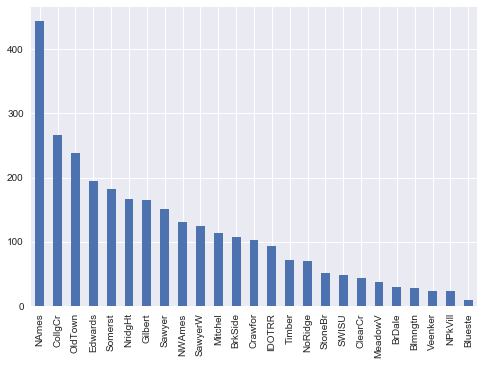

-------------------------------------------------
                     OverallCond                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       9
top          5
freq      1645
Name: OverallCond, dtype: int64
nulls : 0
5    56.354916
6    18.191161
7    13.360740
8     4.933196
4     3.460089
3     1.712915
9     1.404591
2     0.342583
1     0.239808
Name: OverallCond, dtype: float64


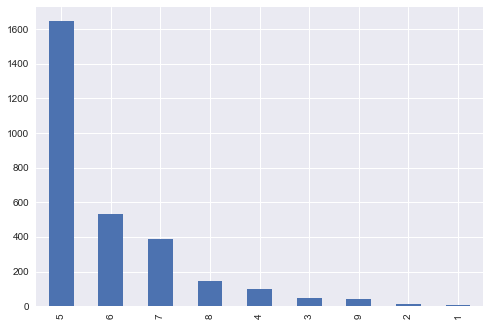

-------------------------------------------------
                     OverallQual                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique      10
top          5
freq       825
Name: OverallQual, dtype: int64
nulls : 0
5     28.263104
6     25.042823
7     20.554985
8     11.716341
4      7.742378
9      3.665639
3      1.370332
10     1.062008
2      0.445358
1      0.137033
Name: OverallQual, dtype: float64


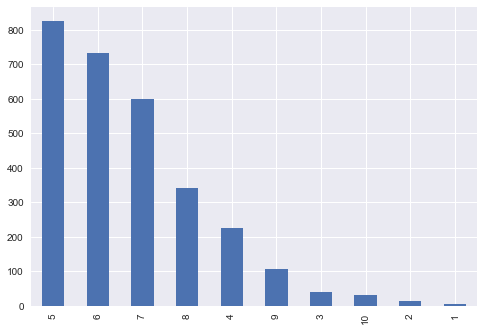

-------------------------------------------------
                     RoofStyle                          
-------------------------------------------------
Feature breakdown: 
count      2919
unique        6
top       Gable
freq       2310
Name: RoofStyle, dtype: object
nulls : 0
Gable      79.136691
Hip        18.876328
Gambrel     0.753683
Flat        0.685166
Mansard     0.376841
Shed        0.171292
Name: RoofStyle, dtype: float64


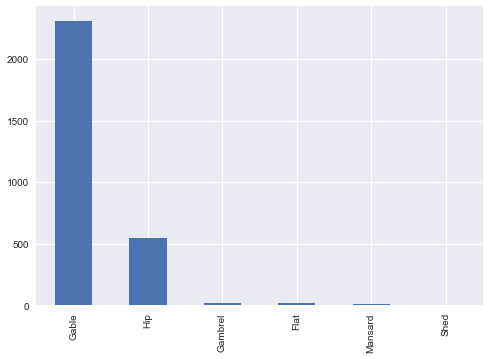

-------------------------------------------------
                     SaleCondition                          
-------------------------------------------------
Feature breakdown: 
count       2919
unique         6
top       Normal
freq        2402
Name: SaleCondition, dtype: object
nulls : 0
Normal     82.288455
Partial     8.393285
Abnorml     6.509078
Family      1.575882
Alloca      0.822199
AdjLand     0.411100
Name: SaleCondition, dtype: float64


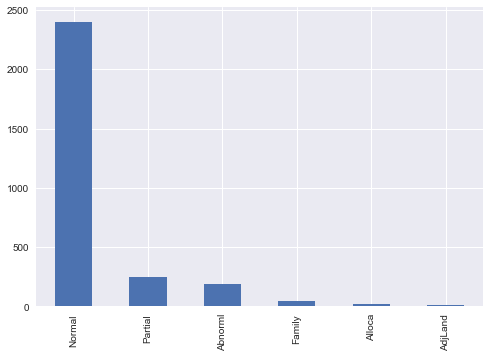

-------------------------------------------------
                     TotRmsAbvGrd                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique      14
top          6
freq       844
Name: TotRmsAbvGrd, dtype: int64
nulls : 0
6     28.914012
7     22.233642
5     19.972593
8     11.887633
4      6.714628
9      4.898938
10     2.740665
11     1.096266
3      0.856458
12     0.548133
15     0.034258
14     0.034258
13     0.034258
2      0.034258
Name: TotRmsAbvGrd, dtype: float64


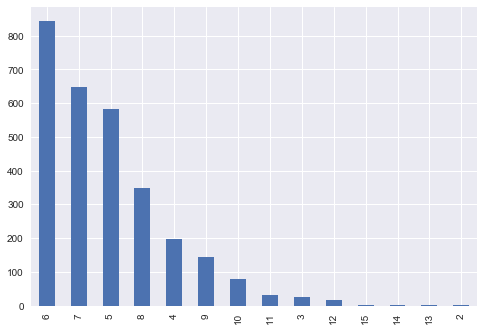

-------------------------------------------------
                     TotalBsmtSF                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean     1051.777587
std       440.690726
min         0.000000
25%       793.000000
50%       990.000000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
nulls : 0


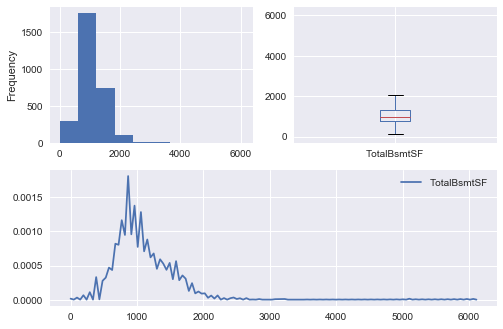

-------------------------------------------------
                     second_floor                          
-------------------------------------------------
Feature breakdown: 
count    2919.000000
mean        0.428571
std         0.494956
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: second_floor, dtype: float64
nulls : 0


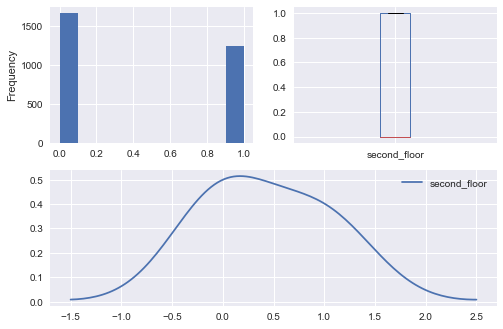

-------------------------------------------------
                     Age                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique     118
top          5
freq       142
Name: Age, dtype: int64
nulls : 0
5      4.864680
4      4.727646
3      3.734156
6      3.391572
7      3.014731
33     1.952724
90     1.952724
34     1.849949
11     1.781432
2      1.678657
52     1.644399
10     1.644399
8      1.610140
12     1.575882
42     1.541624
100    1.473107
51     1.473107
56     1.473107
40     1.438849
43     1.404591
38     1.370332
32     1.336074
54     1.336074
39     1.336074
17     1.336074
60     1.301816
16     1.267557
50     1.267557
70     1.233299
53     1.199041
         ...   
28     0.239808
25     0.239808
79     0.239808
68     0.205550
98     0.171292
78     0.171292
91     0.171292
130    0.171292
76     0.171292
0      0.102775
105    0.102775
115    0.102775
93     0.102775
109    0.068517
102    0.068517

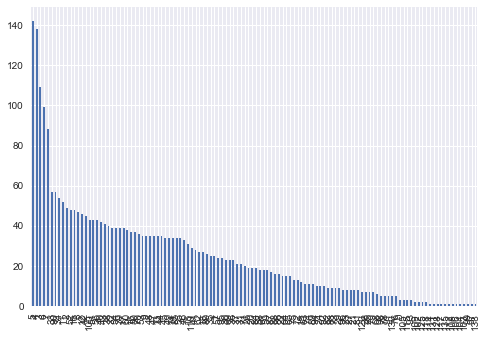

-------------------------------------------------
                     YearsSinceSale                          
-------------------------------------------------
Feature breakdown: 
count     2919
unique       5
top          3
freq       692
Name: YearsSinceSale, dtype: int64
nulls : 0
3    23.706749
1    22.165125
2    21.308667
4    21.205892
0    11.613566
Name: YearsSinceSale, dtype: float64


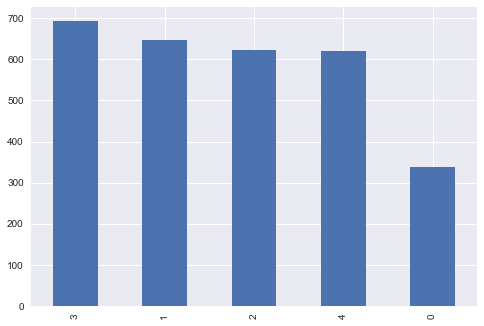

In [91]:
cat_dict = tt.uni_analysis(df)

In [101]:
catagor = [key for key, val in cat_dict.items() if val == True ]
num = [key for key, val in cat_dict.items() if val == False ]

In [104]:
df["SalePrice"] = train["SalePrice"]

In [112]:
df.to_csv("data.csv")

1stFlrSF  2ndFlrSF BedroomAbvGr BldgType BsmtCond BsmtExposure  \
0       856       854            3     1Fam       TA           No   
1      1262         0            3     1Fam       TA           Gd   
2       920       866            3     1Fam       TA           Mn   
3       961       756            3     1Fam       Gd           No   
4      1145      1053            4     1Fam       TA           Av   

  BsmtFinType1 BsmtFullBath BsmtQual CentralAir    ...    OverallCond  \
0          GLQ            1       Gd          Y    ...              5   
1          ALQ            0       Gd          Y    ...              8   
2          GLQ            1       Gd          Y    ...              5   
3          ALQ            1       TA          Y    ...              5   
4          GLQ            1       Gd          Y    ...              5   

  OverallQual RoofStyle SaleCondition TotRmsAbvGrd  TotalBsmtSF  second_floor  \
0           7     Gable        Normal            8        856.0             1   
1           6     Gable        Normal            6       1262.0             0   
2           7     Gable        Normal            6        920.0             1   
3           7     Gable       Abnorml            7        756.0             1   
4           8     Gable        Normal            9       1145.0             1   

  Age YearsSinceSale SalePrice  
0   7              2  208500.0  
1  34              3  181500.0  
2   9              2  223500.0  
3  95              4  140000.0  
4  10              2  250000.0  

[5 rows x 43 columns]

1stFlrSF  2ndFlrSF BedroomAbvGr BldgType BsmtCond BsmtExposure  \
2914       546       546            3    Twnhs       TA           No   
2915       546       546            3   TwnhsE       TA           No   
2916      1224         0            4     1Fam       TA           No   
2917       970         0            3     1Fam       TA           Av   
2918       996      1004            3     1Fam       TA           Av   

     BsmtFinType1 BsmtFullBath BsmtQual CentralAir    ...    OverallCond  \
2914          Unf            0       TA          Y    ...              7   
2915          Rec            0       TA          Y    ...              5   
2916          ALQ            1       TA          Y    ...              7   
2917          GLQ            0       Gd          Y    ...              5   
2918          LwQ            0       Gd          Y    ...              5   

     OverallQual RoofStyle SaleCondition TotRmsAbvGrd  TotalBsmtSF  \
2914           4     Gable        Normal            5        546.0   
2915           4     Gable       Abnorml            6        546.0   
2916           5     Gable       Abnorml            7       1224.0   
2917           5     Gable        Normal            6        912.0   
2918           7     Gable        Normal            9        996.0   

      second_floor Age YearsSinceSale SalePrice  
2914             1  40              4       NaN  
2915             1  40              4       NaN  
2916             0  50              4       NaN  
2917             0  18              4       NaN  
2918             1  17              4       NaN  

[5 rows x 43 columns]